In [13]:
# notwendige Bibliotheken importieren und konfigurieren
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
_ = pd.set_option('display.max_columns', None) # damit mehr als 20 Spalten angezeigt werden.
pd.set_option('display.min_rows', 8) # damit nicht nur 10 Zeilen mit  ... dazwischen ausgegeben werden
pd.set_option('display.max_rows', 500) # damit nicht nur 10 Zeilen mit  ... dazwischen ausgegeben werden
import numpy as np
from collections import Counter
from timeit import default_timer as timer
from math import ceil
from itertools import zip_longest
import matplotlib.pyplot as plt #Plot Bibliothek
import seaborn as sns #importing Seaborn (enhancement of Mathplotlib) for plots
from sklearn import metrics as met 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import bokeh   # graphische, interaktive Plots
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, factor_mark
from bokeh.palettes import Category10
from bokeh.models import HoverTool, PanTool, ZoomInTool, ZoomOutTool, SaveTool, WheelZoomTool, BoxZoomTool, ResetTool
from bokeh.models import  Legend, LegendItem
from bokeh.io import output_notebook, show
_ = output_notebook(resources=None, verbose=True, hide_banner=True)


In [24]:
# Daten einlesen
path = 'c:/myBox/Projekte/FHDW/Kurs DAML/Daten/AmesHousing.csv' # für lokale Dateien
#path = 'https://github.com/Rechen47/FHDW.DAML/raw/main/AmesHousing.csv'

df = pd.read_csv(path, sep=',') 
df_org = df.copy() # Eine Datenkopie als Referenz behalten

#Erstuntersuchung mit den Standardbefehlen aus Pandas zur Ansicht von data frames
df.info(verbose=True, show_counts=True)
print (df.describe())
df.head(20)

# Merkmale aufteilen
# Vertragsrelevante Merkmale



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1

In [25]:
# Datenaufbereitung
# 
# Hier wird fortlaufend die Datenaufbereitung erweitert.

df_num=df
## Variablen bezogen auf das Gründstück
df_num['Lot Shape'] = df_num['Lot Shape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
df_num['Land Slope'] = df_num['Land Slope'].map({'Gtl':3,'Mod':2,'Sev':0})
neighborhood_means = df_num.groupby('Neighborhood')['Lot Frontage'].mean()
neighborhood_means = neighborhood_means.fillna(np.mean(neighborhood_means))
df_num['Lot Frontage'] = df_num['Lot Frontage'].fillna(df_num['Neighborhood'])
df_num['Lot Frontage'] = df_num['Lot Frontage'].map(lambda x: neighborhood_means[x] if type(x)==str else x)
df_num.loc[df_num['Condition 1'] == 'RRAn', 'Railroad_Adjacent'] = 1
df_num.loc[df_num['Condition 2'] == 'RRAn', 'Railroad_Adjacent'] = 1
df_num.loc[df_num['Condition 1'] == 'RRAe', 'Railroad_Adjacent'] = 1
df_num.loc[df_num['Condition 2'] == 'RRAe', 'Railroad_Adjacent'] = 1
df_num['Railroad_Adjacent'] = df_num['Railroad_Adjacent'].fillna(0)
df_num.loc[df_num['Condition 1'] == 'RRNn', 'Railroad_Near'] = 1
df_num.loc[df_num['Condition 2'] == 'RRNn', 'Railroad_Near'] = 1
df_num.loc[df_num['Condition 1'] == 'RRNe', 'Railroad_Near'] = 1
df_num.loc[df_num['Condition 2'] == 'RRNe', 'Railroad_Near'] = 1
df_num['Railroad_Near'] = df_num['Railroad_Near'].fillna(0)
df_num.loc[df_num['Condition 1'] == 'Feedr', 'Street_Feeder'] = 1
df_num.loc[df_num['Condition 2'] == 'Feedr', 'Street_Feeder'] = 1
df_num['Street_Feeder'] = df_num['Street_Feeder'].fillna(0)
df_num.loc[df_num['Condition 1'] == 'Artery', 'Street_Aterial'] = 1
df_num.loc[df_num['Condition 2'] == 'Artery', 'Street_Aterial'] = 1
df_num['Street_Aterial'] = df_num['Street_Aterial'].fillna(0)
df_num.loc[df_num['Condition 1'] == 'PosA', 'PosFeature_Adjacent'] = 1
df_num.loc[df_num['Condition 2'] == 'PosA', 'PosFeature_Adjacent'] = 1
df_num['PosFeature_Adjacent'] = df_num['PosFeature_Adjacent'].fillna(0)
df_num.loc[df_num['Condition 1'] == 'PosN', 'PosFeature_Near'] = 1
df_num.loc[df_num['Condition 2'] == 'PosN', 'PosFeature_Near'] = 1
df_num['PosFeature_Near'] = df_num['PosFeature_Near'].fillna(0)
df_num['Railroad_Adjacent'] = df_num['Railroad_Adjacent'].fillna(0)
df_num['Paved Drive'] = df_num['Paved Drive'].map({'N':0,'P':1,'Y':2}) # None, Partial, Yes
df_num = pd.get_dummies(df_num, columns=['Alley', 'MS Zoning', 'Street','Land Contour',
                                     'Lot Config','Neighborhood'], drop_first=False)

## Variablen bezogen auf das Haus
df_num = pd.get_dummies(df_num, columns=['House Style', 'Bldg Type', 'Foundation'], drop_first=False)
df_num['HouseAge'] = df_num['Yr Sold'] - df_num['Year Built']
df_num['RemodelAge'] = df_num['Yr Sold'] - df_num['Year Remod/Add']
df_num['IsreModeled'] = np.where(df_num['Year Remod/Add']  == df_num['Year Built'], 1, 0)
df_num['IsNew'] = np.where(df_num['Yr Sold'] == df_num['Year Built'], 1, 0)
df_num['TotalBathrooms'] = df_num['Full Bath'] + df_num['Bsmt Full Bath'] + 0.5 * df_num['Bsmt Half Bath'] + 0.5 * df_num['Half Bath'] 
df_num['TotalBathrooms'] = df_num['TotalBathrooms'].fillna(0)

## Variablen bezogen auf Dach und Dachausbau
df_num['Mas Vnr Type'] = df_num['Mas Vnr Type'].fillna('None')
df_num = pd.get_dummies(df_num, columns=['Mas Vnr Type'], drop_first=False)
df_num['Mas Vnr Area'] = df_num['Mas Vnr Area'].fillna(0)
df_num = pd.get_dummies(df_num, columns=['Roof Matl', 'Roof Style'], drop_first=False)


## Variablen bezogen auf Ausstattung des Hauses
df_num = pd.get_dummies(df_num, columns=['Misc Feature'], drop_first=False)
df_num['Utilities'] = df_num['Utilities'].map({'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1})
for i in ['Exter Qual','Exter Cond','Kitchen Qual']:
    df_num[i] = df_num[i].map({'Ex':4,'Gd':1,'TA':0,'Fa':-1,'Po':-4})
df_num = pd.get_dummies(df_num, columns=['Heating'], drop_first=False)
df_num['Heating QC'] = df_num['Heating QC'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-2,'Po':-4})
df_num['Central Air'] = df_num['Central Air'].map({'Y':1,'N':0})
df_num['Electrical'] = df_num['Electrical'].map({'SBrkr':4,'FuseA':3,'FuseF':2, 'FuseP':1, 'Mix':0})
df_num['Electrical'] = df_num['Electrical'].fillna(0)
df_num['Functional'] = df_num['Functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})
df_num['Fireplace Qu'] = df_num['Fireplace Qu'].fillna('None')
df_num['Fireplace Qu'] = df_num['Fireplace Qu'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0,'NA':0})
df_num['Pool QC'] = df_num['Pool QC'].fillna('None')
df_num['Pool QC'] = df_num['Pool QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'None':0,'NA':0})
df_num['Fence'] = df_num['Fence'].fillna('None')
df_num['Fence'] = df_num['Fence'].map({'GdPrv':4,'GdWo':3,'MnPrv':2,'MnWw':1,'None':0,'NA':0})

df_num.loc[df_num['Exterior 1st'] == 'AsbShng', 'Exterior_AsbShng'] = 1
df_num.loc[df_num['Exterior 2nd'] == 'AsbShng', 'Exterior_AsbShng'] = 1
df_num['Exterior_AsbShng'] = df_num['Exterior_AsbShng'].fillna(0)
df_num.loc[df_num['Exterior 1st'] == 'BrkComm', 'Exterior_BrkComm'] = 1
df_num.loc[df_num['Exterior 2nd'] == 'BrkComm', 'Exterior_BrkComm'] = 1
df_num['Exterior_BrkComm'] = df_num['Exterior_BrkComm'].fillna(0)
df_num.loc[df_num['Exterior 1st'] == 'BrkFace', 'Exterior_BrkFace'] = 1
df_num.loc[df_num['Exterior 2nd'] == 'BrkFace', 'Exterior_BrkFace'] = 1
df_num['Exterior_BrkFace'] = df_num['Exterior_BrkFace'].fillna(0)
df_num.loc[df_num['Exterior 1st'] == 'CBlock', 'Exterior_CBlock'] = 1
df_num.loc[df_num['Exterior 2nd'] == 'CBlock', 'Exterior_CBlock'] = 1
df_num['Exterior_CBlock'] = df_num['Exterior_CBlock'].fillna(0)
df_num.loc[df_num['Exterior 1st'] == 'CemntBd', 'Exterior_CemntBd'] = 1
df_num.loc[df_num['Exterior 2nd'] == 'CemntBd', 'Exterior_CemntBd'] = 1
df_num['Exterior_CemntBd'] = df_num['Exterior_CemntBd'].fillna(0)
df_num.loc[df_num['Exterior 1st'] == 'HdBoard', 'Exterior_HdBoard'] = 1
df_num.loc[df_num['Exterior 2nd'] == 'HdBoard', 'Exterior_HdBoard'] = 1
df_num['Exterior_HdBoard'] = df_num['Exterior_HdBoard'].fillna(0)
df_num.loc[df_num['Exterior 1st'] == 'ImStucc', 'Exterior_ImStucc'] = 1
df_num.loc[df_num['Exterior 2nd'] == 'ImStucc', 'Exterior_ImStucc'] = 1
df_num['Exterior_ImStucc'] = df_num['Exterior_ImStucc'].fillna(0)
df_num.loc[df_num['Exterior 1st'] == 'MetalSd', 'Exterior_MetalSd'] = 1
df_num.loc[df_num['Exterior 2nd'] == 'MetalSd', 'Exterior_MetalSd'] = 1
df_num['Exterior_MetalSd'] = df_num['Exterior_MetalSd'].fillna(0)
df_num.loc[df_num['Exterior 1st'] == 'Plywood', 'Exterior_Plywood'] = 1
df_num.loc[df_num['Exterior 2nd'] == 'Plywood', 'Exterior_Plywood'] = 1
df_num['Exterior_Plywood'] = df_num['Exterior_Plywood'].fillna(0)
df_num.loc[df_num['Exterior 1st'] == 'PreCast', 'Exterior_PreCast'] = 1
df_num.loc[df_num['Exterior 2nd'] == 'PreCast', 'Exterior_PreCast'] = 1
df_num['Exterior_PreCast'] = df_num['Exterior_PreCast'].fillna(0)
df_num.loc[df_num['Exterior 1st'] == 'Stone', 'Exterior_Stone'] = 1
df_num.loc[df_num['Exterior 2nd'] == 'Stone', 'Exterior_Stone'] = 1
df_num['Exterior_Stone'] = df_num['Exterior_Stone'].fillna(0)
df_num.loc[df_num['Exterior 1st'] == 'Stucco', 'Exterior_Stucco'] = 1
df_num.loc[df_num['Exterior 2nd'] == 'Stucco', 'Exterior_Stucco'] = 1
df_num['Exterior_Stucco'] = df_num['Exterior_Stucco'].fillna(0)
df_num.loc[df_num['Exterior 1st'] == 'VinylSd', 'Exterior_VinylSd'] = 1
df_num.loc[df_num['Exterior 2nd'] == 'VinylSd', 'Exterior_VinylSd'] = 1
df_num['Exterior_VinylSd'] = df_num['Exterior_VinylSd'].fillna(0)
df_num.loc[df_num['Exterior 1st'] == 'Wd Sdng', 'Exterior_Wd Sdng'] = 1
df_num.loc[df_num['Exterior 2nd'] == 'Wd Sdng', 'Exterior_Wd Sdng'] = 1
df_num['Exterior_Wd Sdng'] = df_num['Exterior_Wd Sdng'].fillna(0)
df_num.loc[df_num['Exterior 1st'] == 'WdShing', 'Exterior_WdShing'] = 1
df_num.loc[df_num['Exterior 2nd'] == 'WdShing', 'Exterior_WdShing'] = 1
df_num['Exterior_WdShing'] = df_num['Exterior_WdShing'].fillna(0)

## Variablen bezogen auf den Keller
df_num['BsmtFin SF 1'] = df_num['BsmtFin SF 1'].fillna(0)
df_num['BsmtFin SF 2'] = df_num['BsmtFin SF 2'].fillna(0)
df_num['Bsmt Unf SF'] = df_num['BsmtFin SF 2'].fillna(0)
df_num['Total Bsmt SF'] = df_num['BsmtFin SF 2'].fillna(0)
df_num['Bsmt Half Bath'] = df_num['Bsmt Full Bath'].fillna(0)
df_num['Bsmt Full Bath'] = df_num['Bsmt Full Bath'].fillna(0)
df_num['Bsmt Qual'] = df_num['Bsmt Qual'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
df_num['Bsmt Cond'] = df_num['Bsmt Cond'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
df_num['BsmtFin Type 1'] = df_num['BsmtFin Type 1'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})
df_num['BsmtFin Type 2'] = df_num['BsmtFin Type 2'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})
df_num['Bsmt Exposure'] = df_num['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})
df_num['Bsmt Qual'] = df_num['Bsmt Qual'].fillna(0)
df_num['BsmtFin Type 1'] = df_num['BsmtFin Type 1'].fillna(0)
df_num['BsmtFin Type 2'] = df_num['BsmtFin Type 2'].fillna(0)
df_num['Bsmt Exposure'] = df_num['Bsmt Exposure'].fillna(0)
df_num['Bsmt Cond'] = df_num['Bsmt Cond'].fillna(0)


## Variablen bezogen auf die Garage
df_num['Garage Cars'] = df_num['Garage Cars'].fillna(0)
df_num['Garage Type'] = df_num['Garage Type'].fillna('None')
df_num = pd.get_dummies(df_num, columns=['Garage Type'], drop_first=False)
df_num['Garage Finish'] = df_num['Garage Finish'].fillna('None')
df_num['Garage Finish'] = df_num['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0,'NA':0})
df_num['Garage Qual'] = df_num['Garage Qual'].fillna('None')
df_num['Garage Qual'] = df_num['Garage Qual'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
df_num['Garage Cond'] = df_num['Garage Cond'].fillna('None')
df_num['Garage Cond'] = df_num['Garage Cond'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
df_num['Garage Yr Blt'] = df_num['Garage Yr Blt'].fillna(df['Year Built'])
df_num['Garage Area'] = df_num['Garage Area'].fillna(0) # 1 missing Area
df_num['GarageAge'] = df_num['Yr Sold'] - df_num['Garage Yr Blt']
df_num['GarageAge'] = df_num['GarageAge'].fillna(0)

## Variablen bezogen auf das Verkauf
df_num['Sale Type'] = df_num['Sale Type'].str.strip()
df_num = pd.get_dummies(df_num, columns=['Sale Condition','Sale Type'], drop_first=False)



# Variablen entfernen
df_num.drop('PID',axis=1,inplace=True) # Order wird als eindeutiger Schlüssel verwendet
df_num.drop(['Mo Sold', 'Yr Sold'],axis=1,inplace=True) # Data Leakage
df_num.drop(['Condition 1', 'Condition 2'],axis=1,inplace=True) # 
df_num.drop('Mas Vnr Type_None',axis=1,inplace=True)
df_num.drop(['Exterior 1st', 'Exterior 2nd'],axis=1,inplace=True)


# Ausreißer 
df_num.drop(index=df_num.loc[df_num.loc[:,'Gr Liv Area'] > 4000].index, inplace=True) #3 Datensätze entfernen, die nach Dokumentation 


print(df_num.info(verbose=True))
df_num.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 204 columns):
 #    Column                  Dtype  
---   ------                  -----  
 0    Order                   int64  
 1    MS SubClass             int64  
 2    Lot Frontage            float64
 3    Lot Area                int64  
 4    Lot Shape               int64  
 5    Utilities               int64  
 6    Land Slope              int64  
 7    Overall Qual            int64  
 8    Overall Cond            int64  
 9    Year Built              int64  
 10   Year Remod/Add          int64  
 11   Mas Vnr Area            float64
 12   Exter Qual              int64  
 13   Exter Cond              int64  
 14   Bsmt Qual               float64
 15   Bsmt Cond               float64
 16   Bsmt Exposure           float64
 17   BsmtFin Type 1          float64
 18   BsmtFin SF 1            float64
 19   BsmtFin Type 2          float64
 20   BsmtFin SF 2            float64
 21   Bsmt Unf SF 

,Order,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,SalePrice,Railroad_Adjacent,Railroad_Near,Street_Feeder,Street_Aterial,PosFeature_Adjacent,PosFeature_Near,Alley_Grvl,Alley_Pave,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HouseAge,RemodelAge,IsreModeled,IsNew,TotalBathrooms,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_Stone,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Exterior_AsbShng,Exterior_BrkComm,Exterior_BrkFace,Exterior_CBlock,Exterior_CemntBd,Exterior_HdBoard,Exterior_ImStucc,Exterior_MetalSd,Exterior_Plywood,Exterior_PreCast,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,GarageAge,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,1,20,141.000000,31770,2,4,3,6,5,1960,1960,112.0,0,0,2.5,3.0,3.0,3.0,639.0,1.5,0.0,0.0,0.0,-2,1,4.0,1656,0,0,1656,1.0,1.0,1,0,3,1,0,7,0,2,3.0,1960.0,3,2.0,528.0,2.5,2.5,1,210,62,0,0,0,0,0,0,0,215000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,50,50,1,0,2.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,50.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2,20,80.000000,11622,3,4,3,5,6,1961,1961,0.0,0,0,2.5,2.5,0.0,2.5,468.0,2.0,144.0,144.0,144.0,0,1,4.0,896,0,0,896,0.0,0.0,1,0,2,1,0,5,0,0,0.0,1961.0,1,1.0,730.0,2.5,2.5,2,140,0,0,0,120,0,0,2,0,105000,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,

In [26]:
# Fehlende Werte
null_stats = pd.DataFrame(df_num.isnull().sum(), columns=['missing_value_count'])
null_stats.loc[:,'% of dataset'] = np.round(null_stats.loc[:,'missing_value_count'] / df_num.shape[0] * 100, 2)
null_stats.loc[null_stats.loc[:,'missing_value_count']>0,:].sort_values(by='missing_value_count', ascending=False)


,missing_value_count,% of dataset


In [27]:
# ad hoc Variablenauswertung und -prüfung
df_num[ (df_num['Exter Qual'].isnull())]

#df_num.groupby('Exterior_Plywood').agg(Mittlerer_Preis=('SalePrice', 'mean'), Min_Preis=('SalePrice', 'min'), 
#                            Max_Preis=('SalePrice', 'max'), Mittlere_Grundstücksgröße=('Lot Area', 'mean'), 
#                            Min_Grundstücksgröße=('Lot Area', 'min'), Max_Grundstücksgröße=('Lot Area', 'max'), 
#                             Anzahl=('Order', 'count'))
df_num.groupby('Exter Qual').agg(Mittlerer_Preis=('SalePrice', 'mean'), Min_Preis=('SalePrice', 'min'), 
                            Max_Preis=('SalePrice', 'max'), Mittlere_Grundstücksgröße=('Lot Area', 'mean'), 
                            Min_Grundstücksgröße=('Lot Area', 'min'), Max_Grundstücksgröße=('Lot Area', 'max'), 
                             Anzahl=('Order', 'count'))


,Order,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,SalePrice,Railroad_Adjacent,Railroad_Near,Street_Feeder,Street_Aterial,PosFeature_Adjacent,PosFeature_Near,Alley_Grvl,Alley_Pave,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HouseAge,RemodelAge,IsreModeled,IsNew,TotalBathrooms,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_Stone,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Exterior_AsbShng,Exterior_BrkComm,Exterior_BrkFace,Exterior_CBlock,Exterior_CemntBd,Exterior_HdBoard,Exterior_ImStucc,Exterior_MetalSd,Exterior_Plywood,Exterior_PreCast,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,GarageAge,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD


,Mittlerer_Preis,Min_Preis,Max_Preis,Mittlere_Grundstücksgröße,Min_Grundstücksgröße,Max_Grundstücksgröße,Anzahl
Exter Qual,,,,,,,
-1,89923.742857,13100,200000,8855.228571,4761,21780,35
0,143373.968316,12789,415000,9973.014452,1300,215245,1799
1,230756.384226,52000,745000,10116.580384,1700,159000,989
4,377918.616822,160000,755000,13801.186916,3843,63887,107


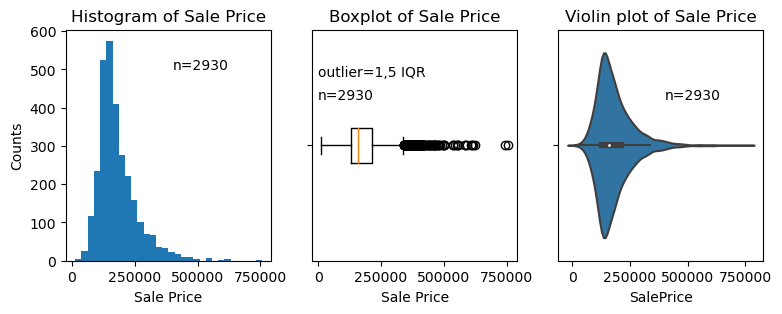

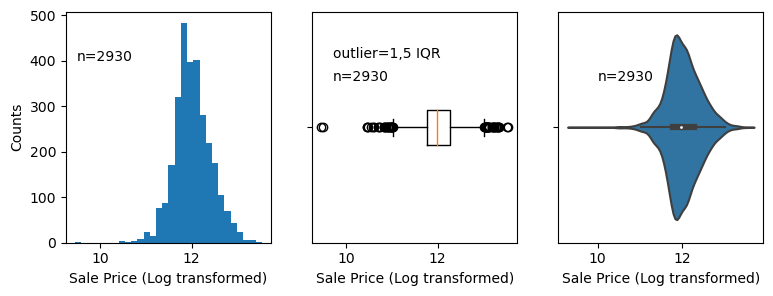

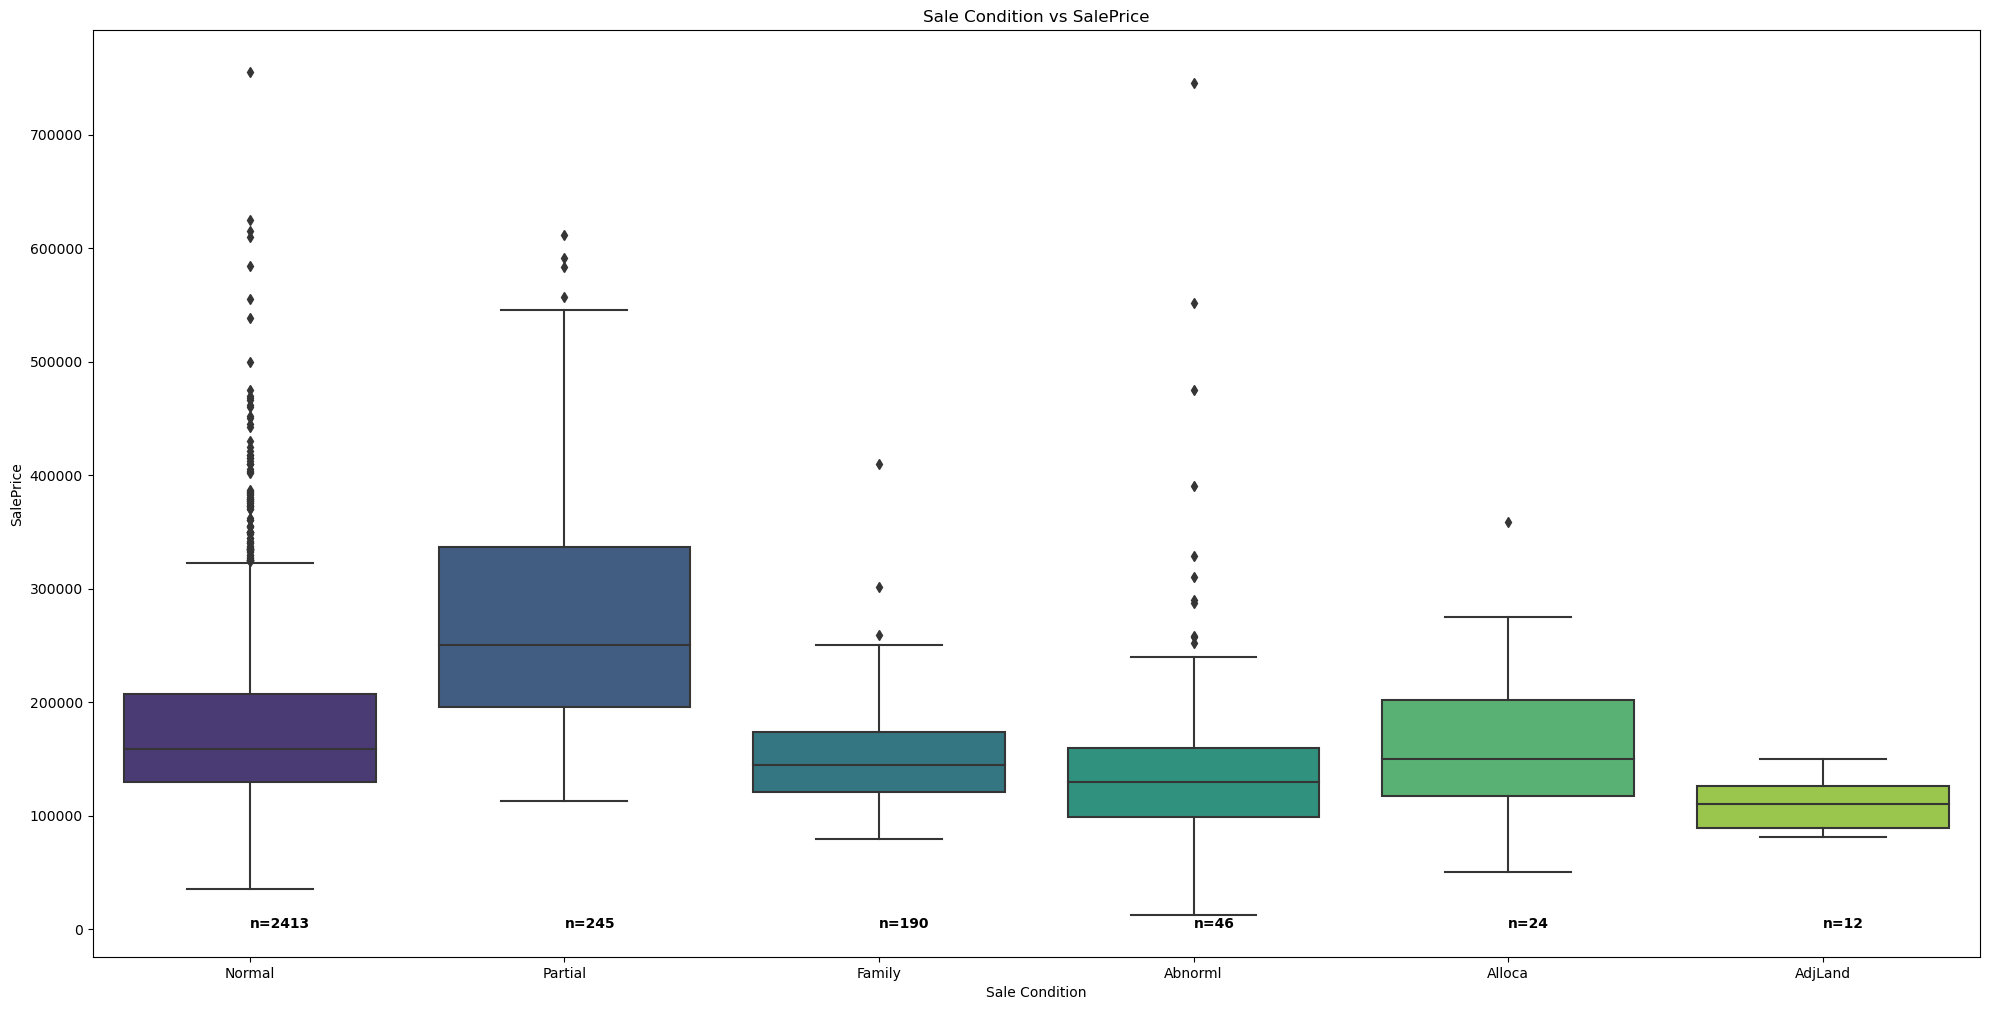

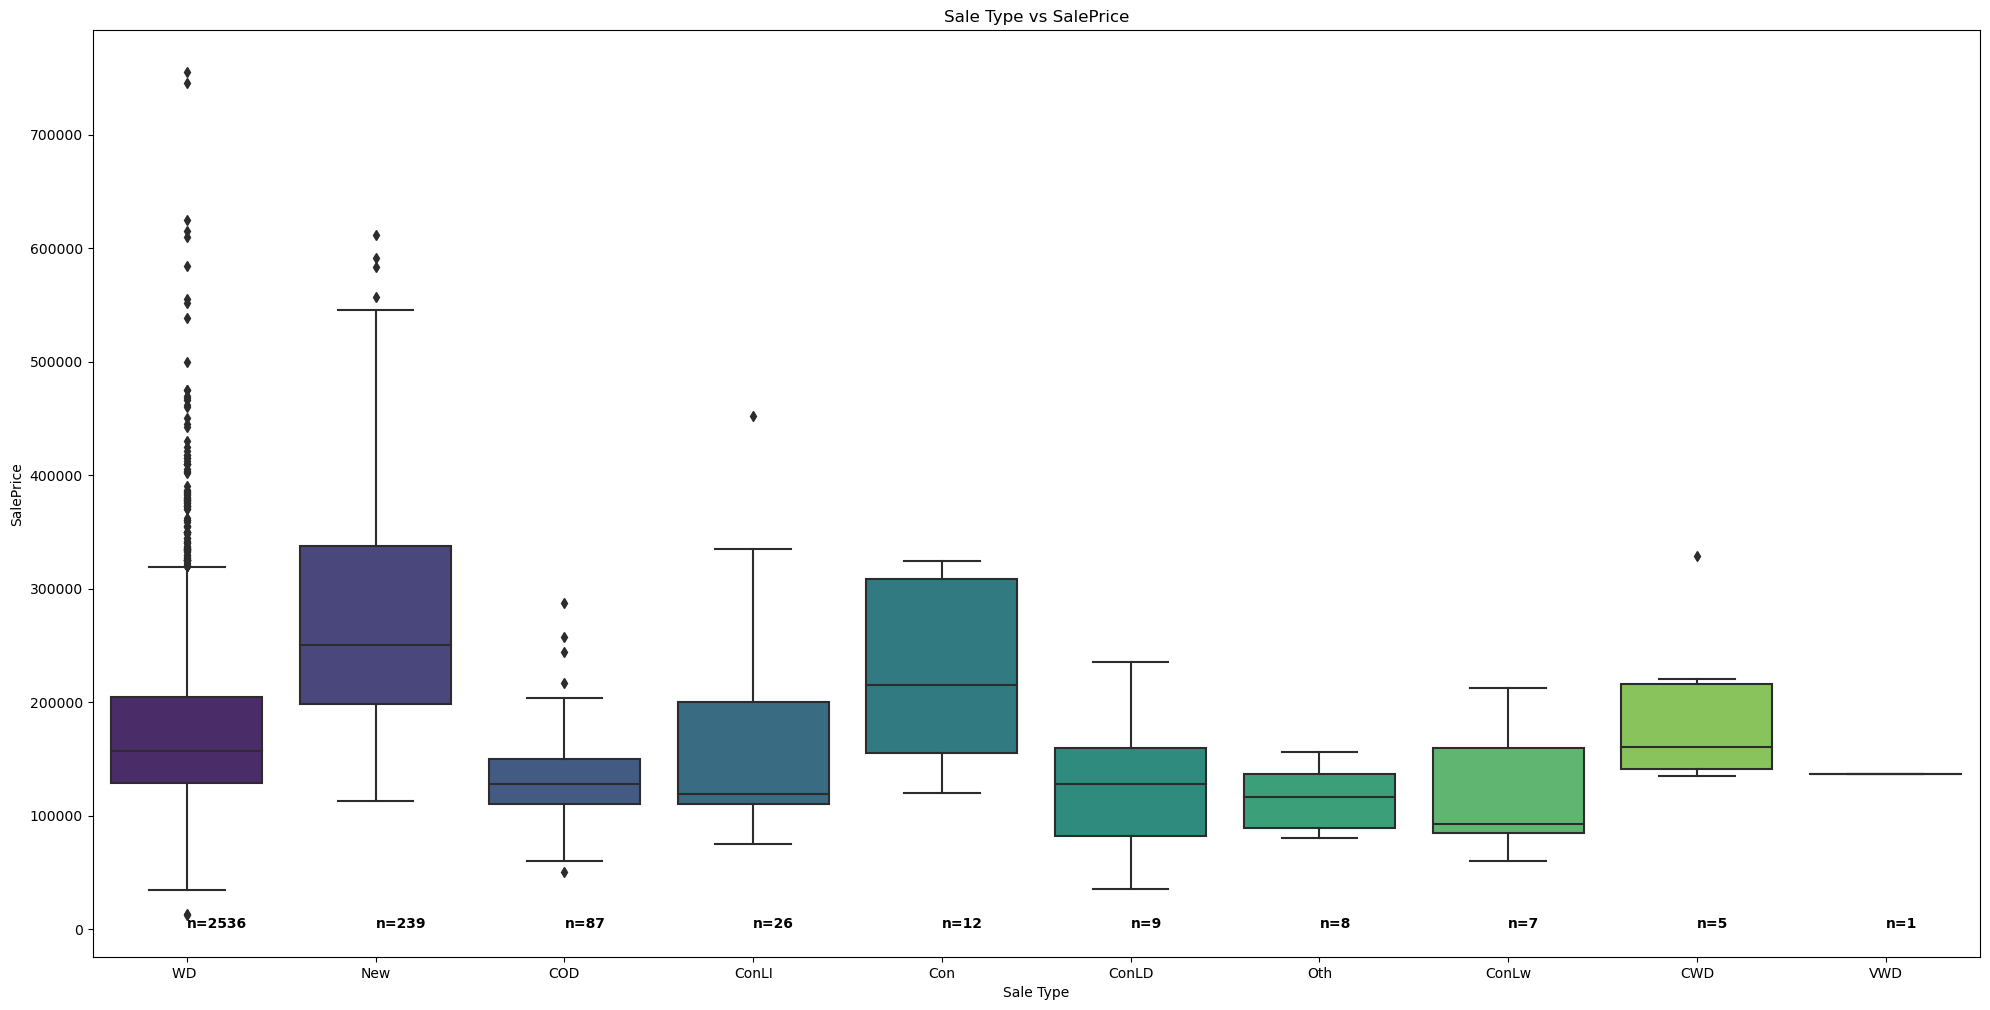

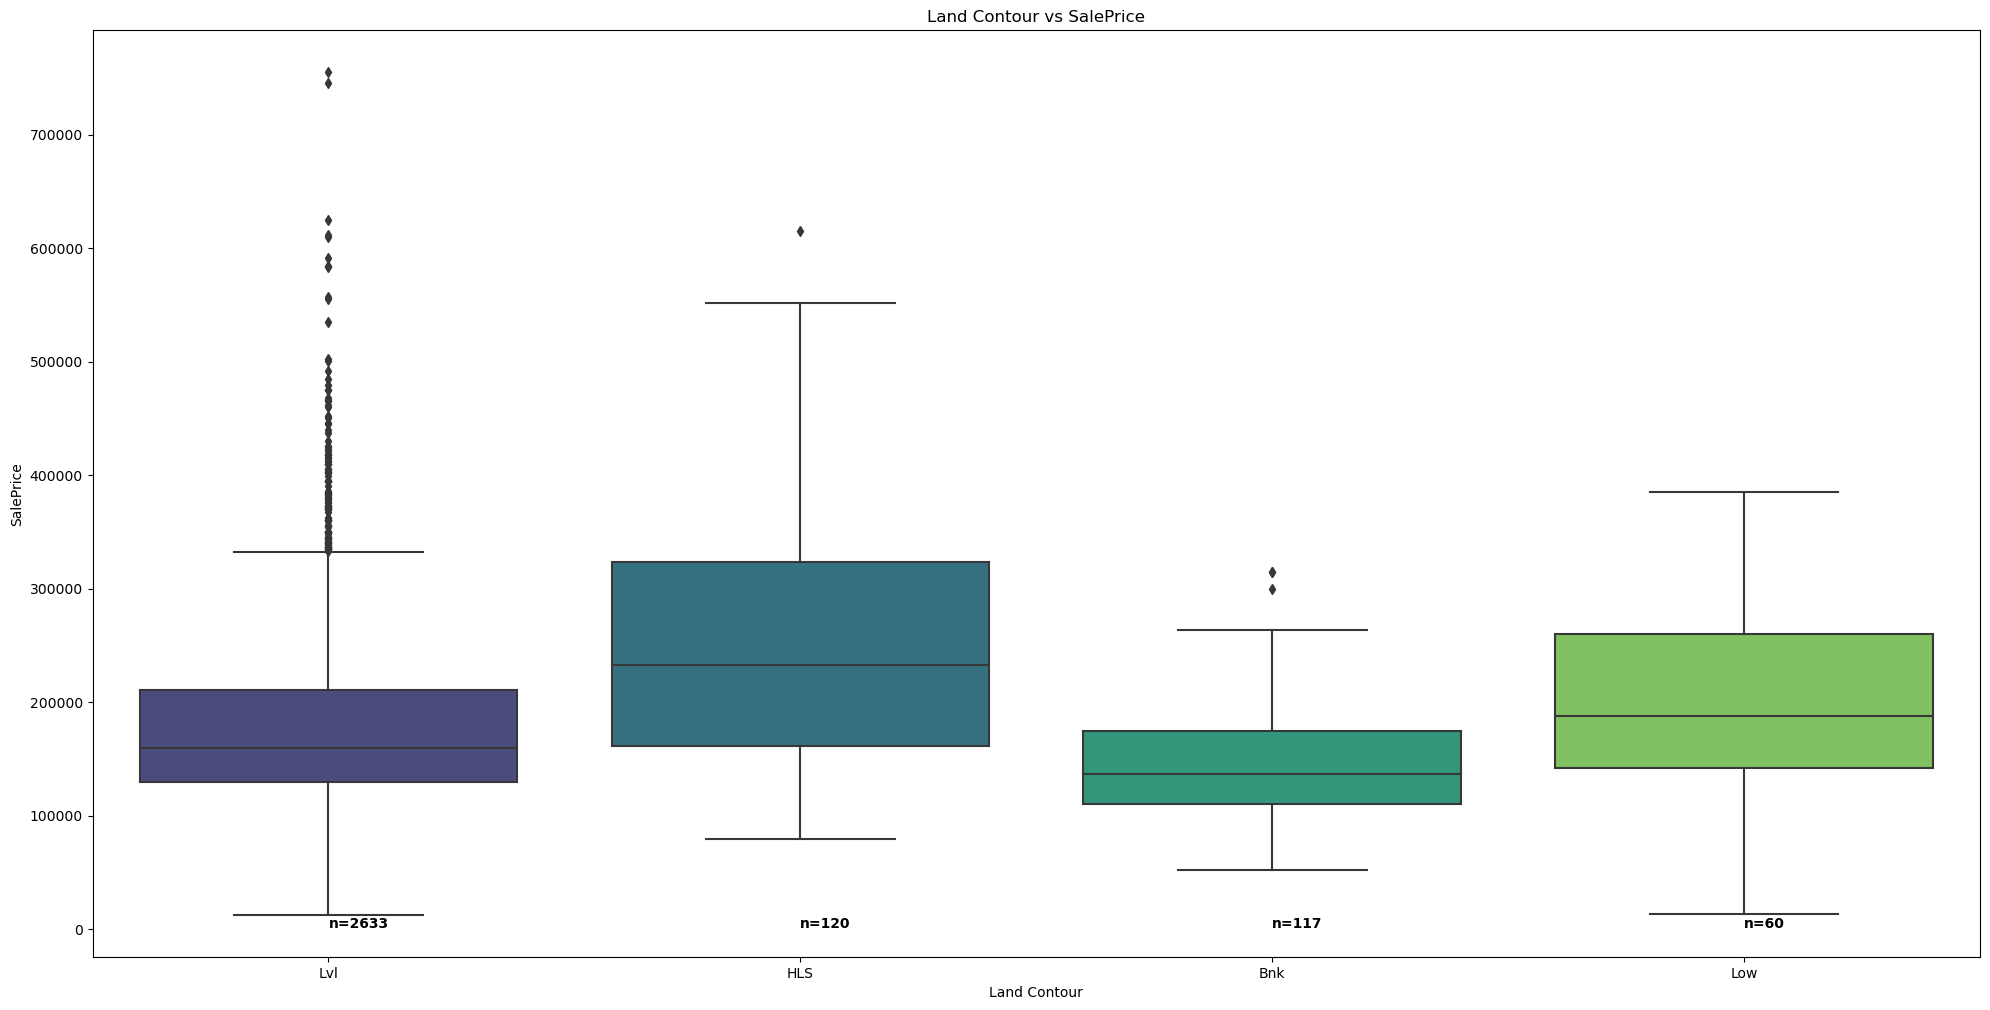

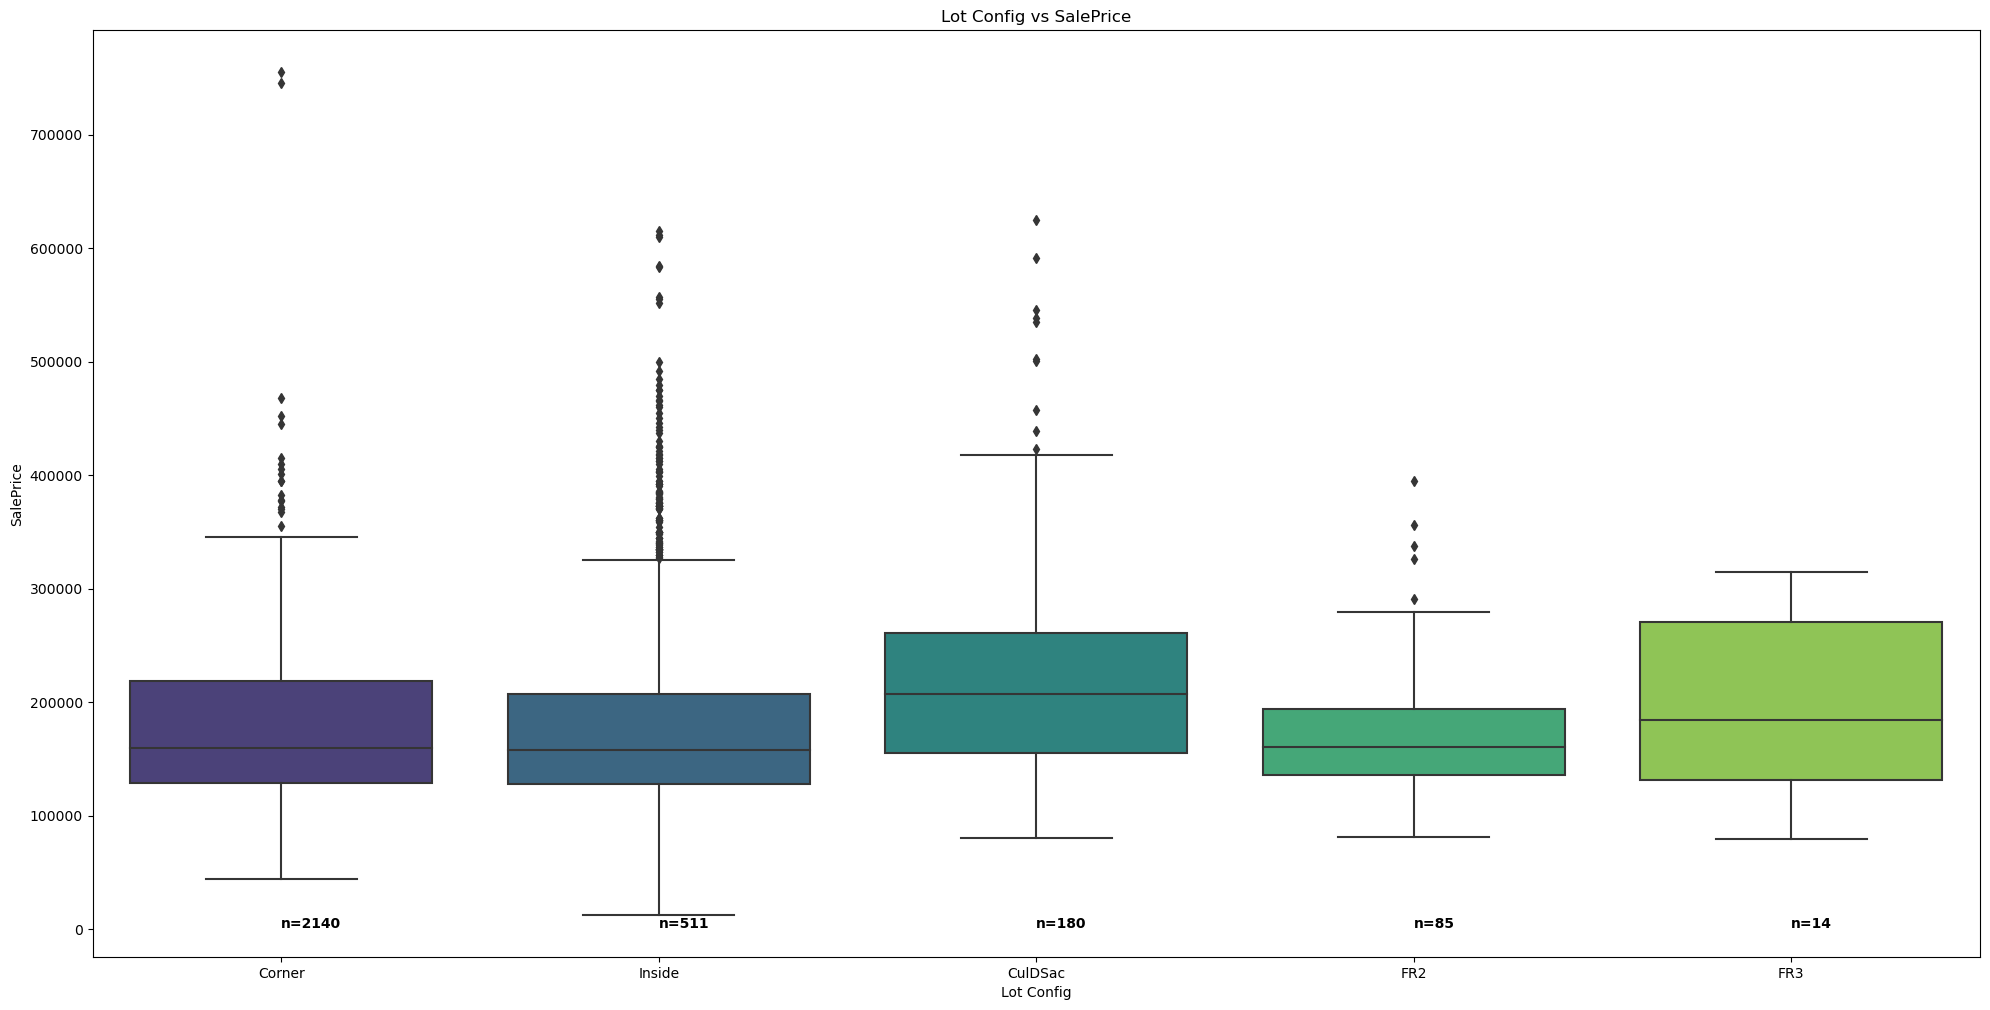

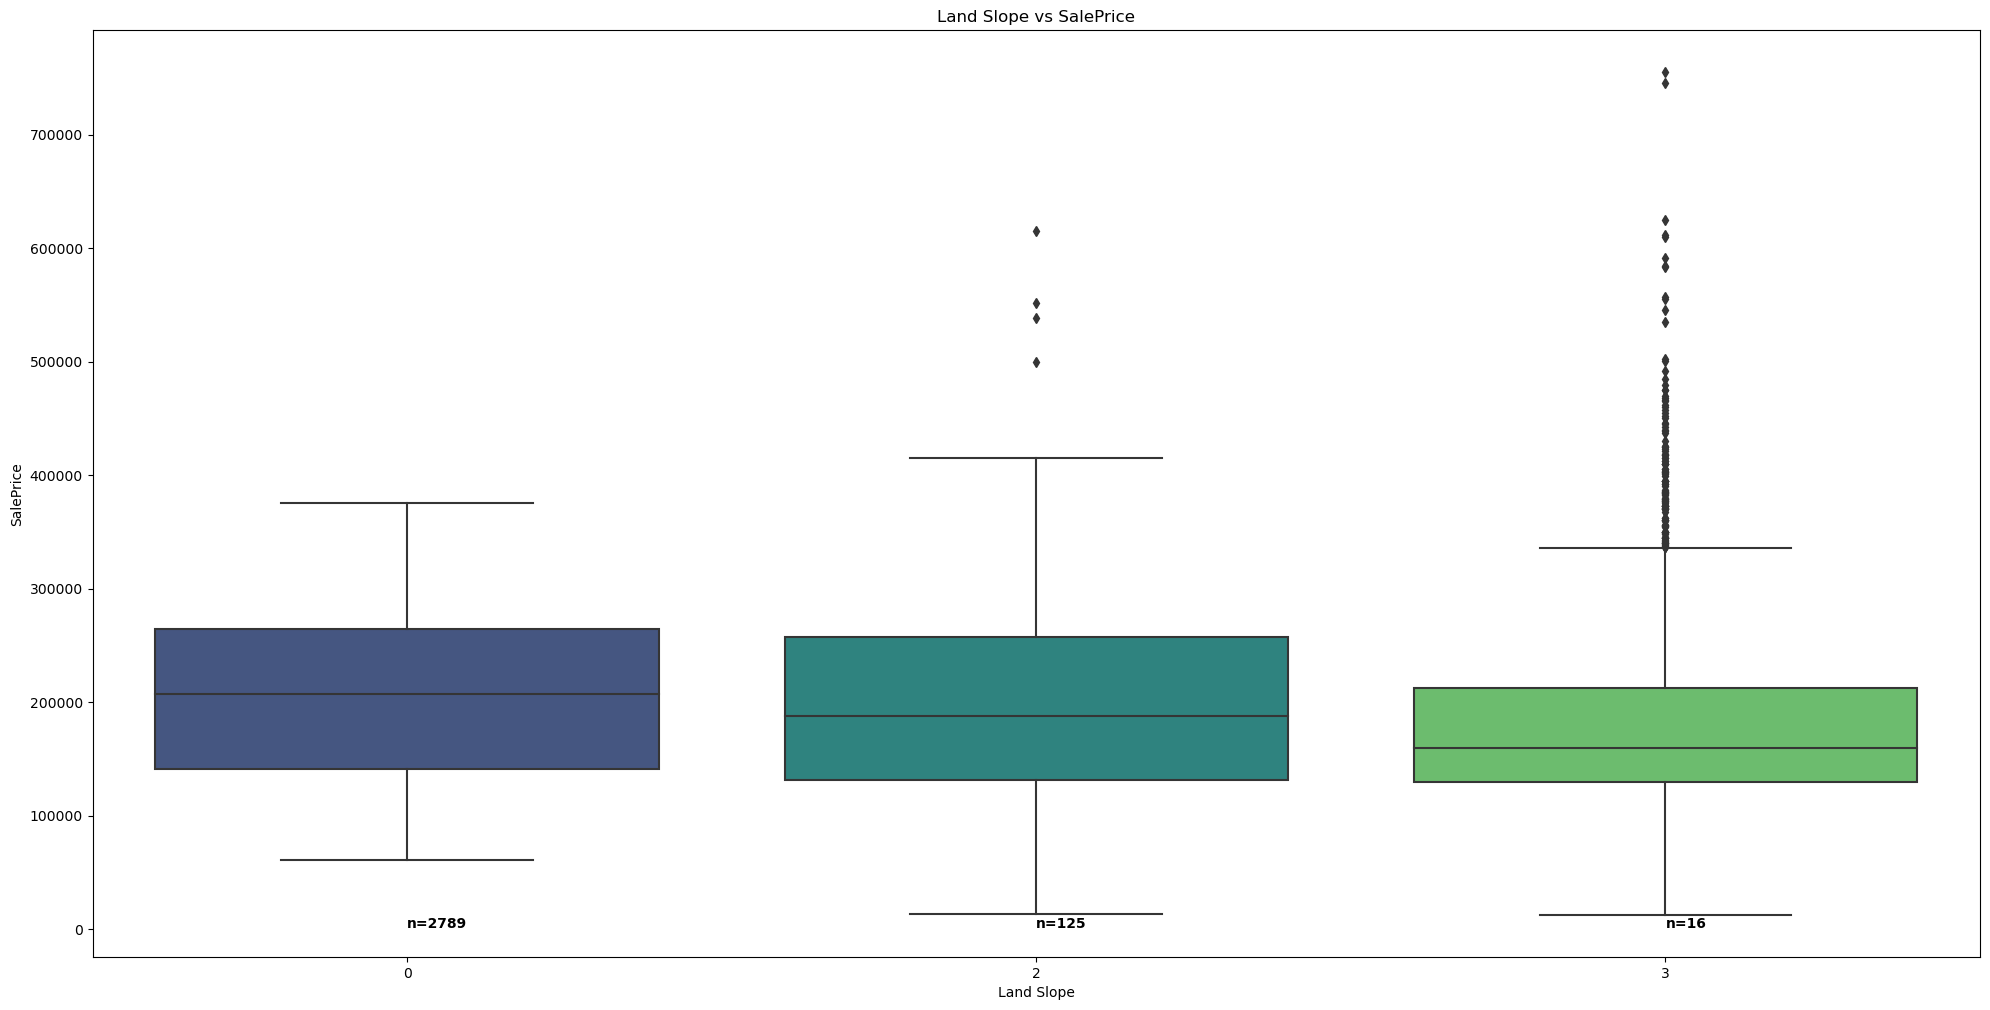

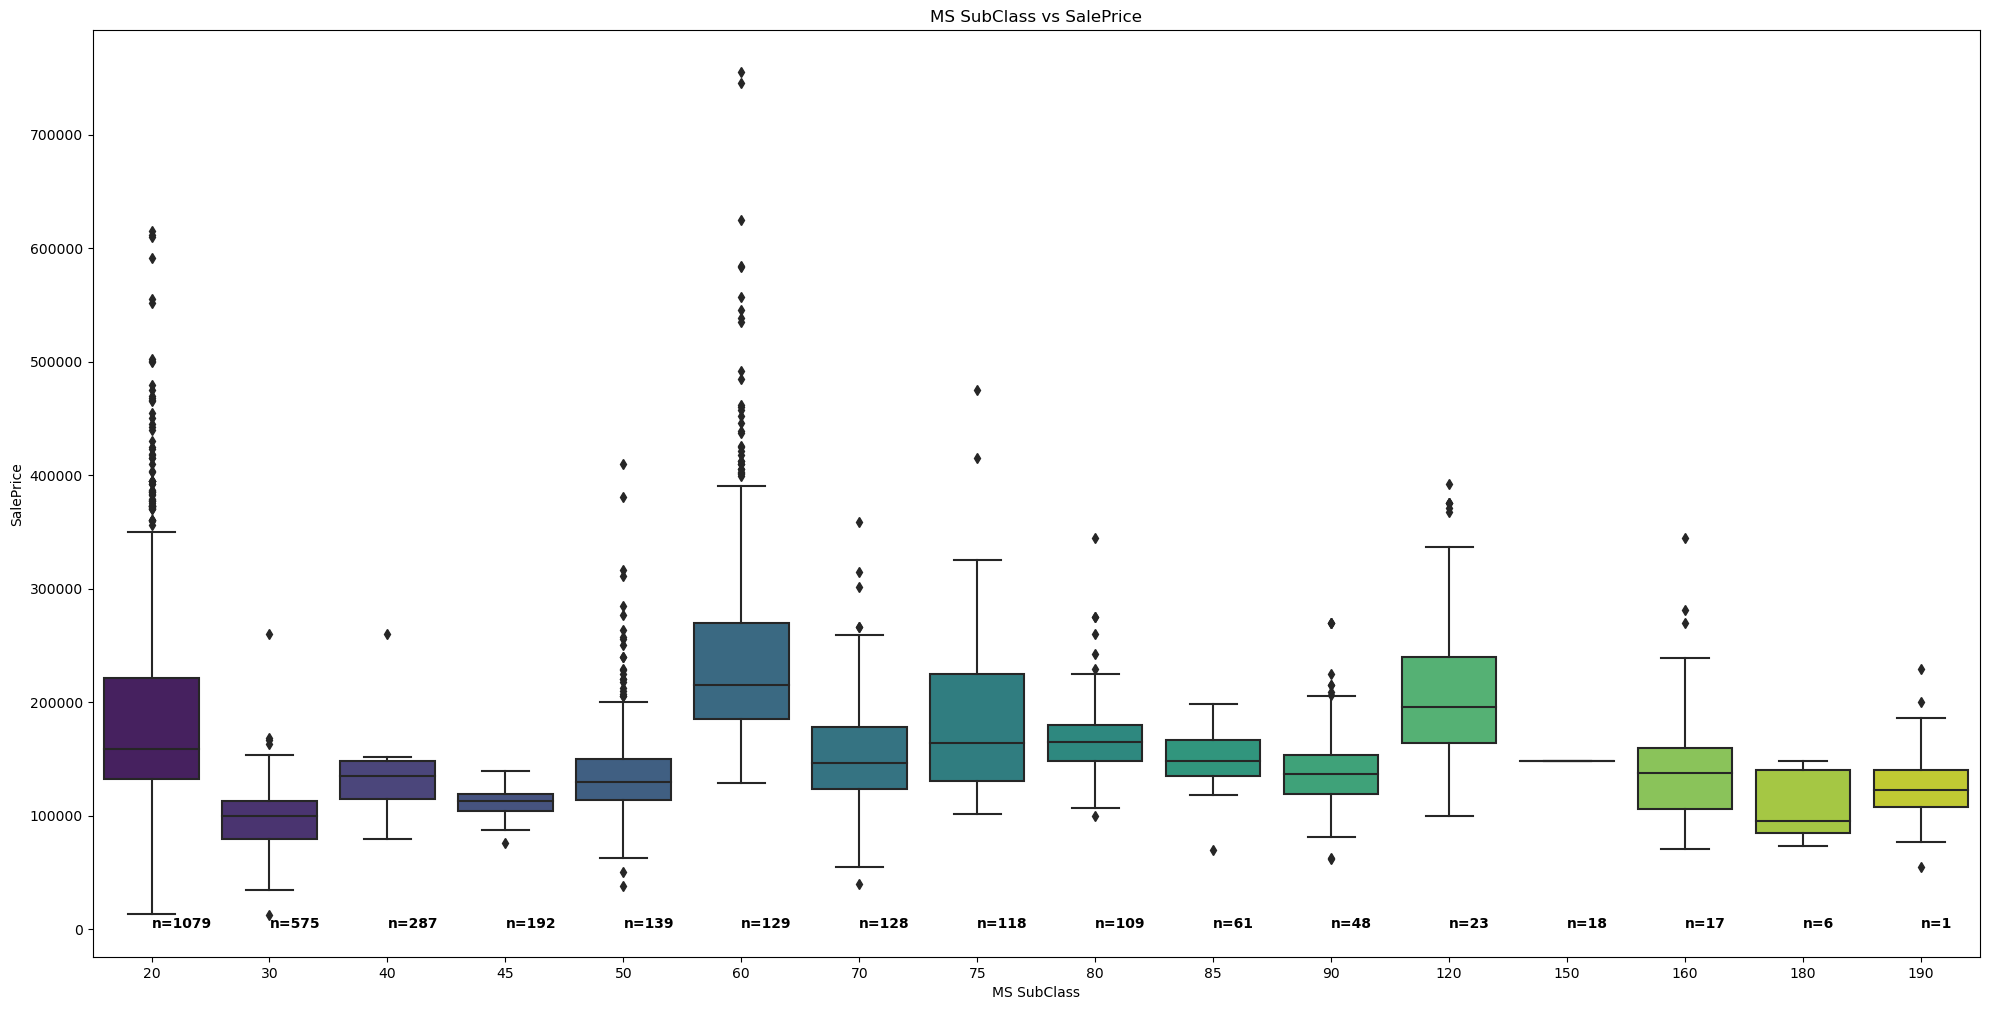

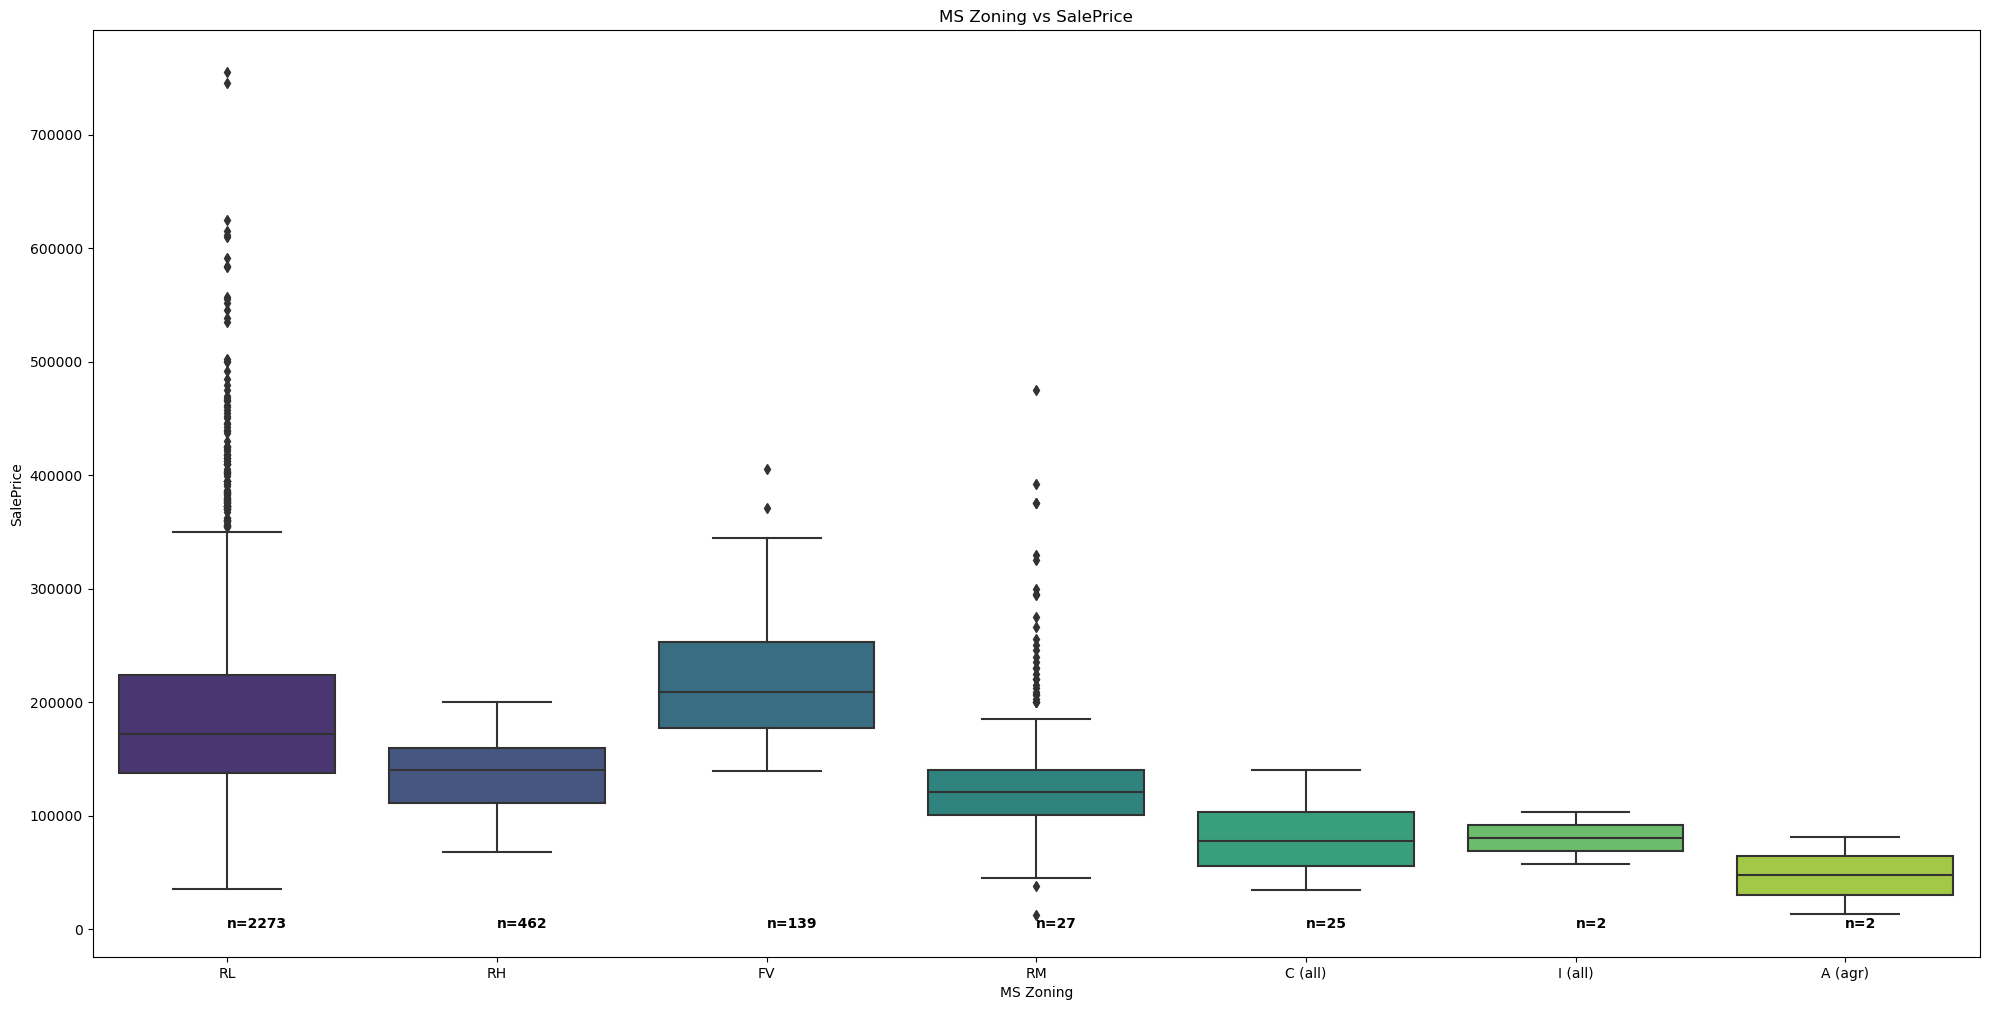

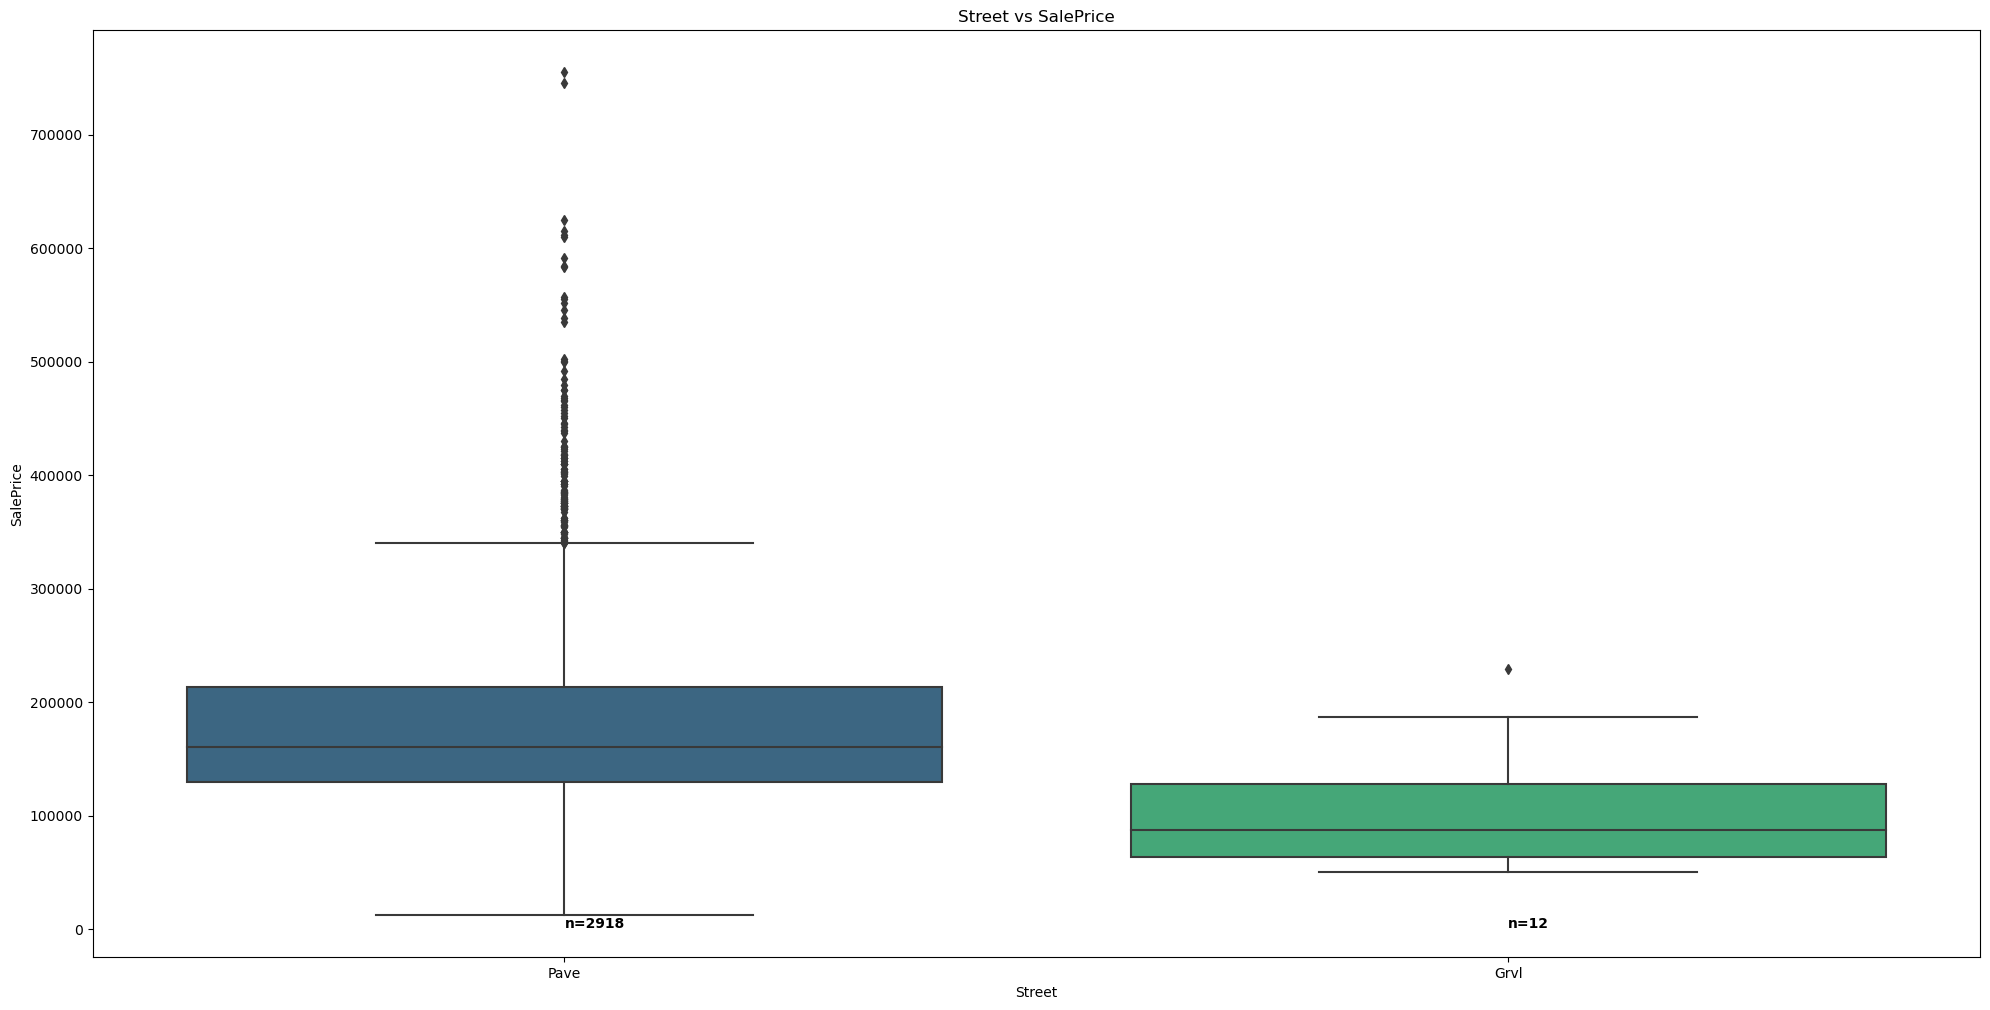

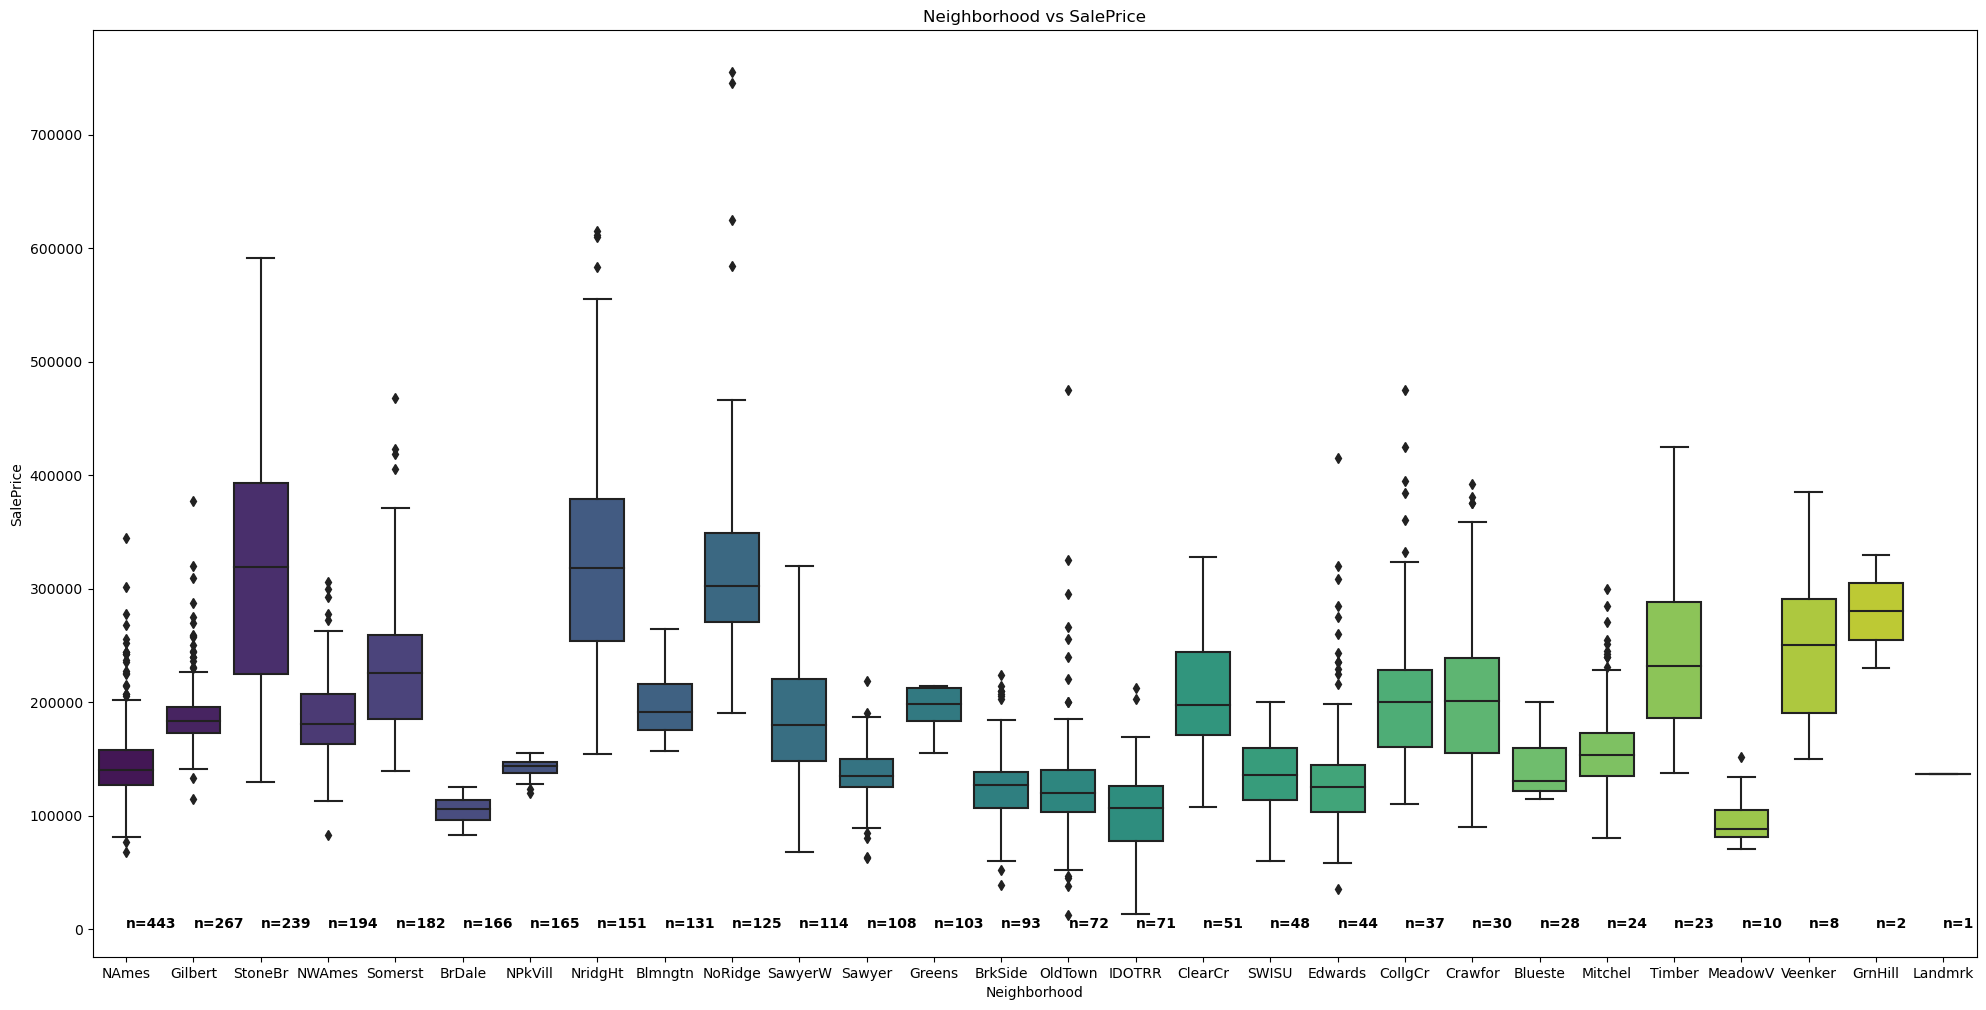

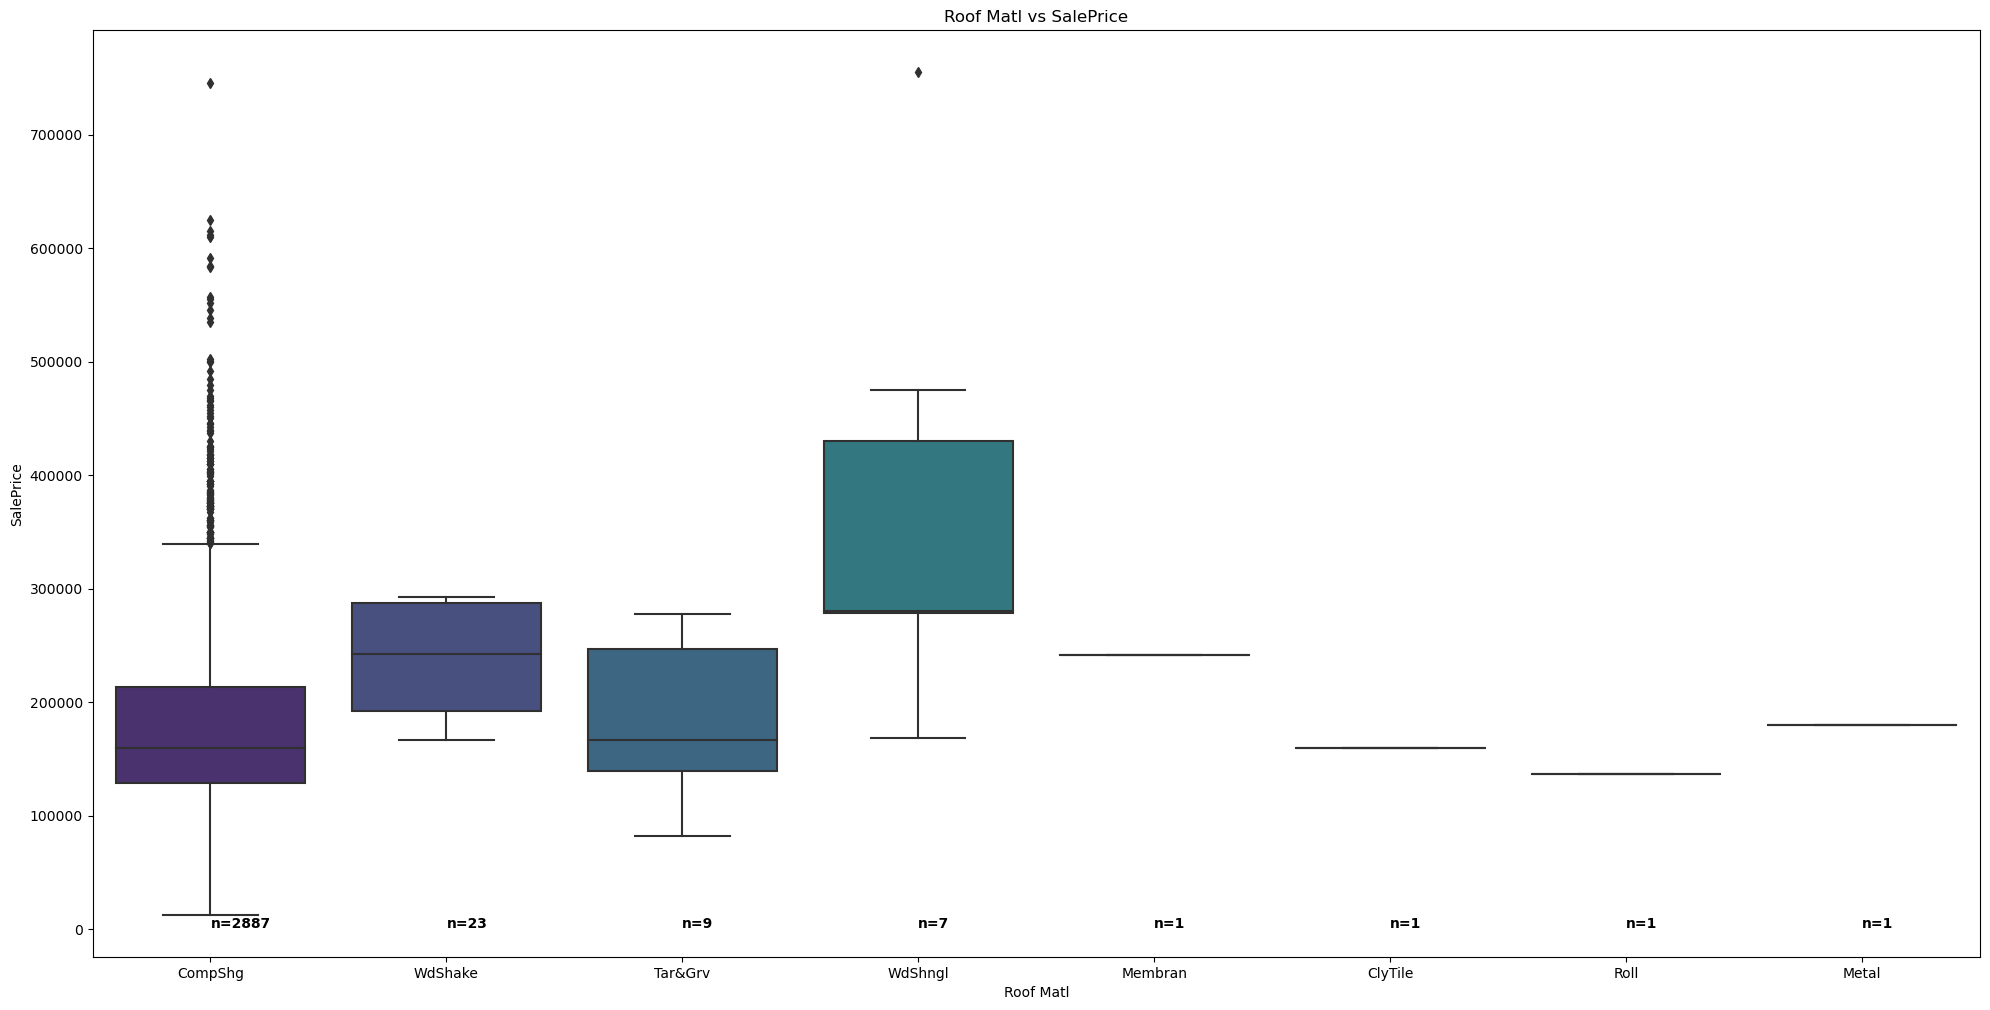

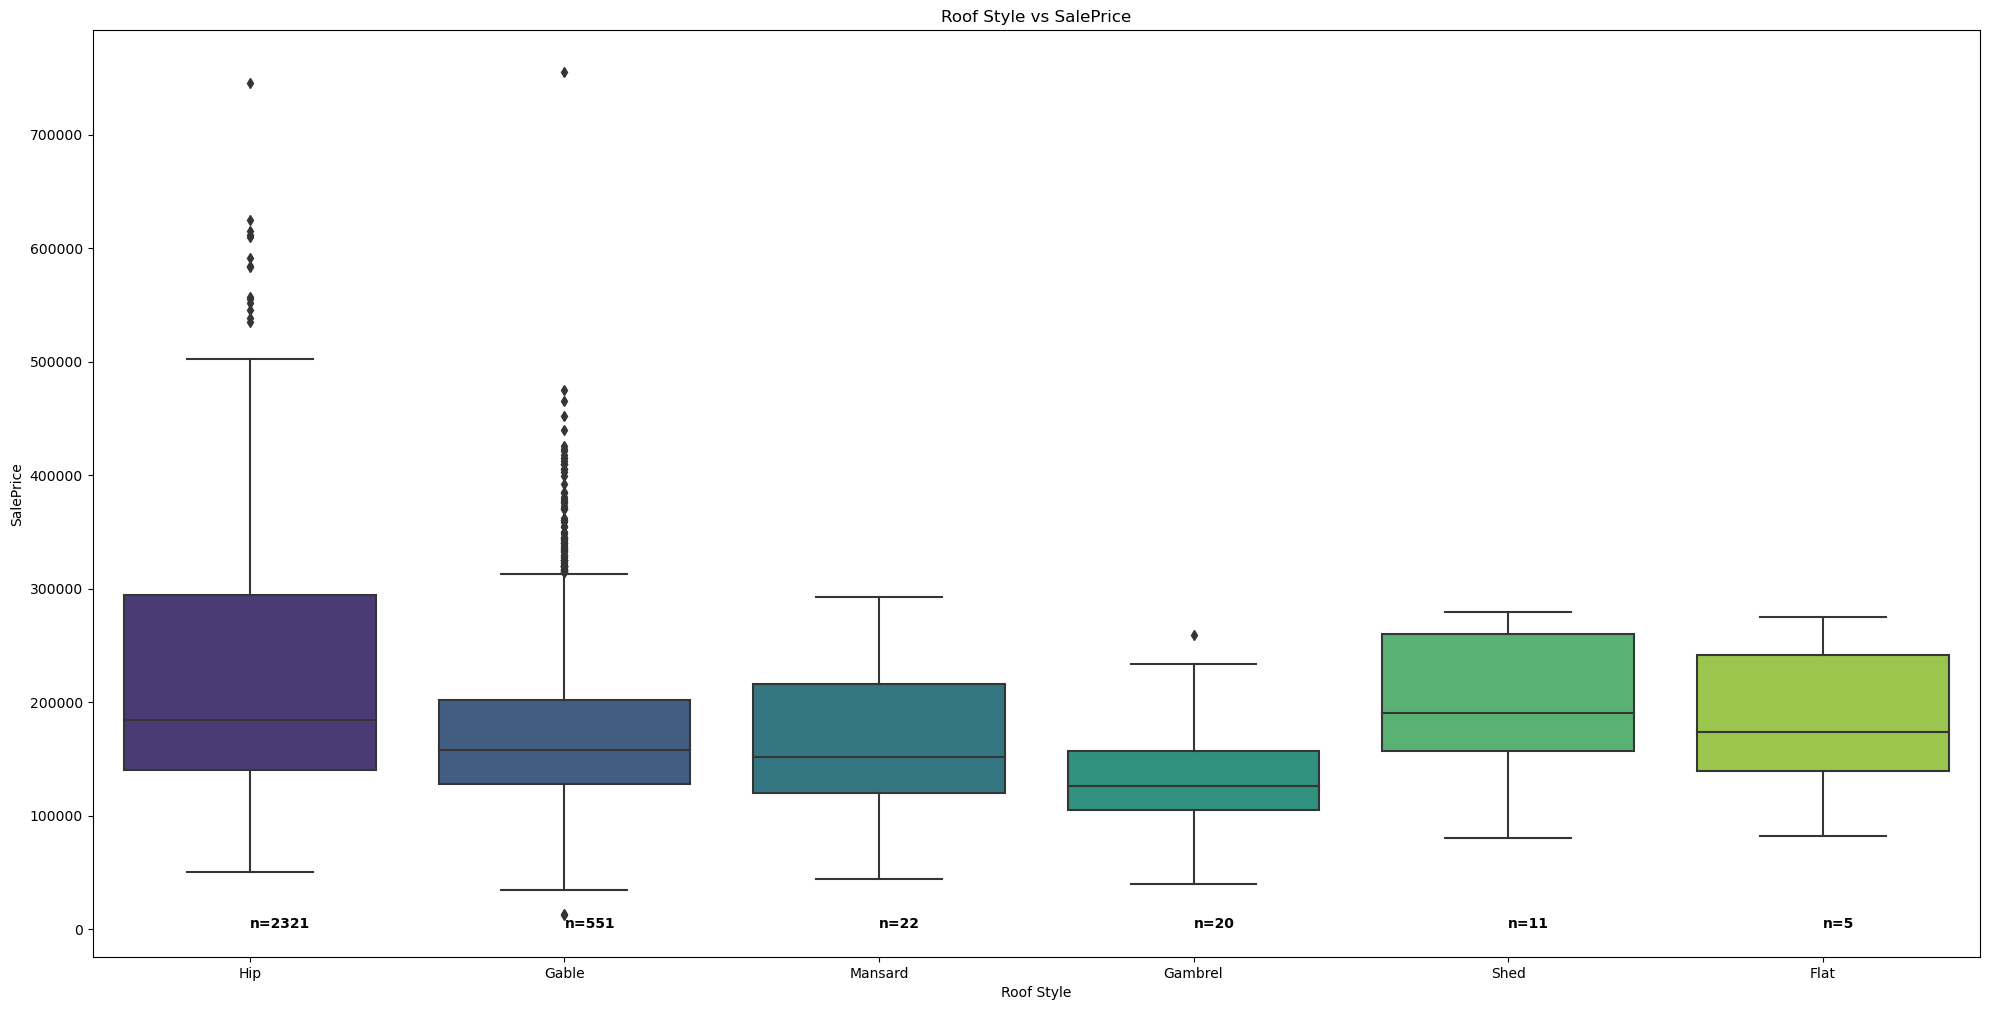

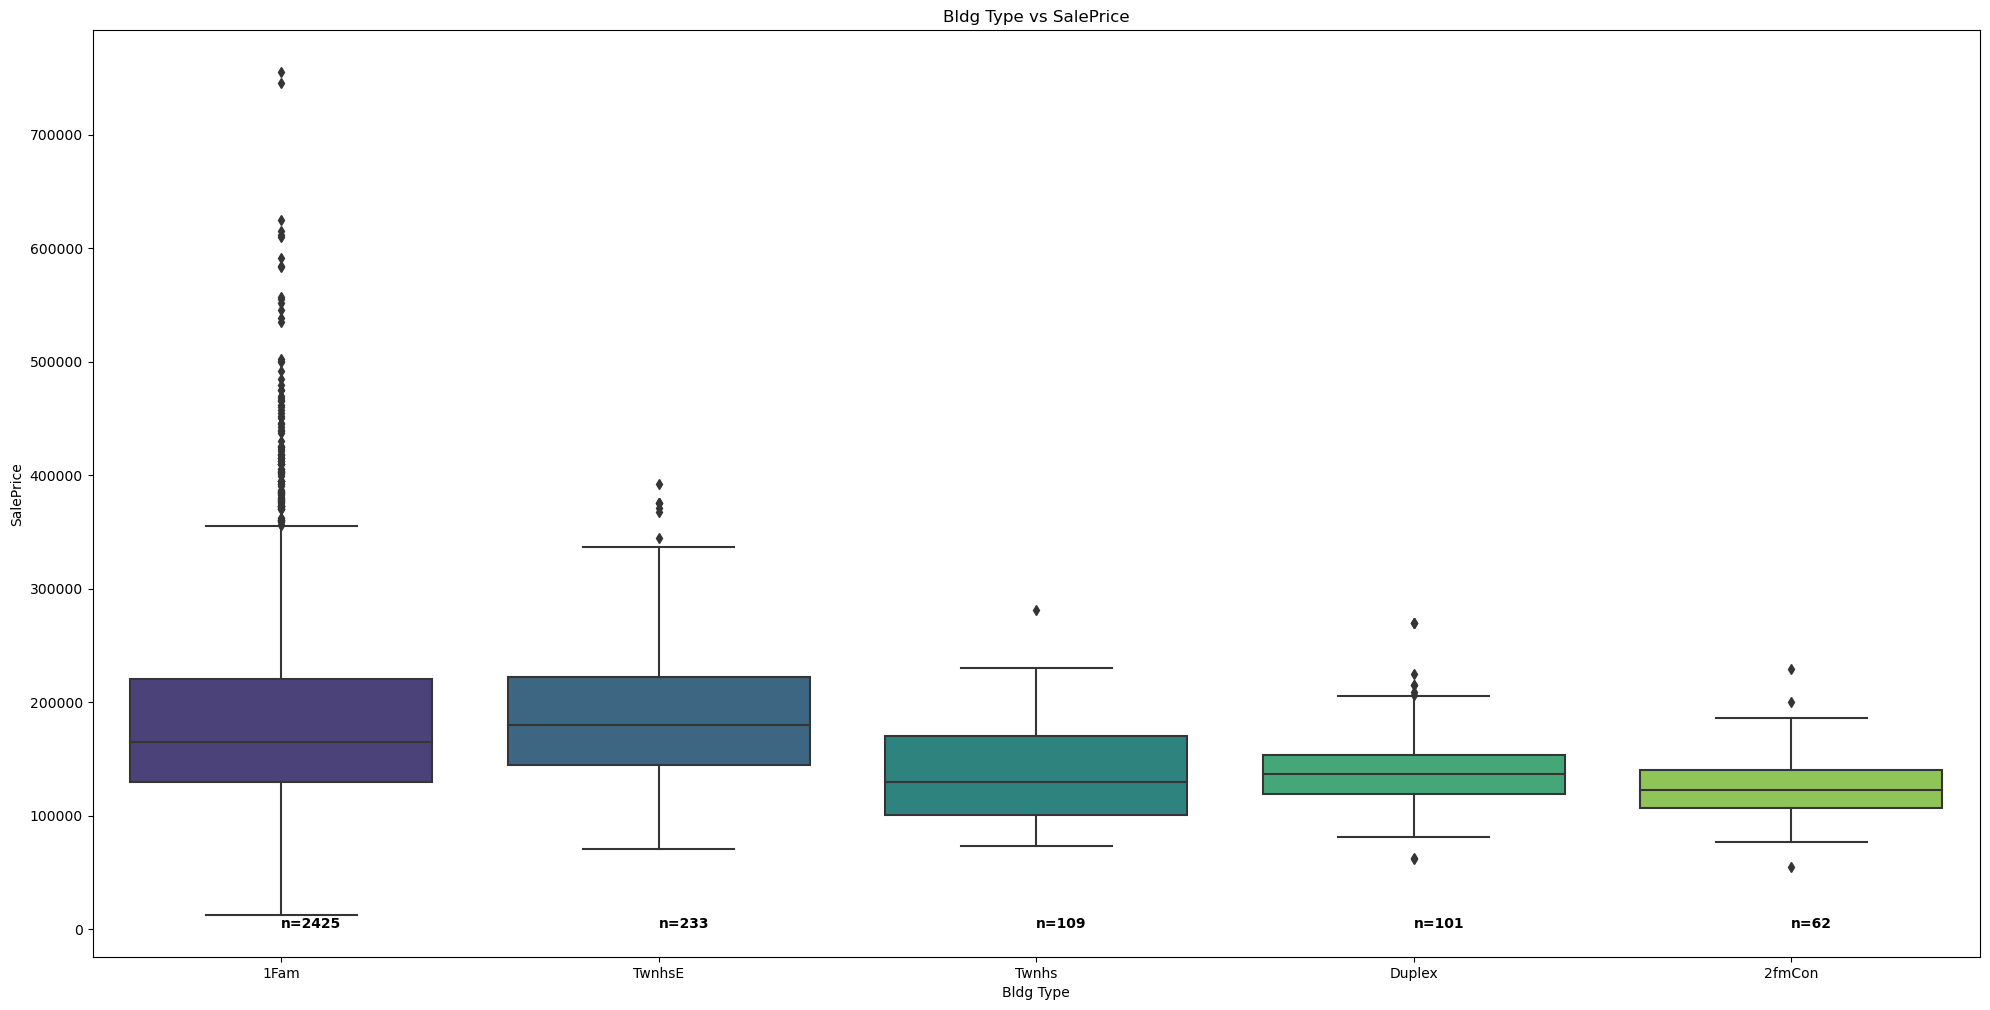

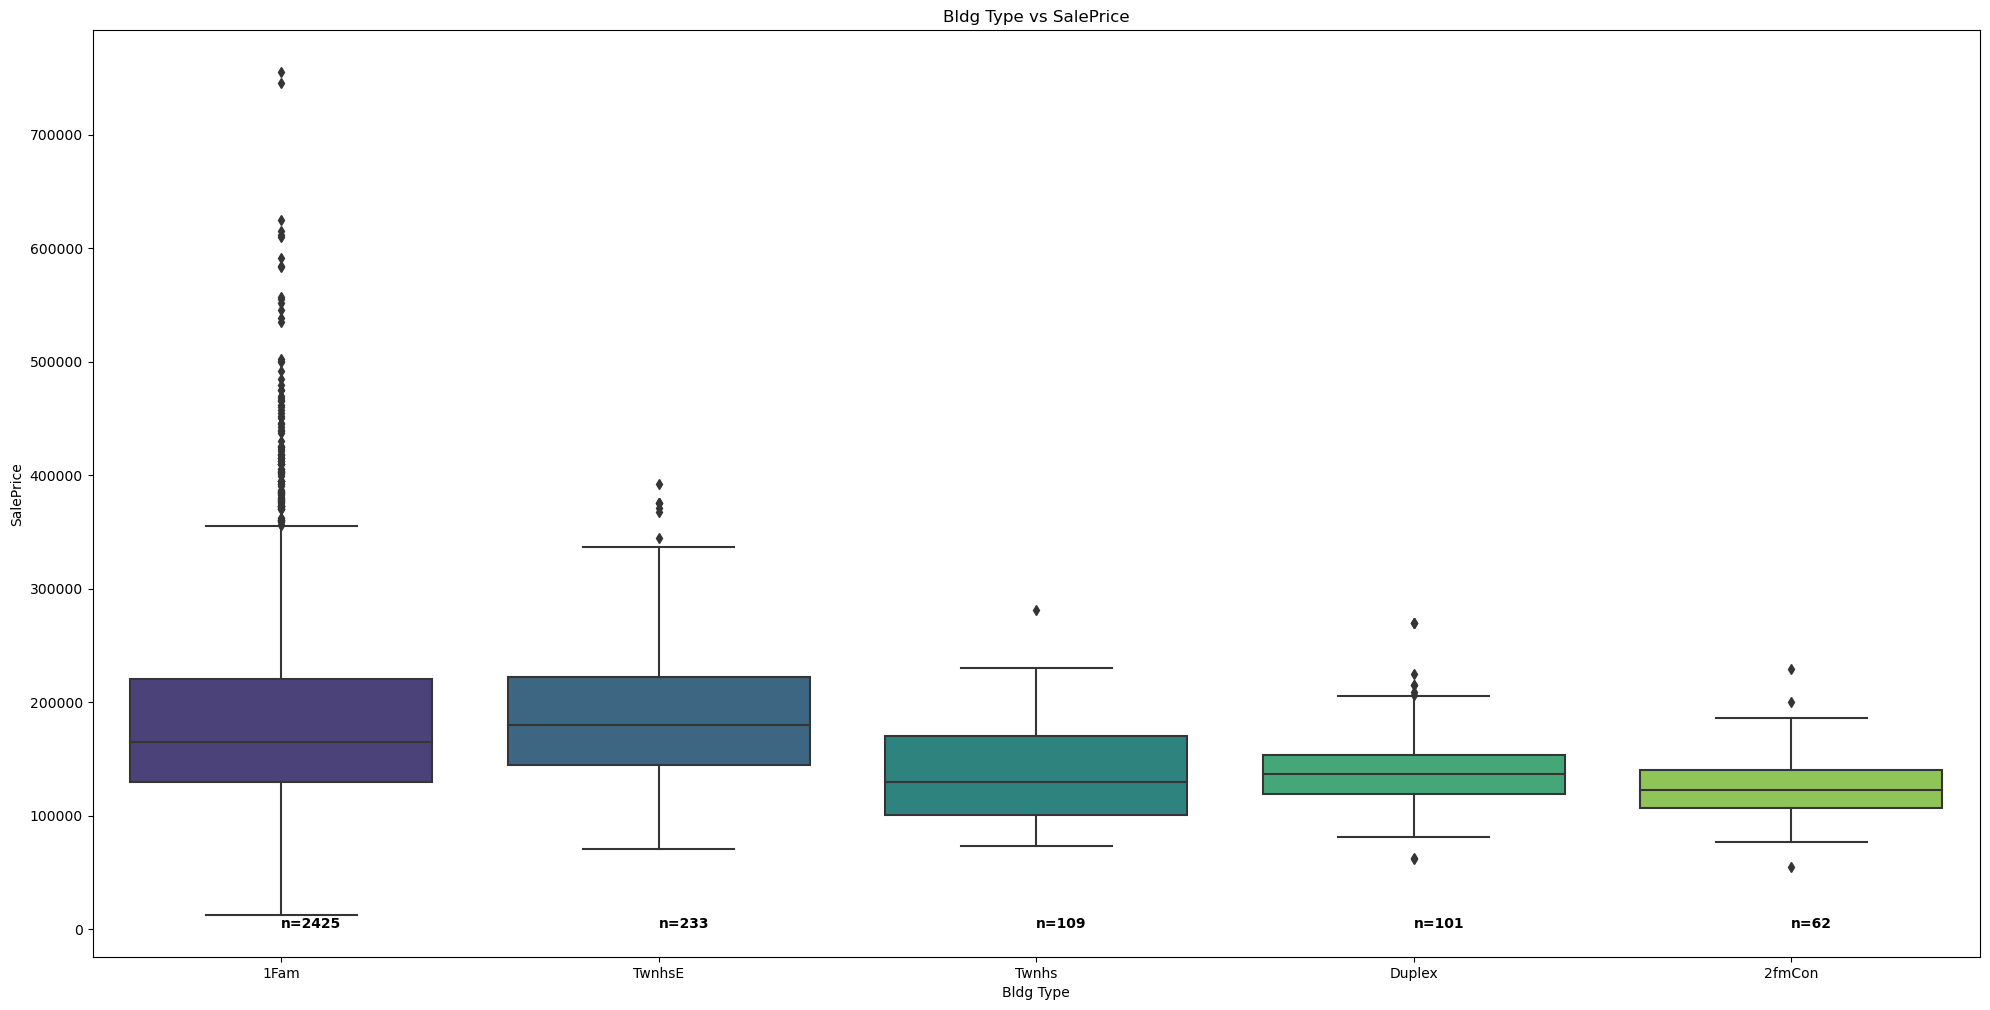

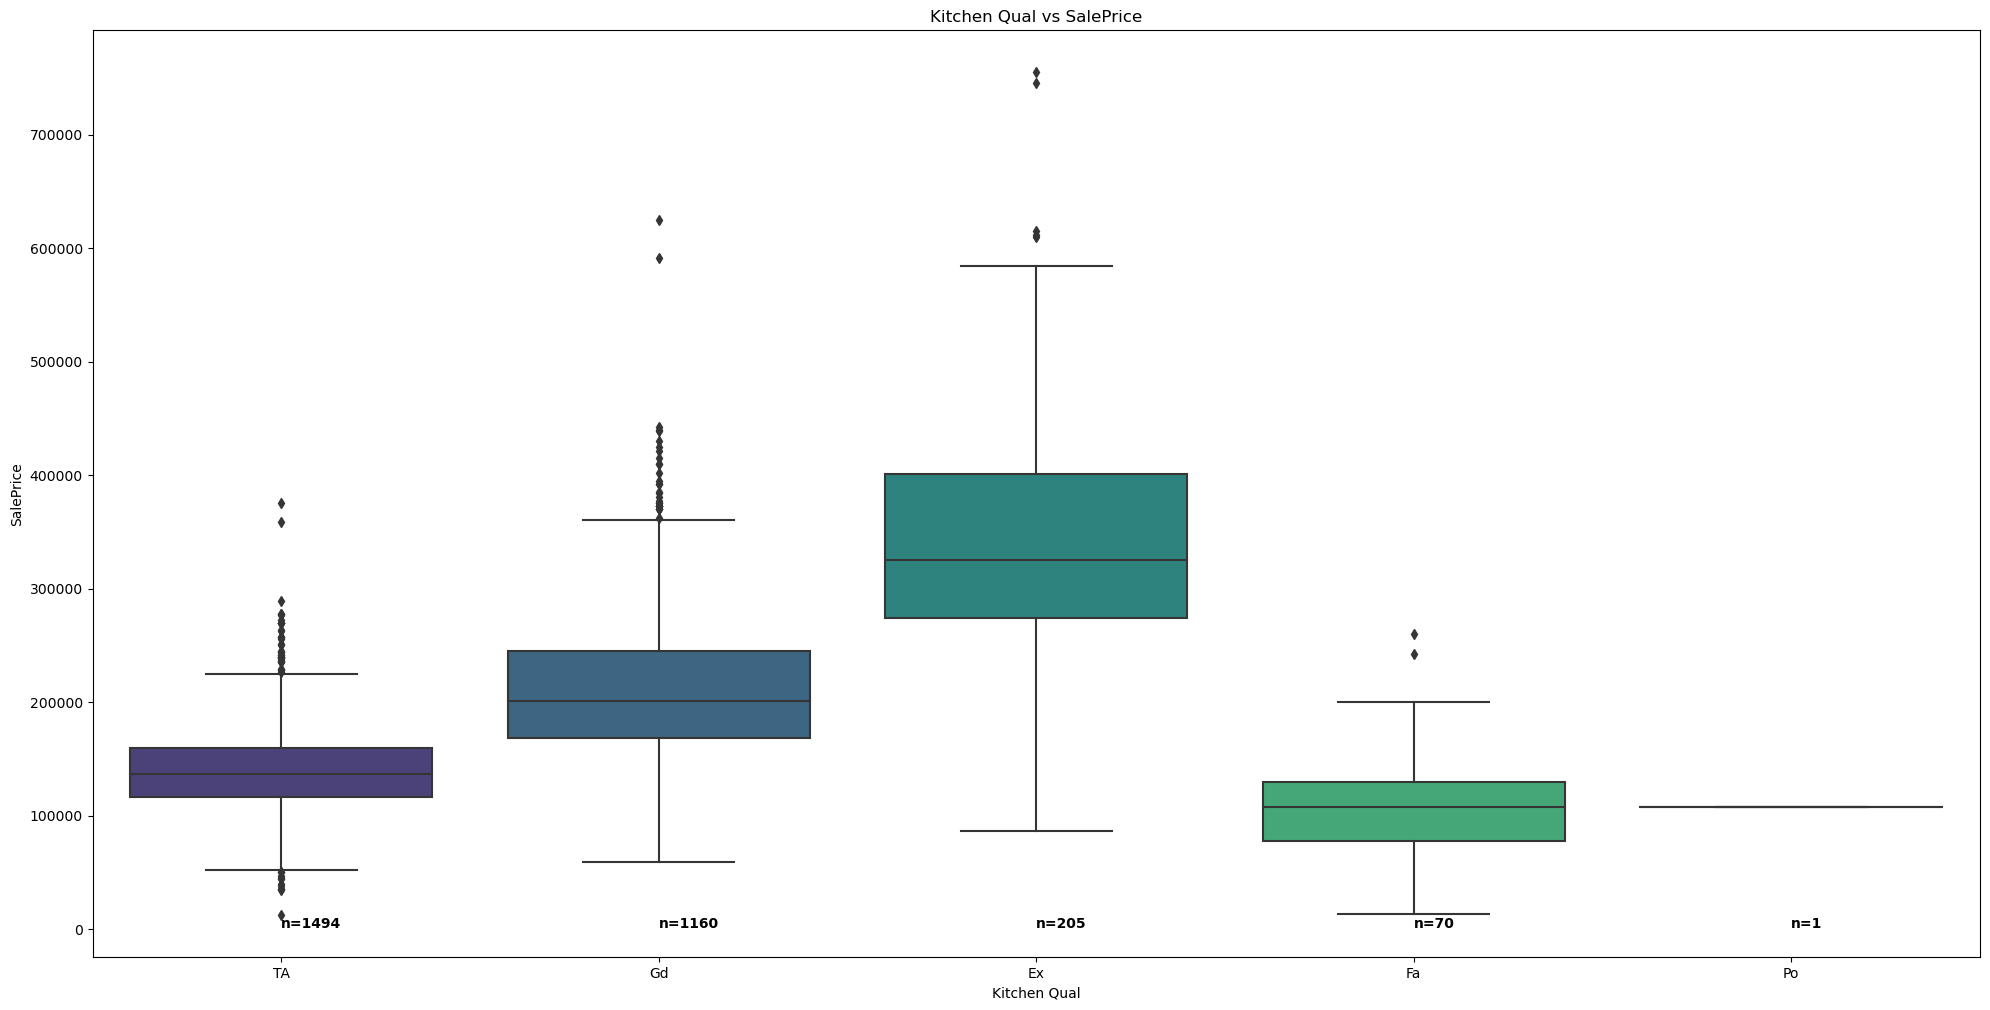

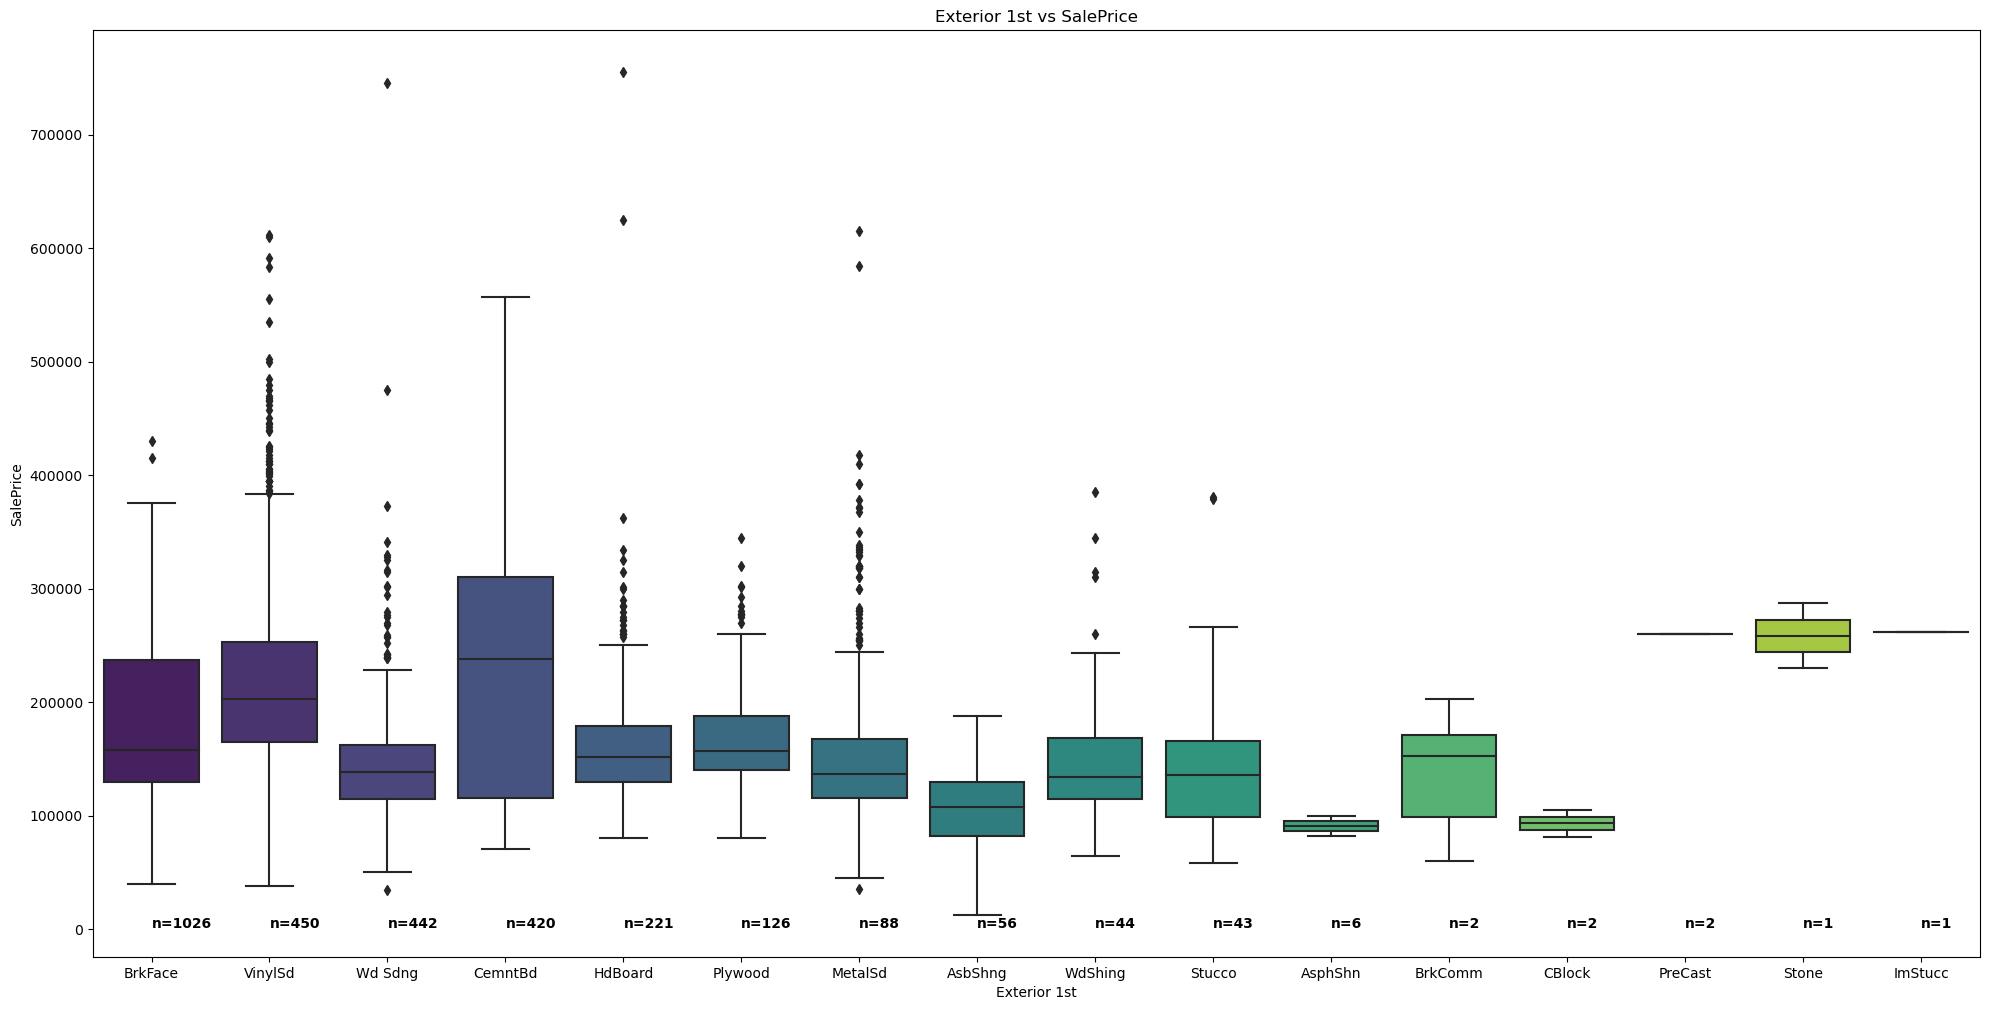

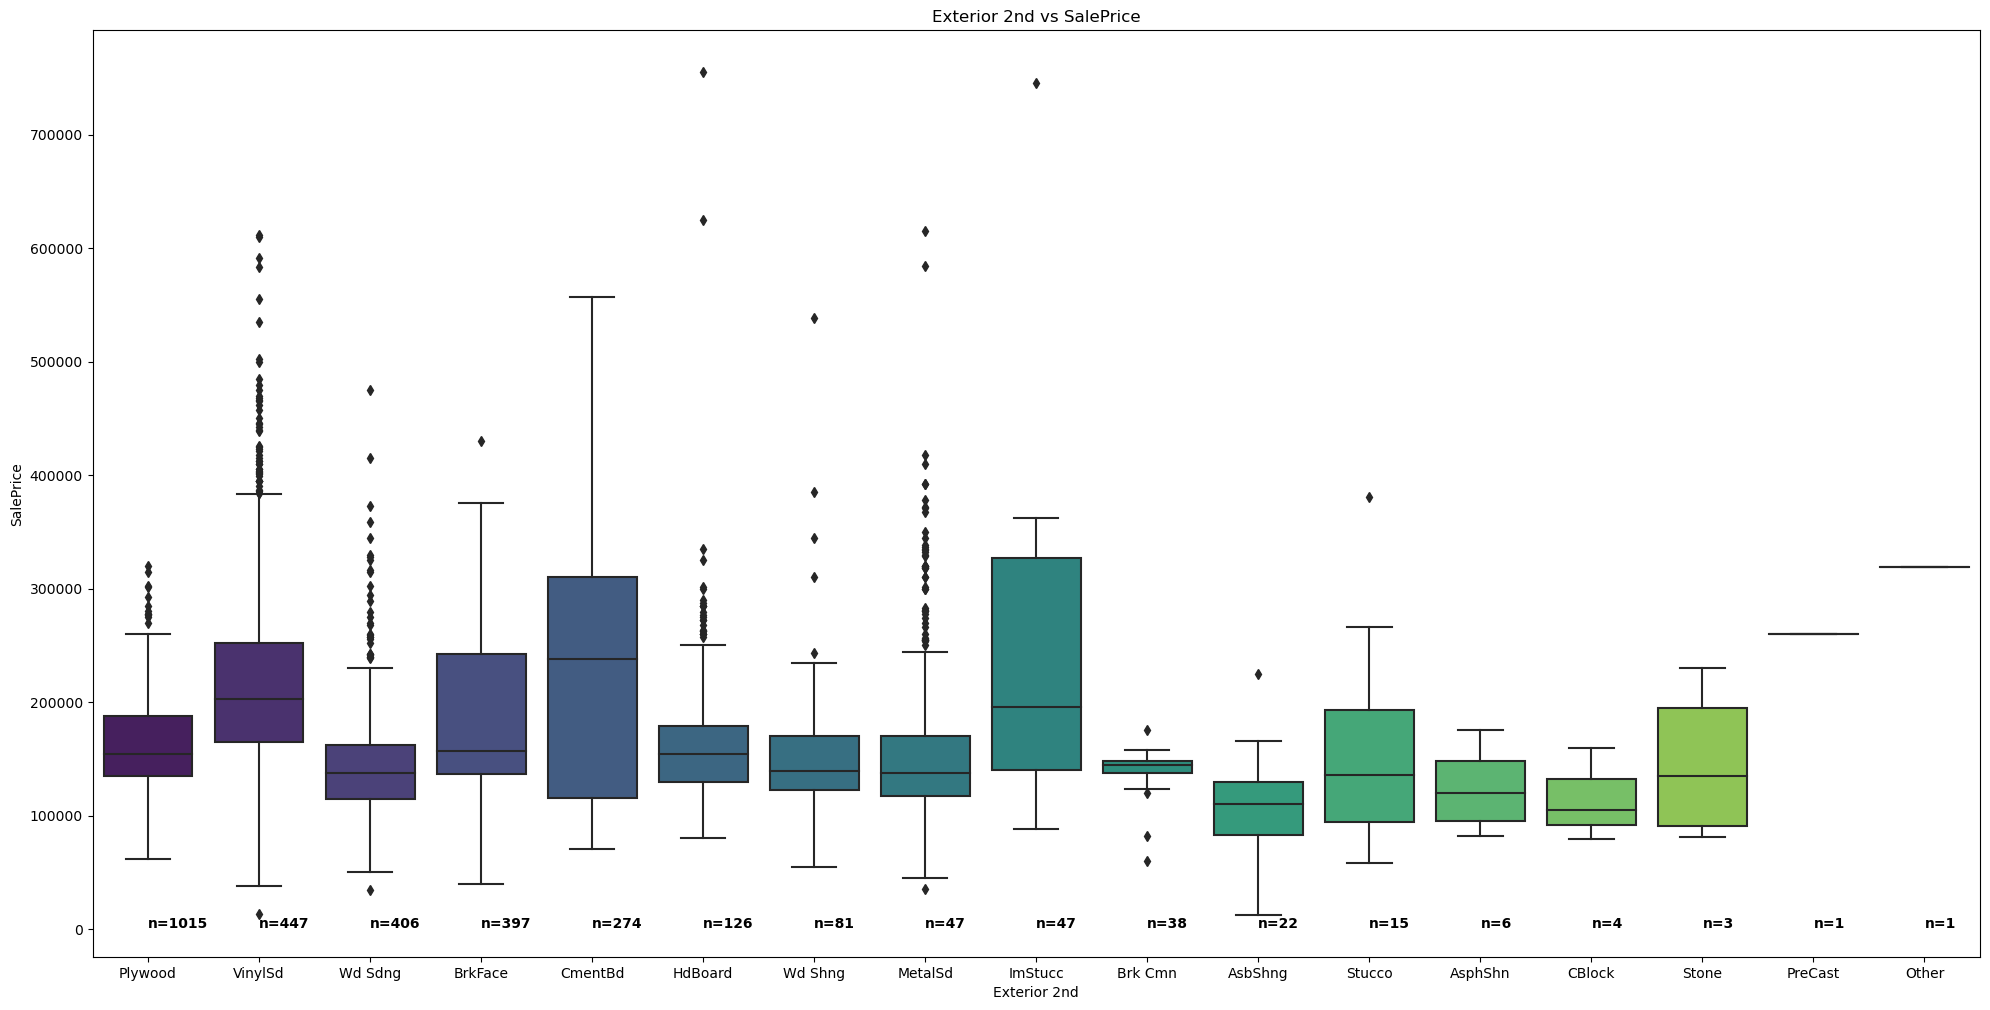

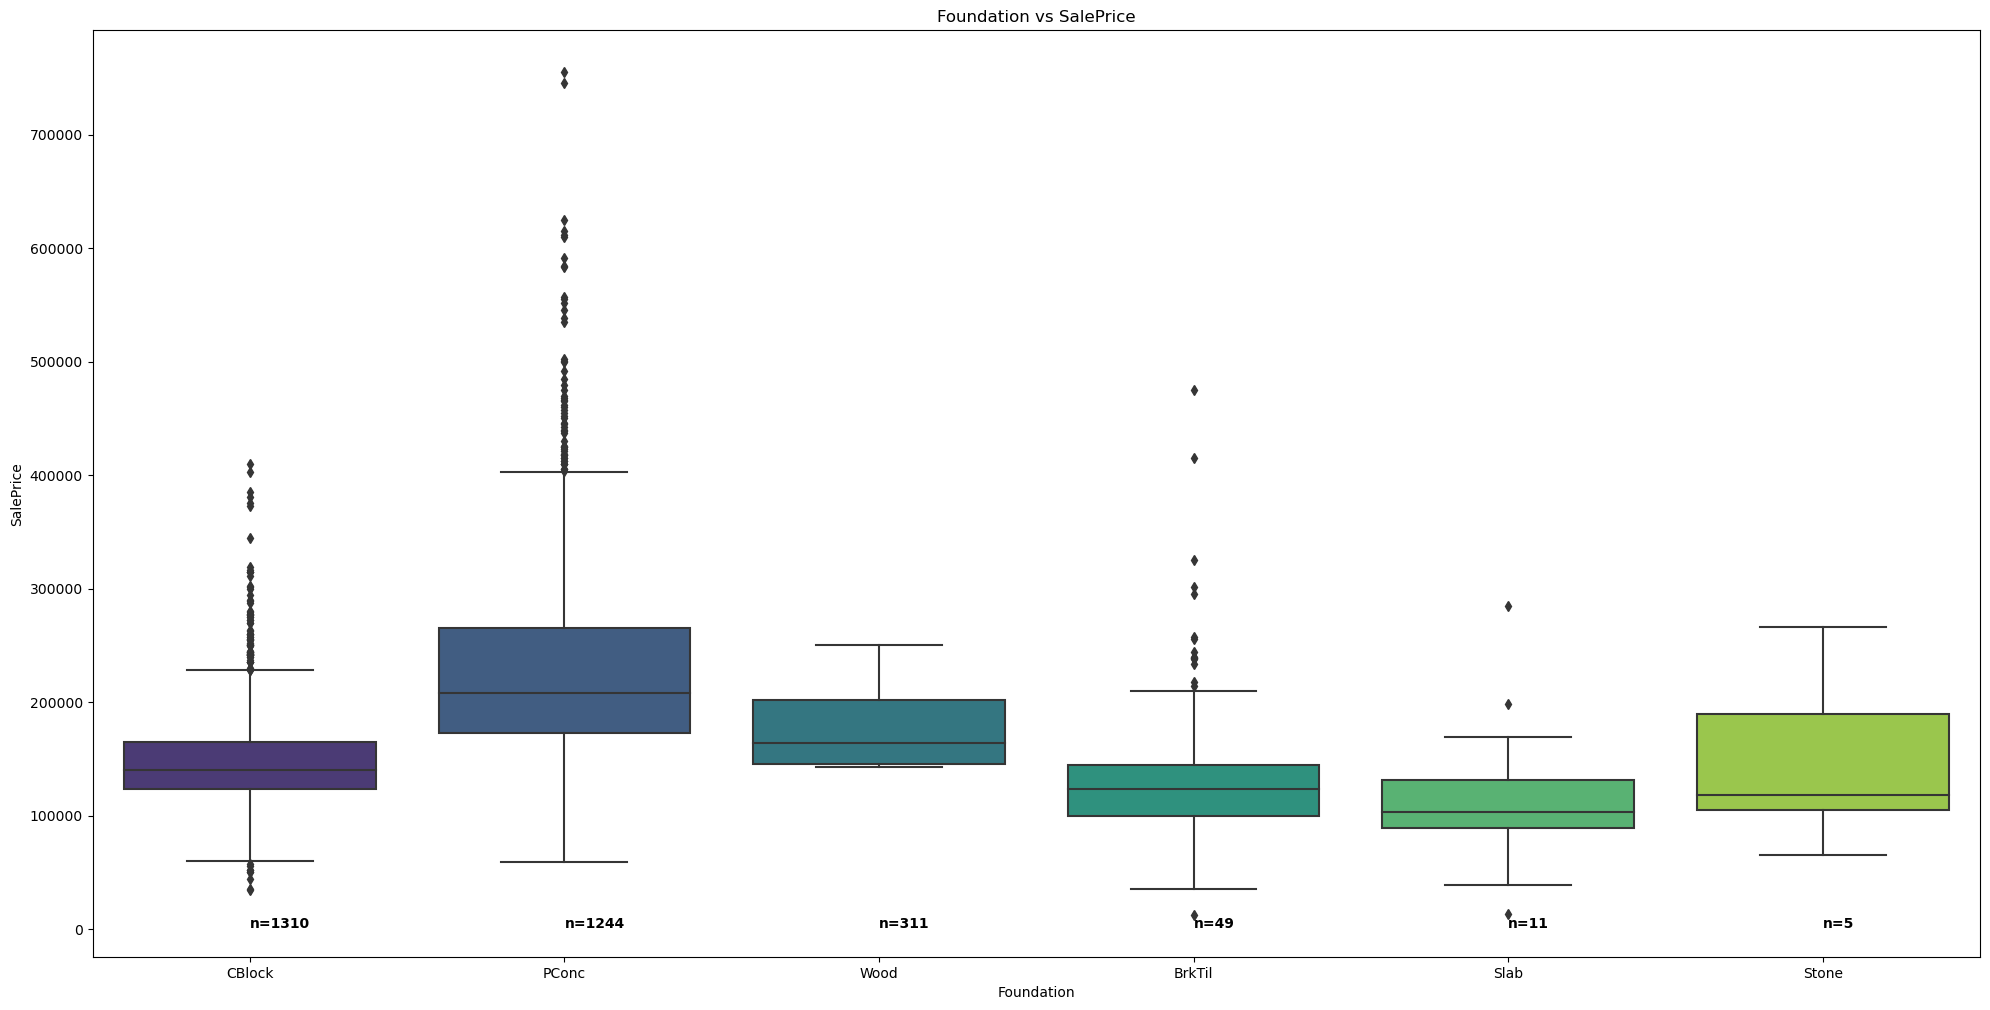

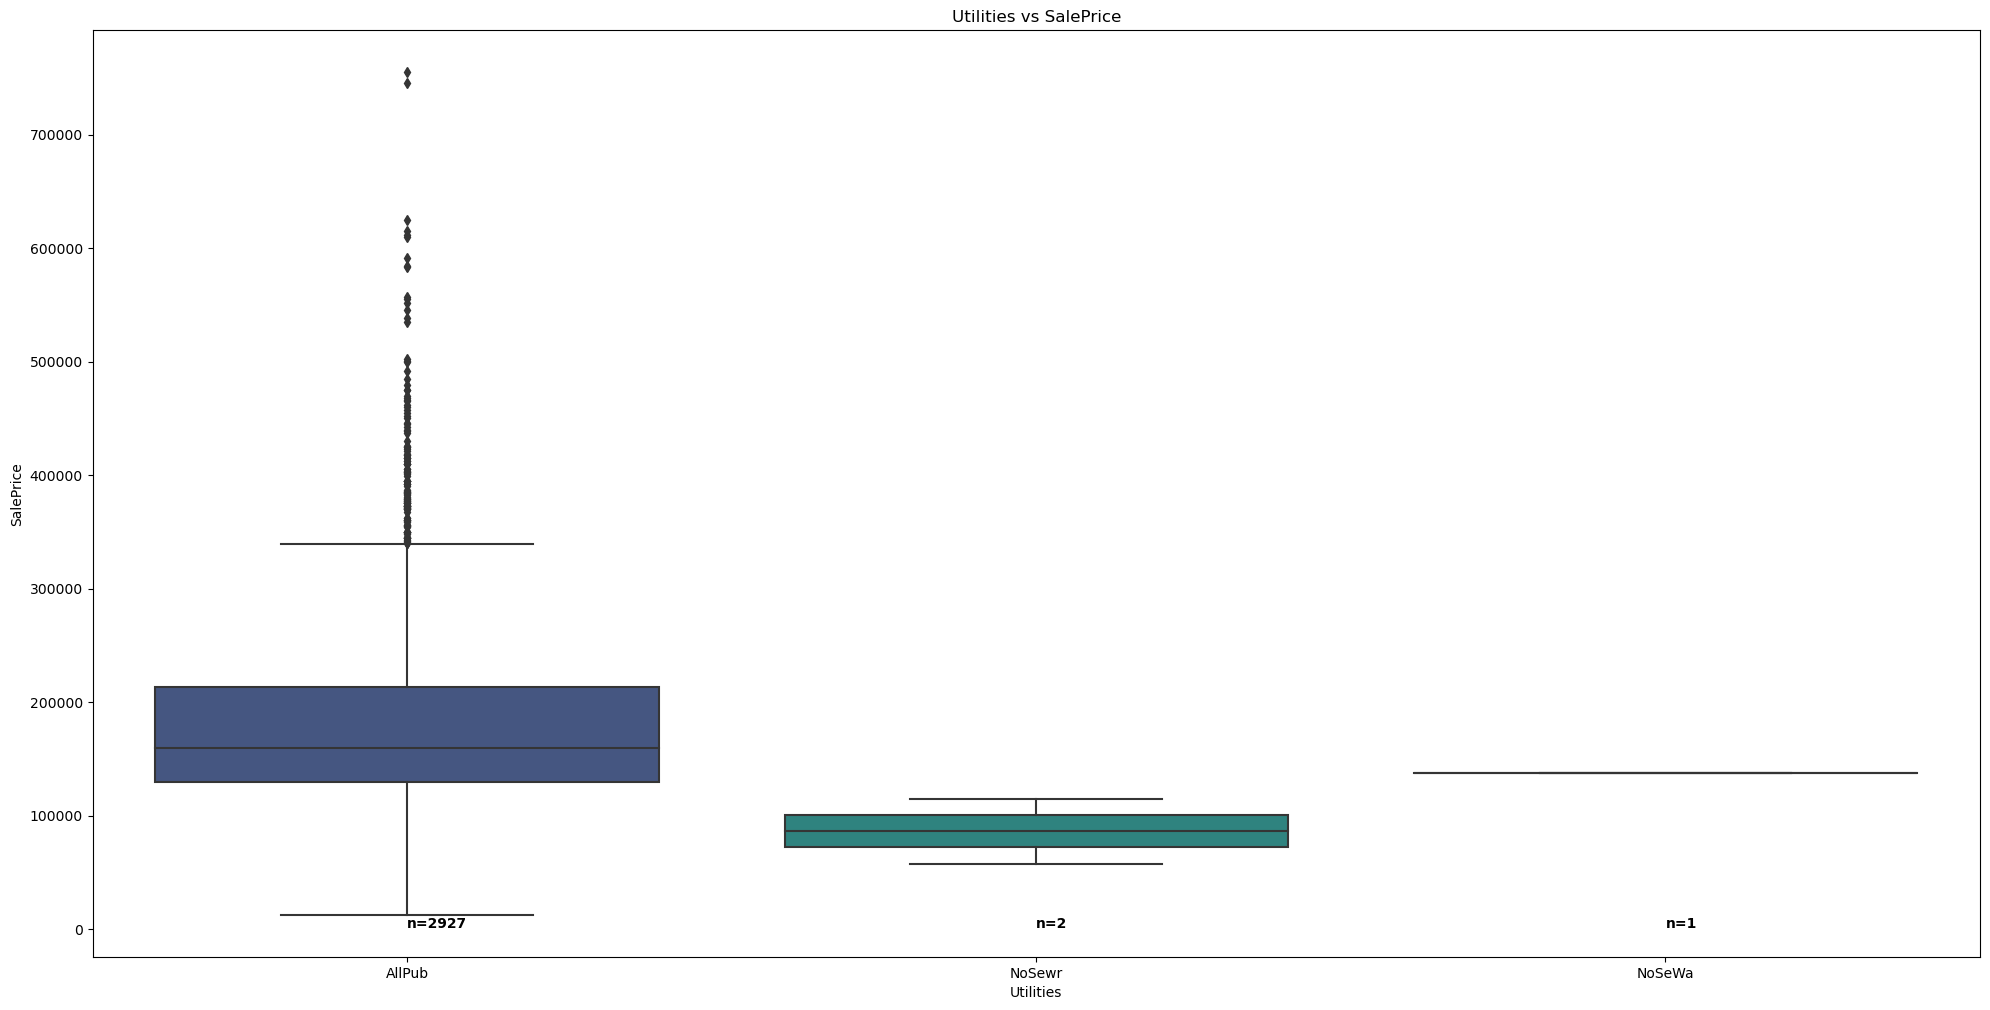

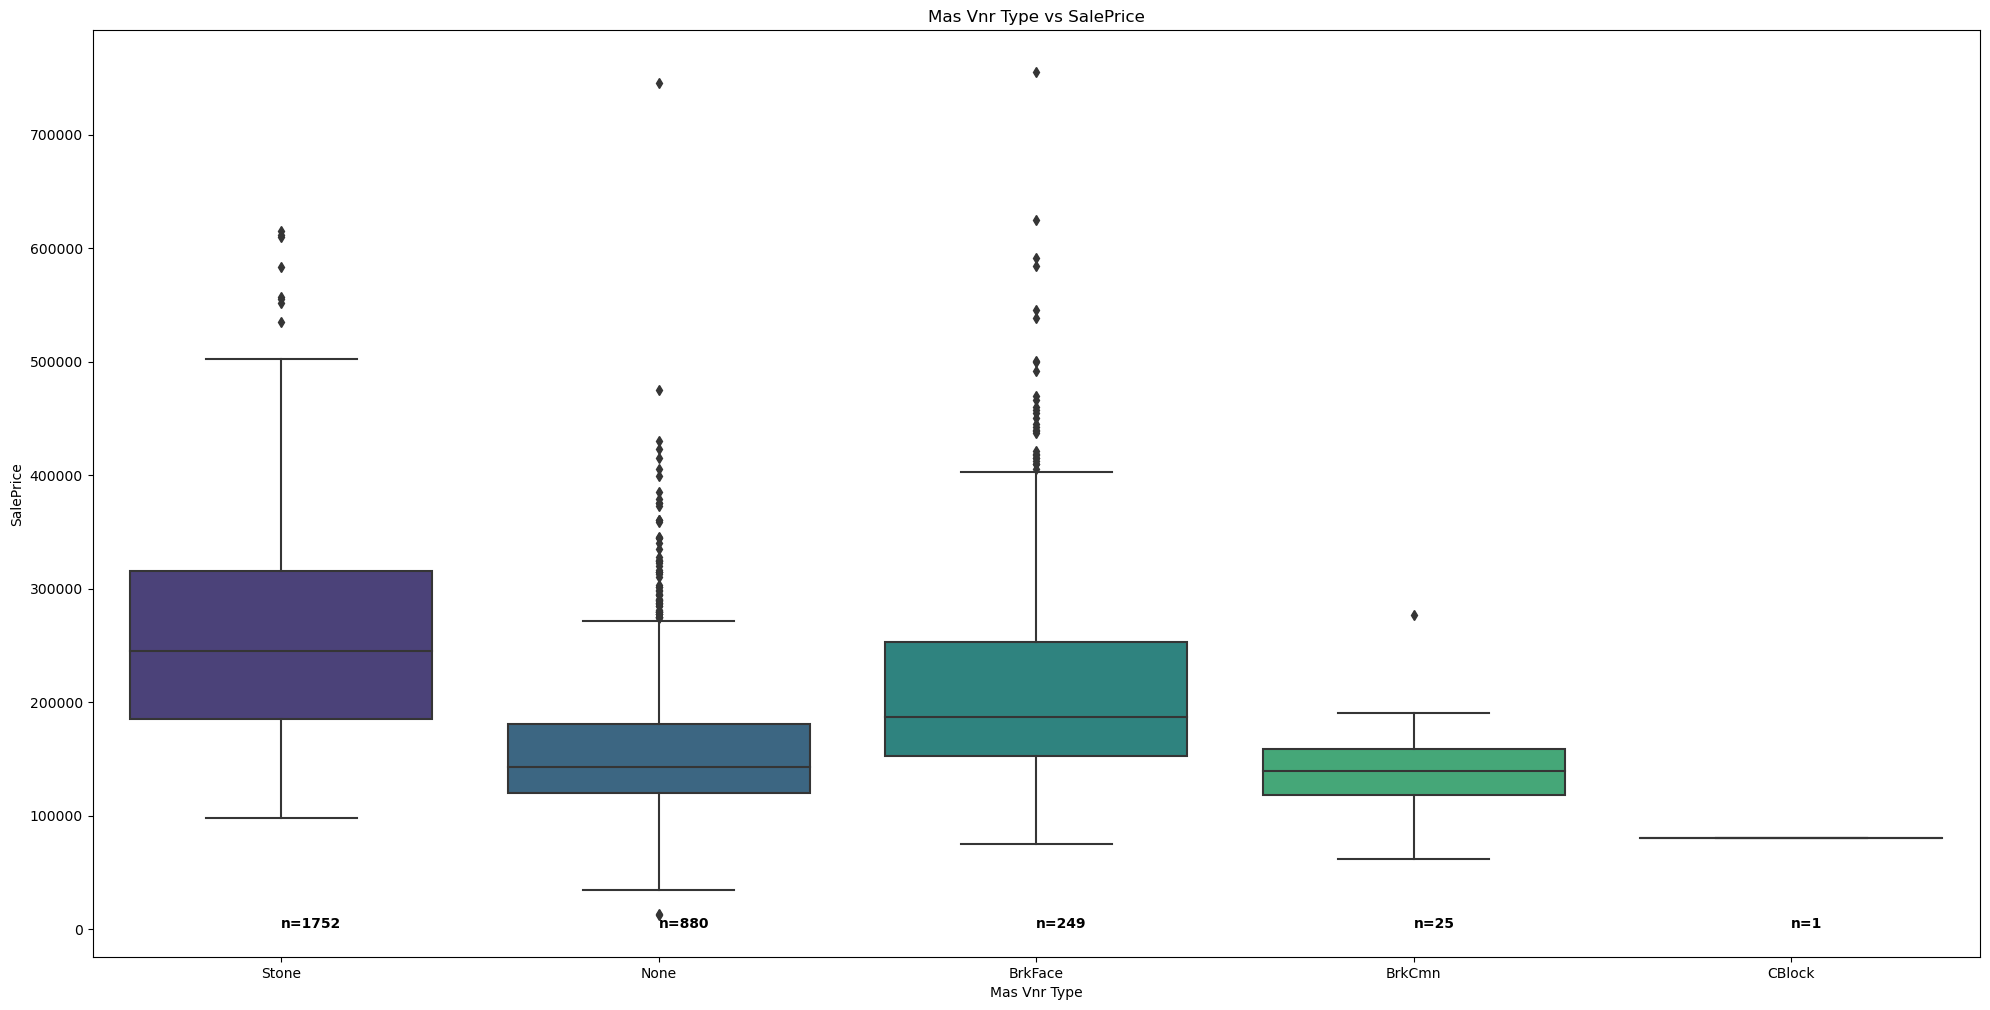

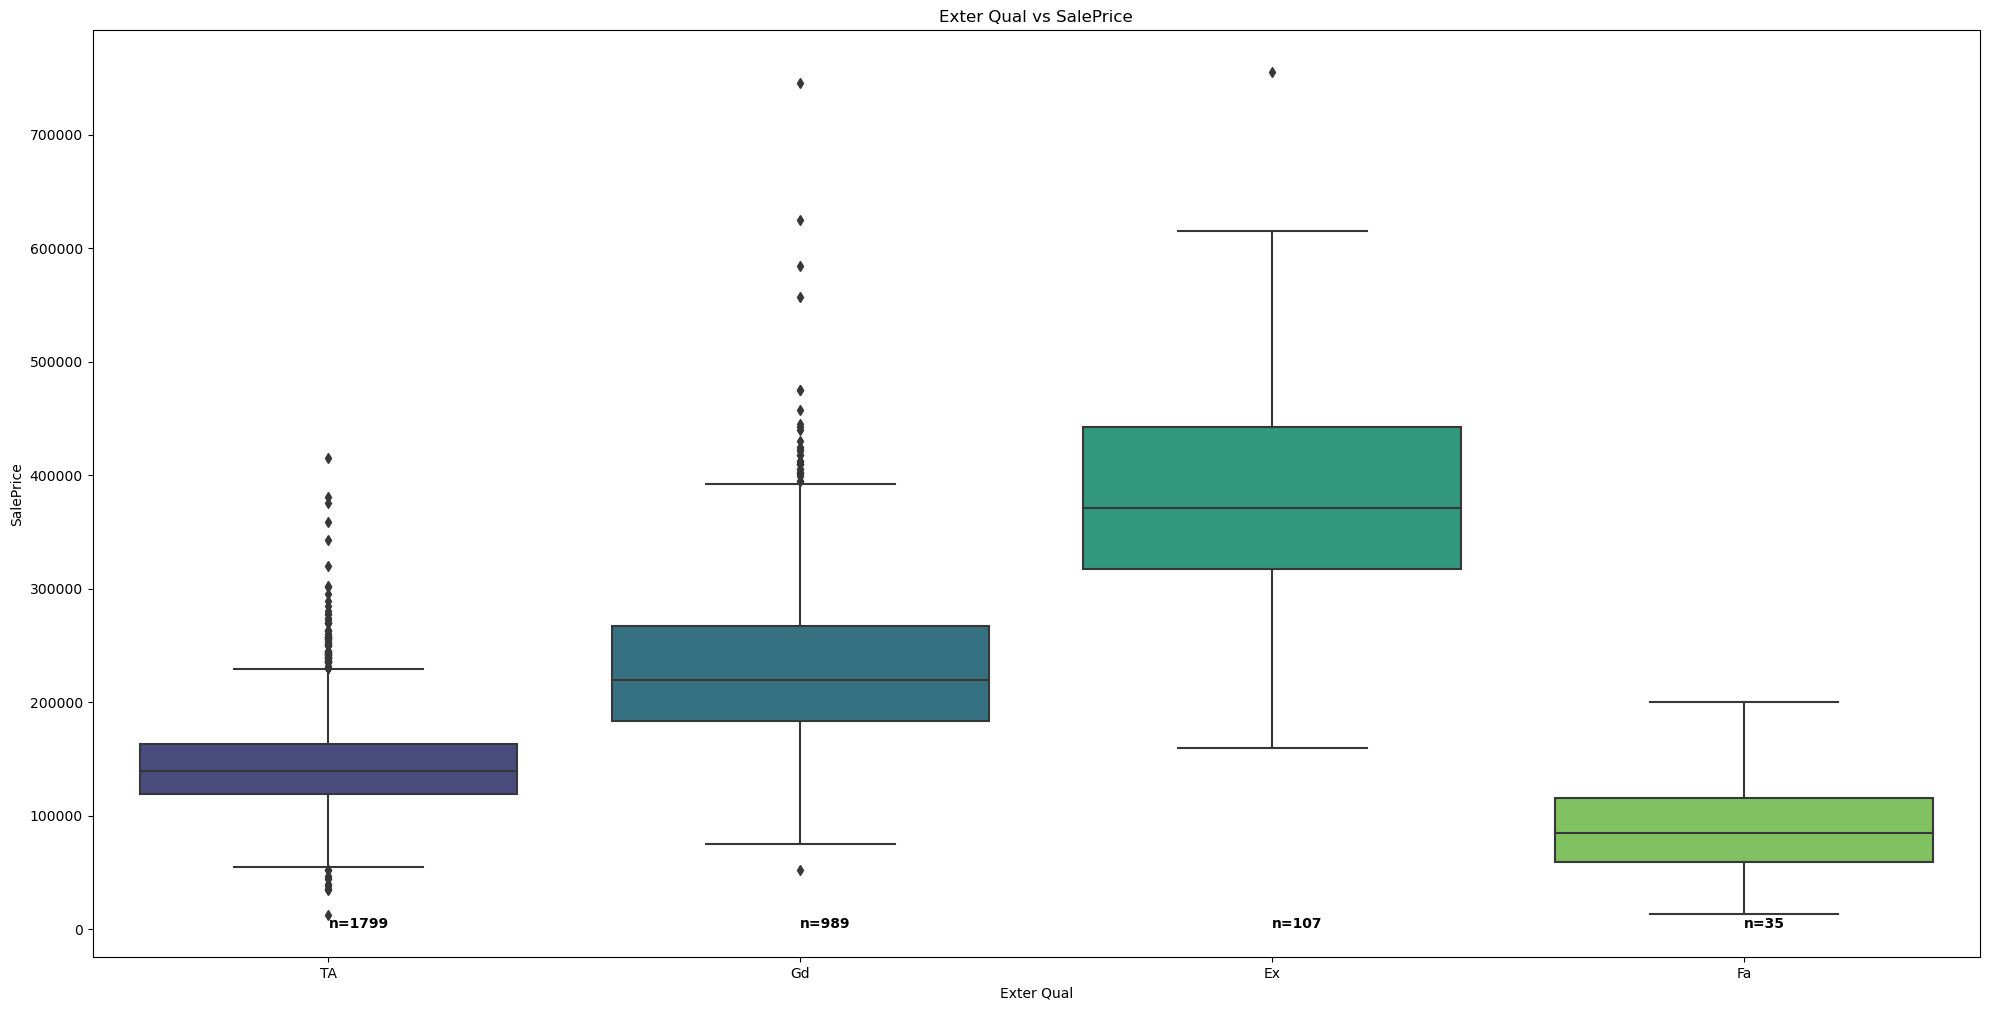

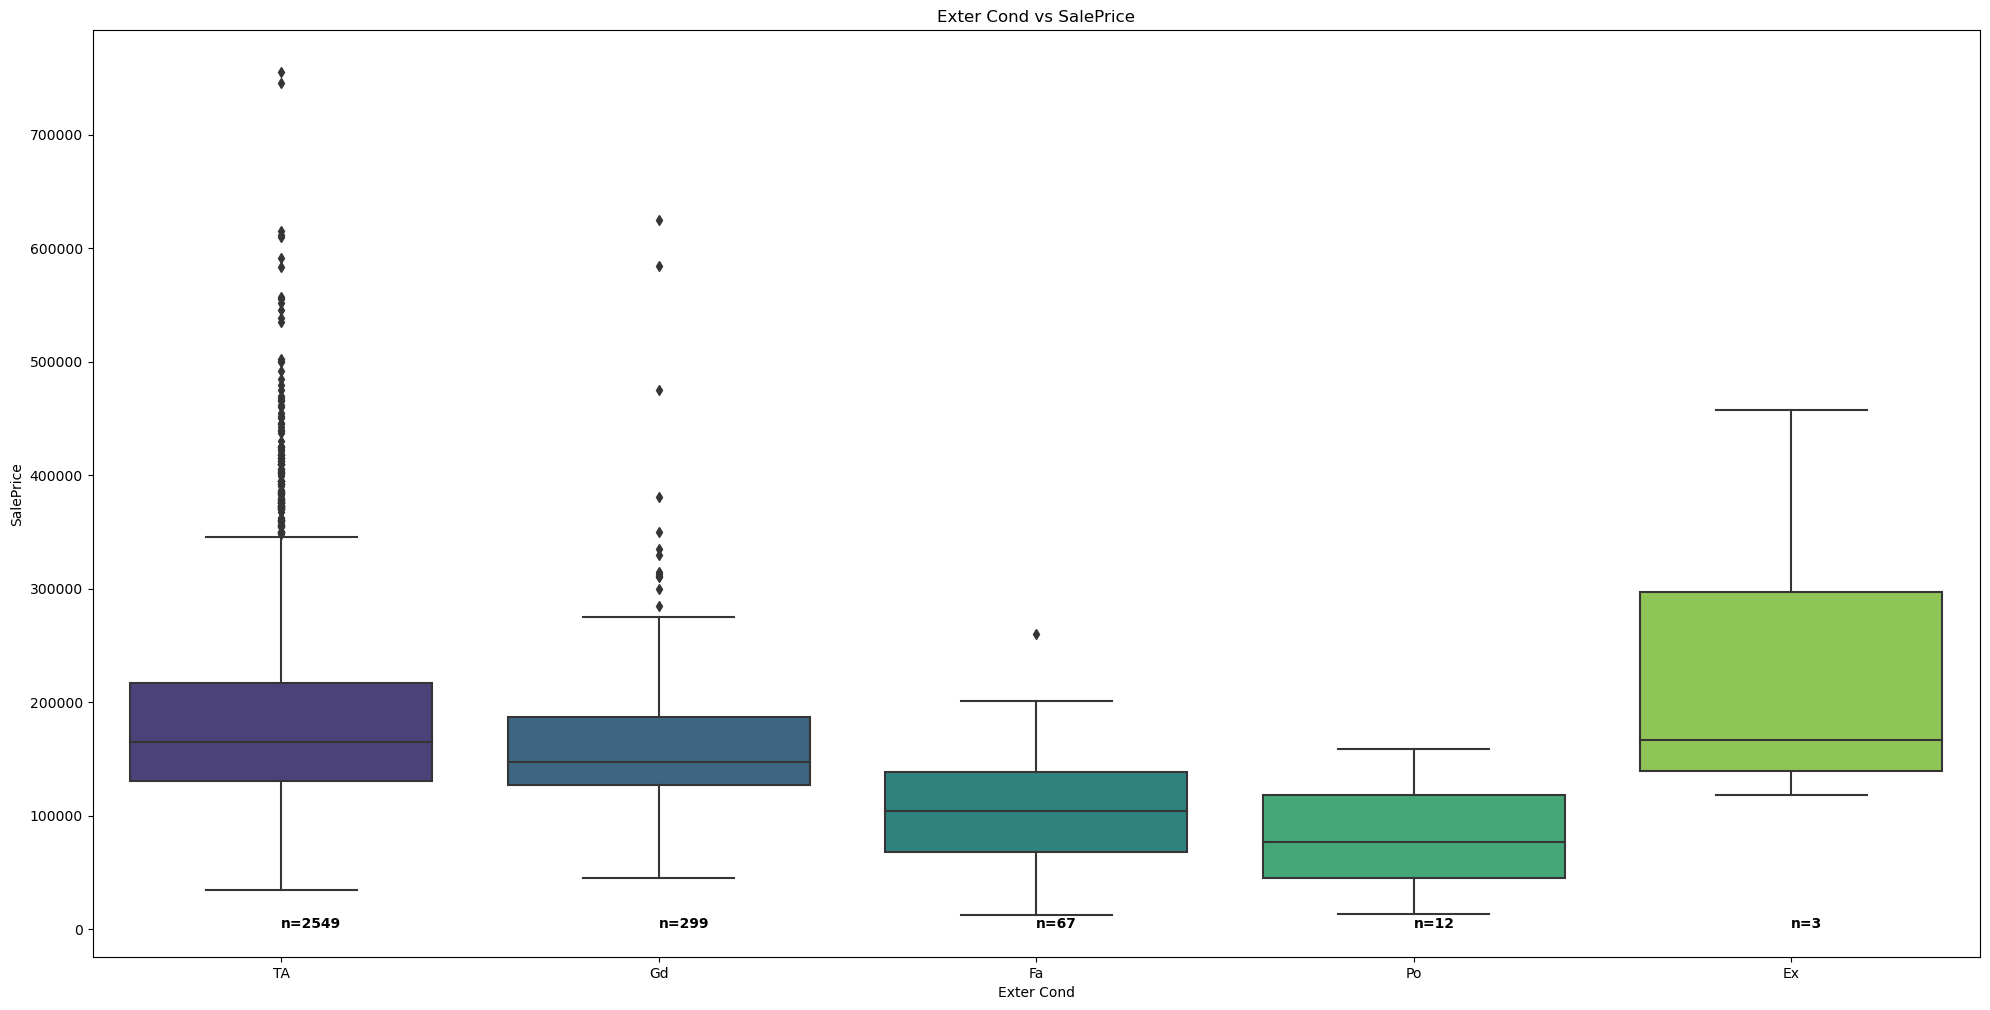

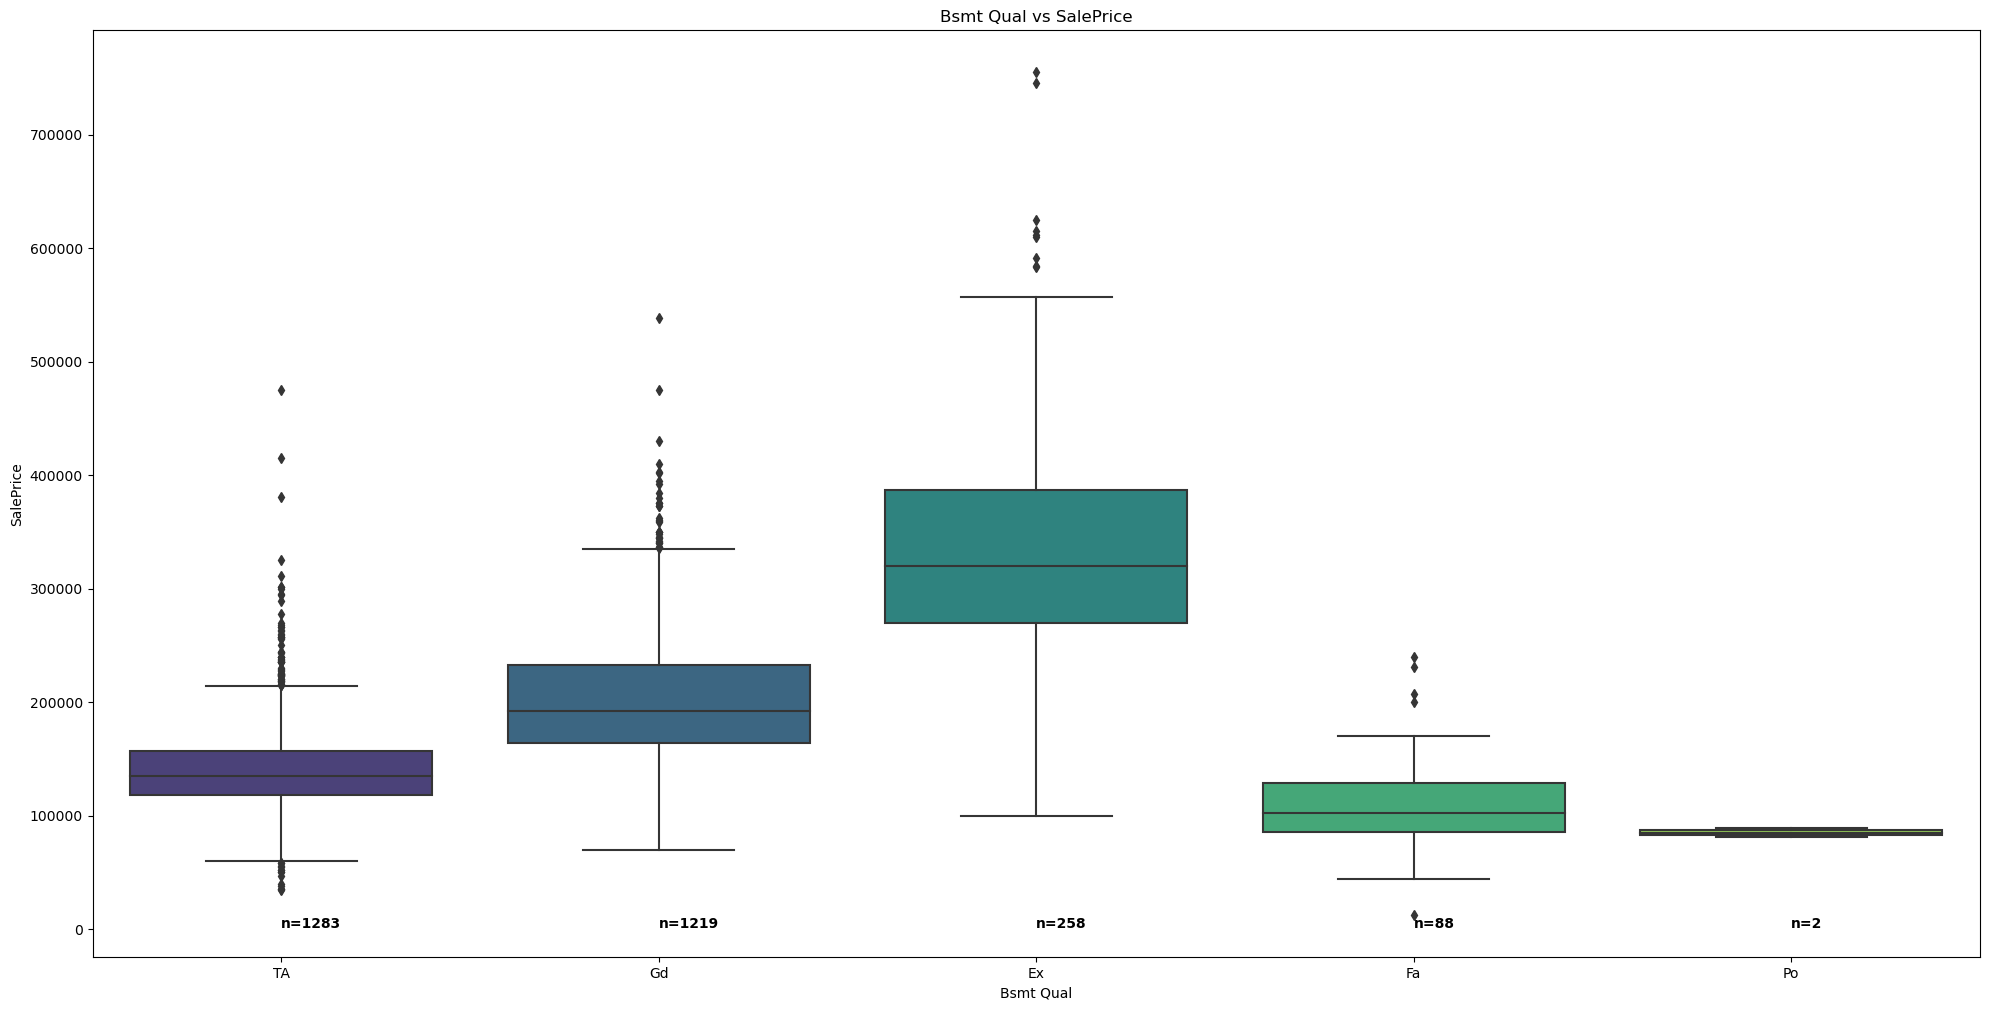

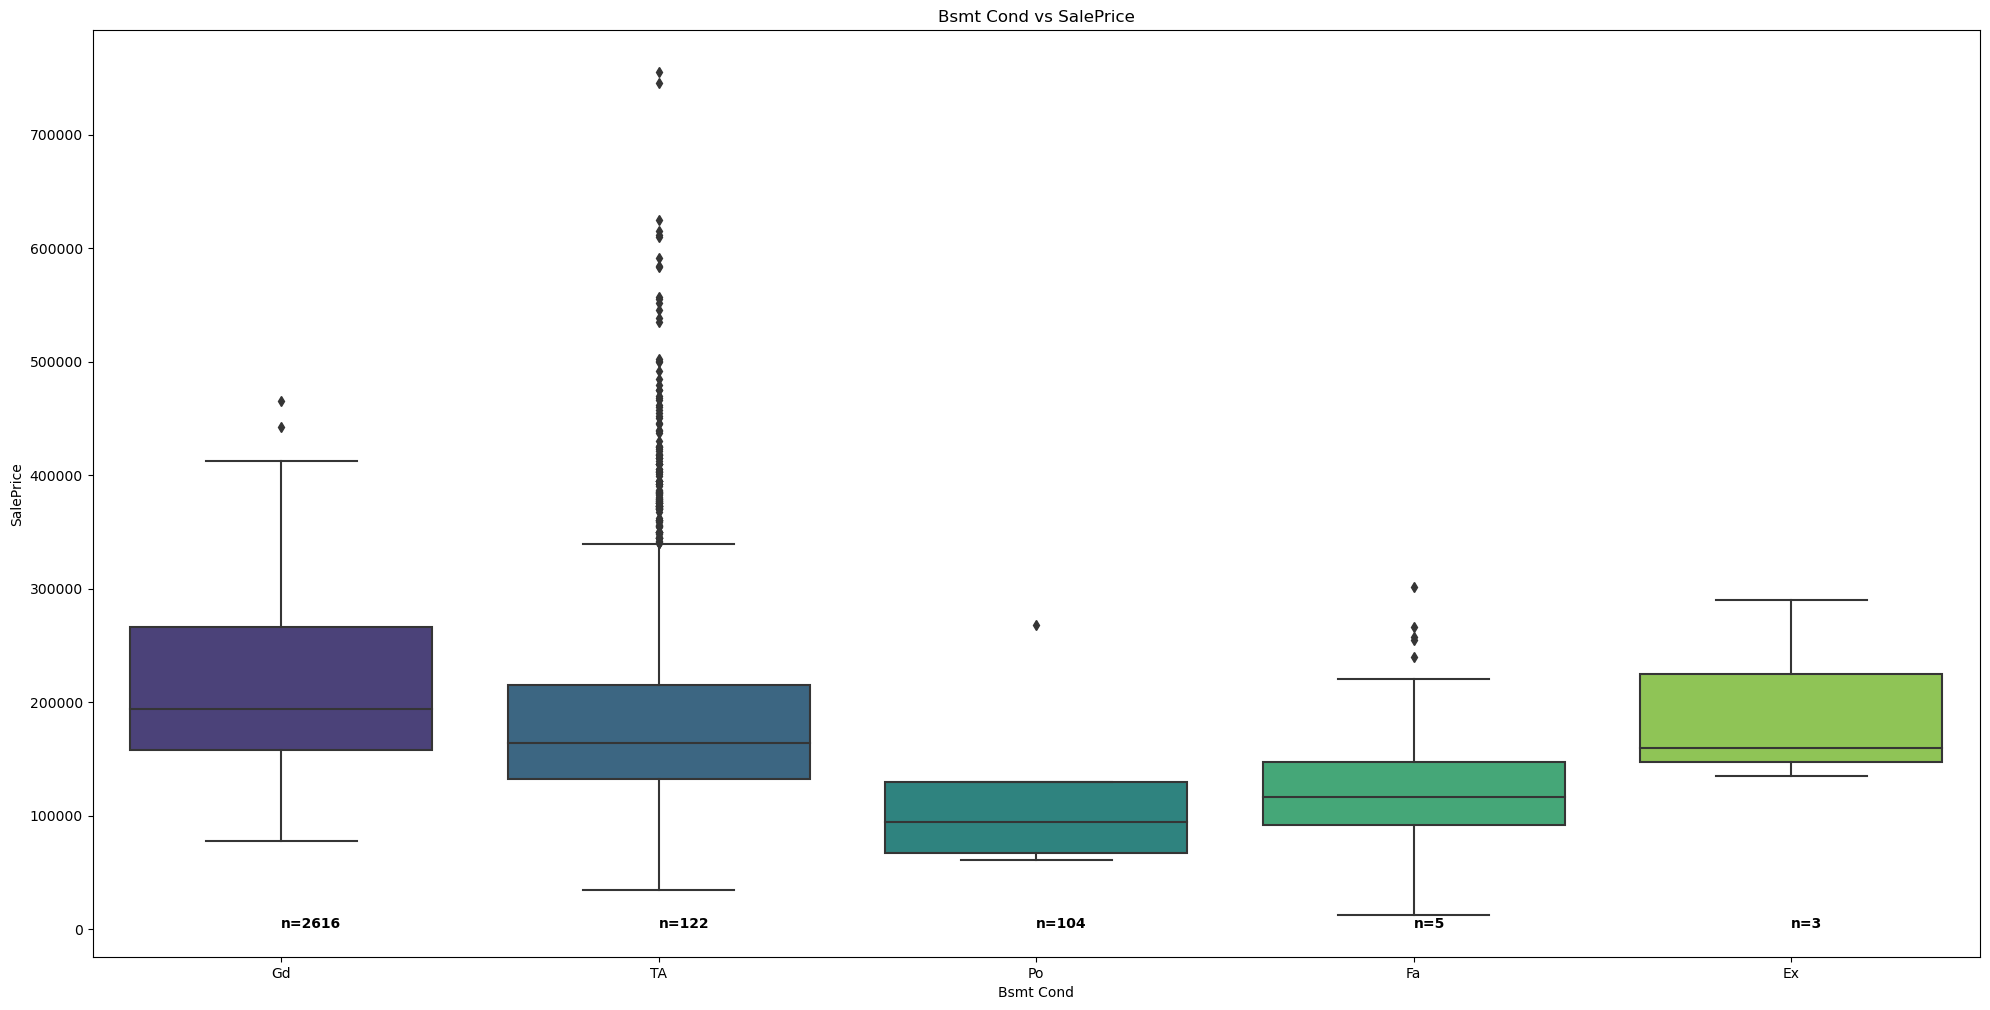

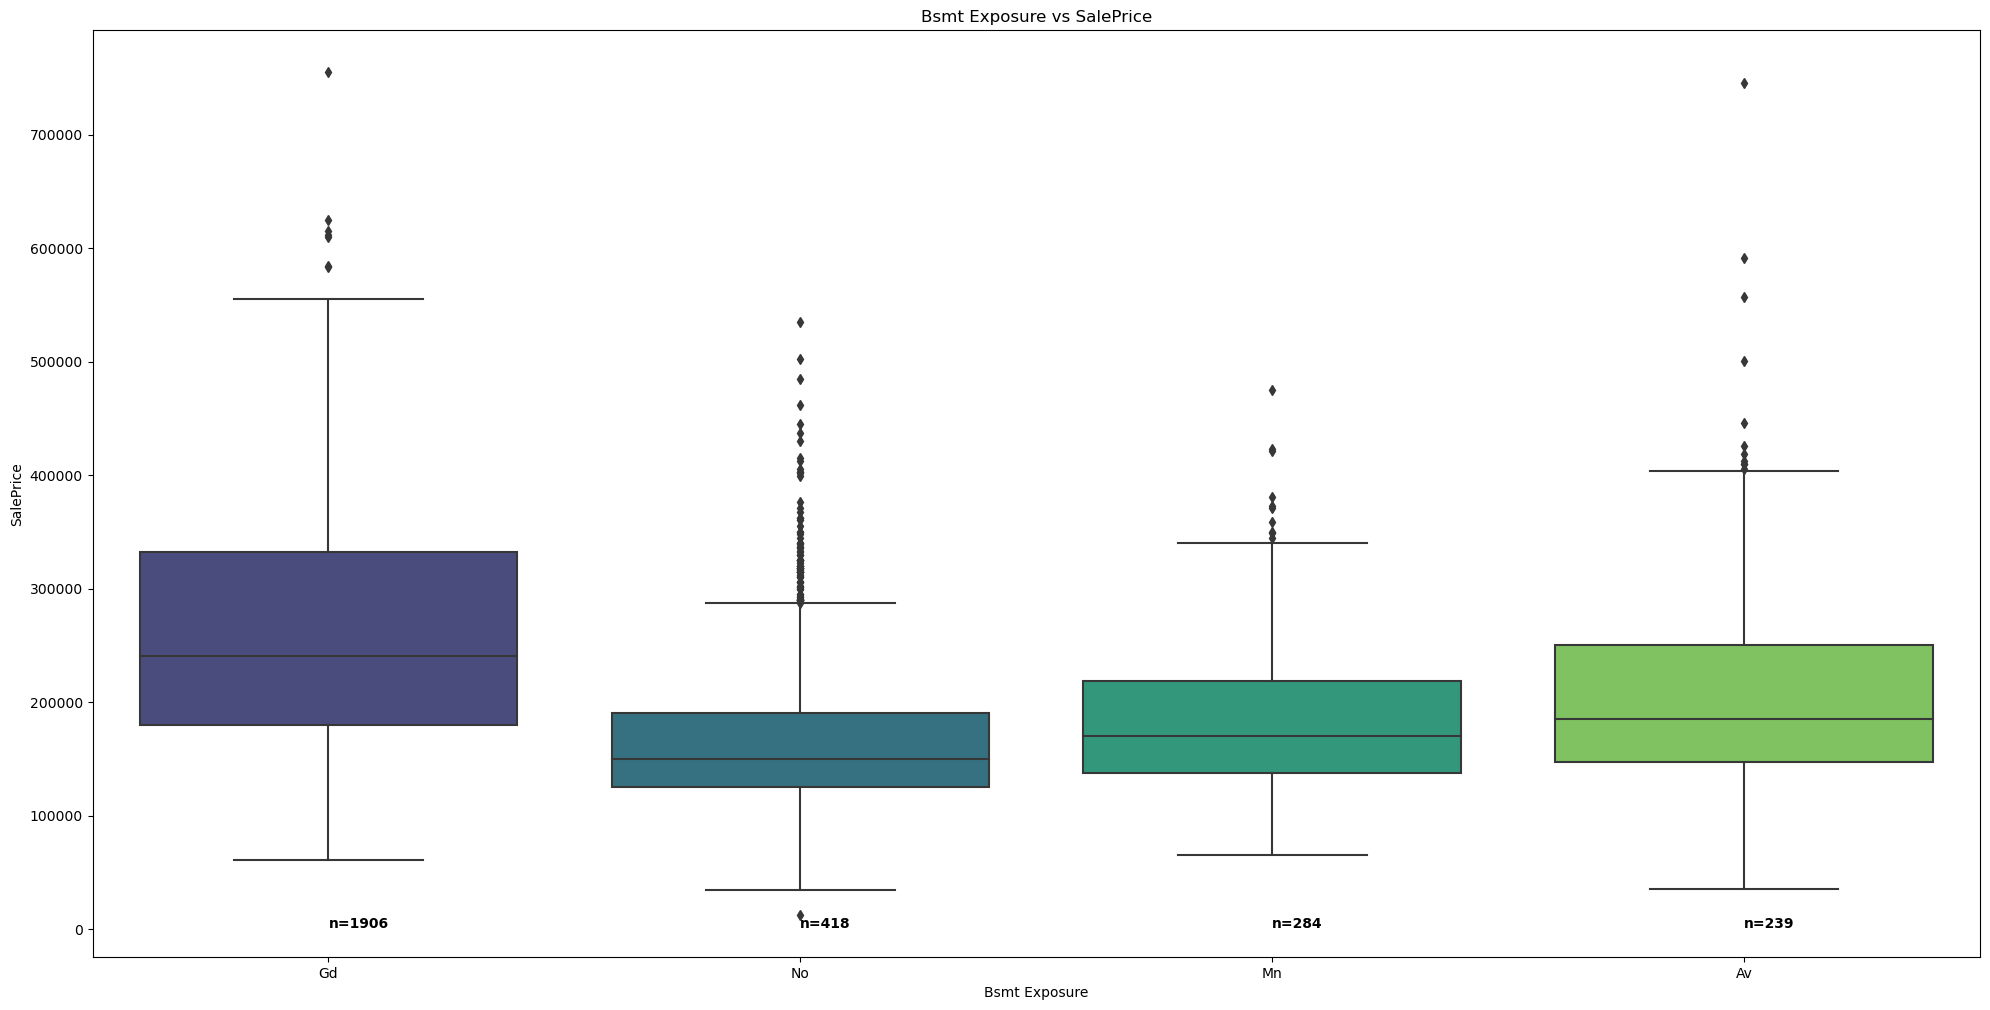

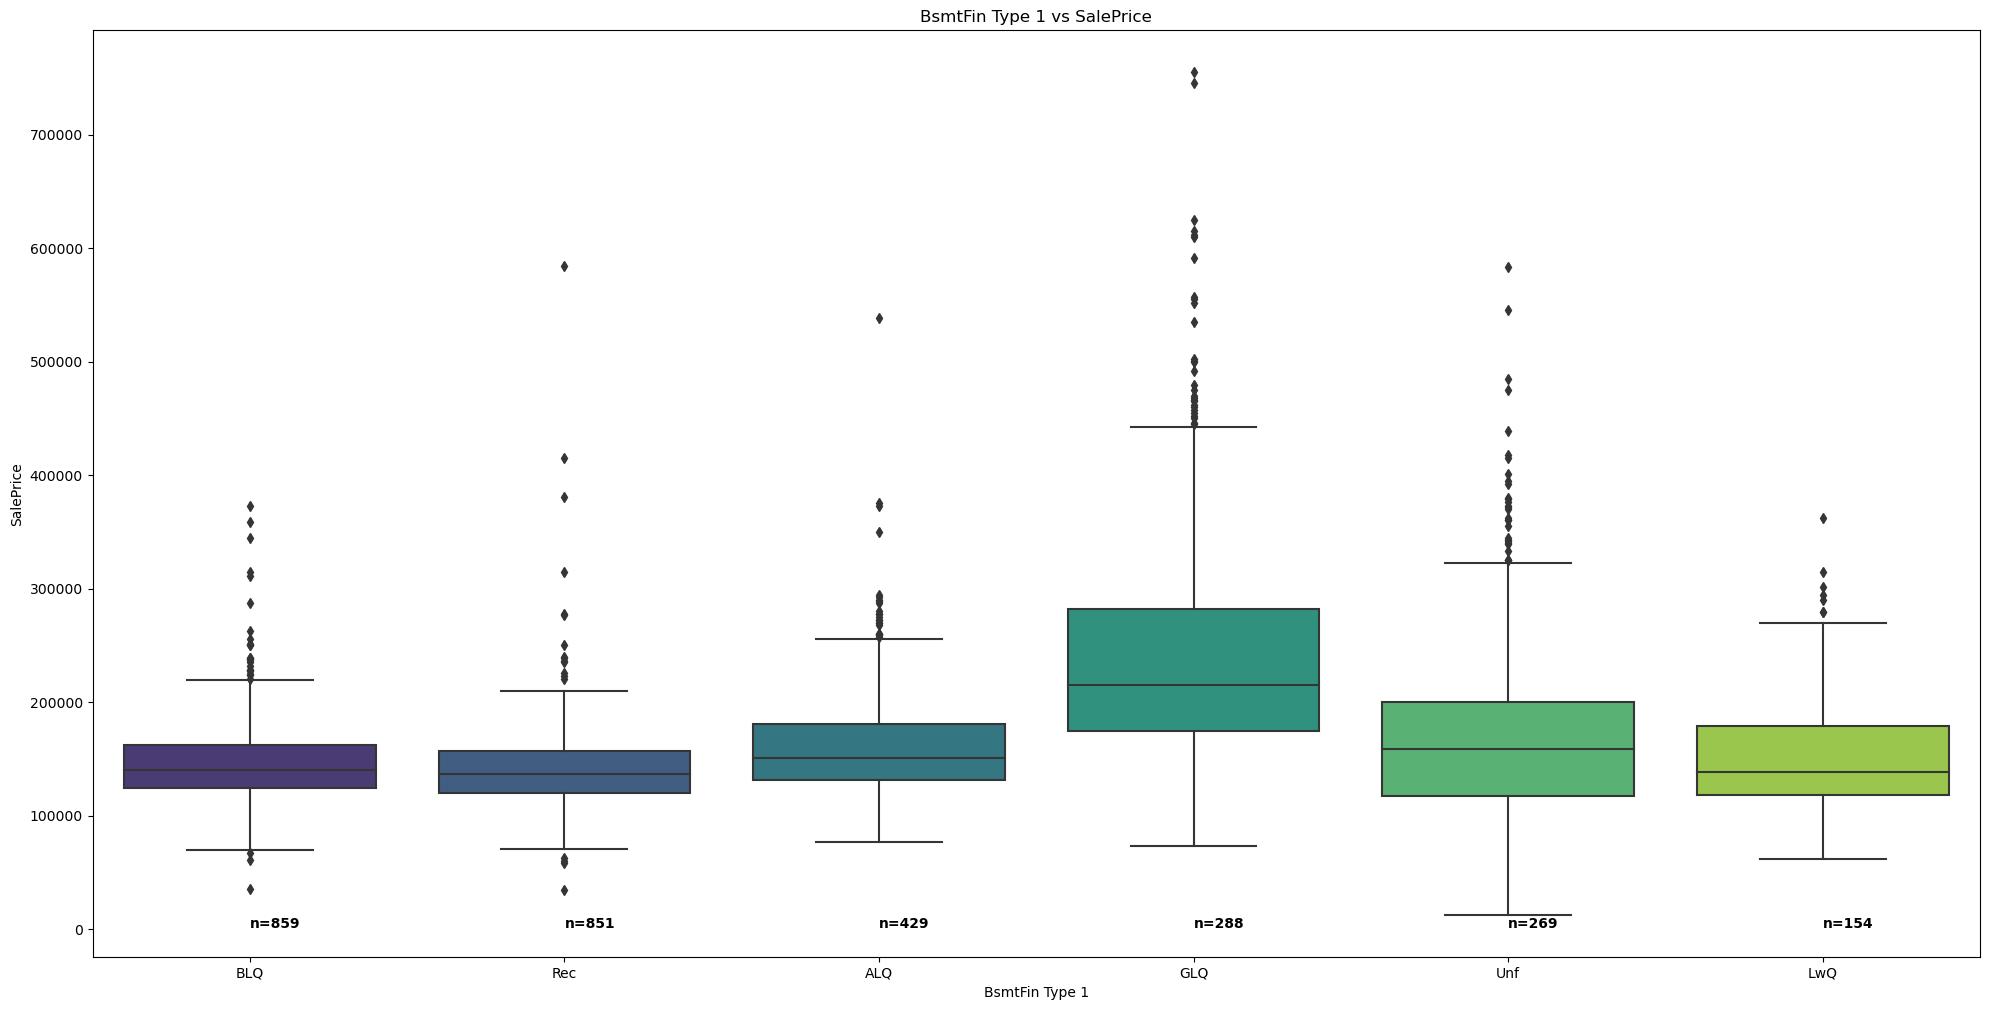

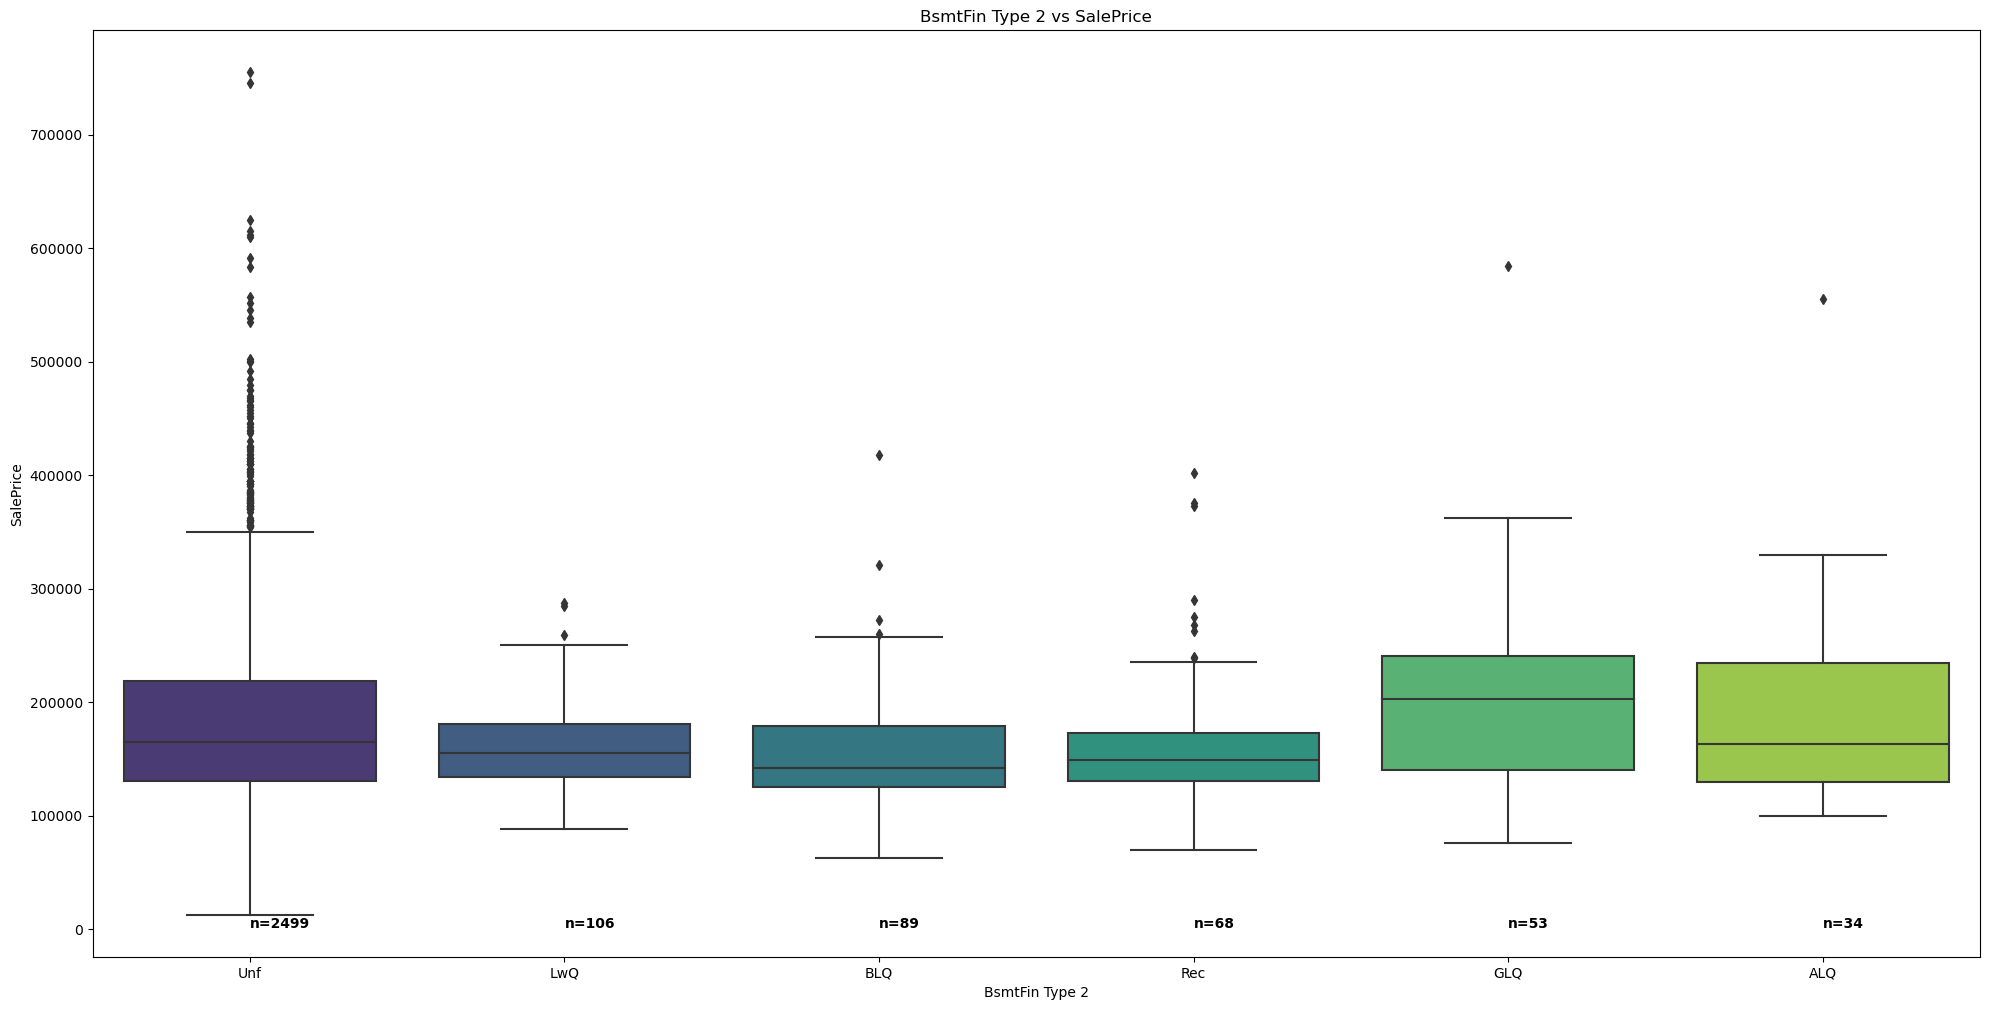

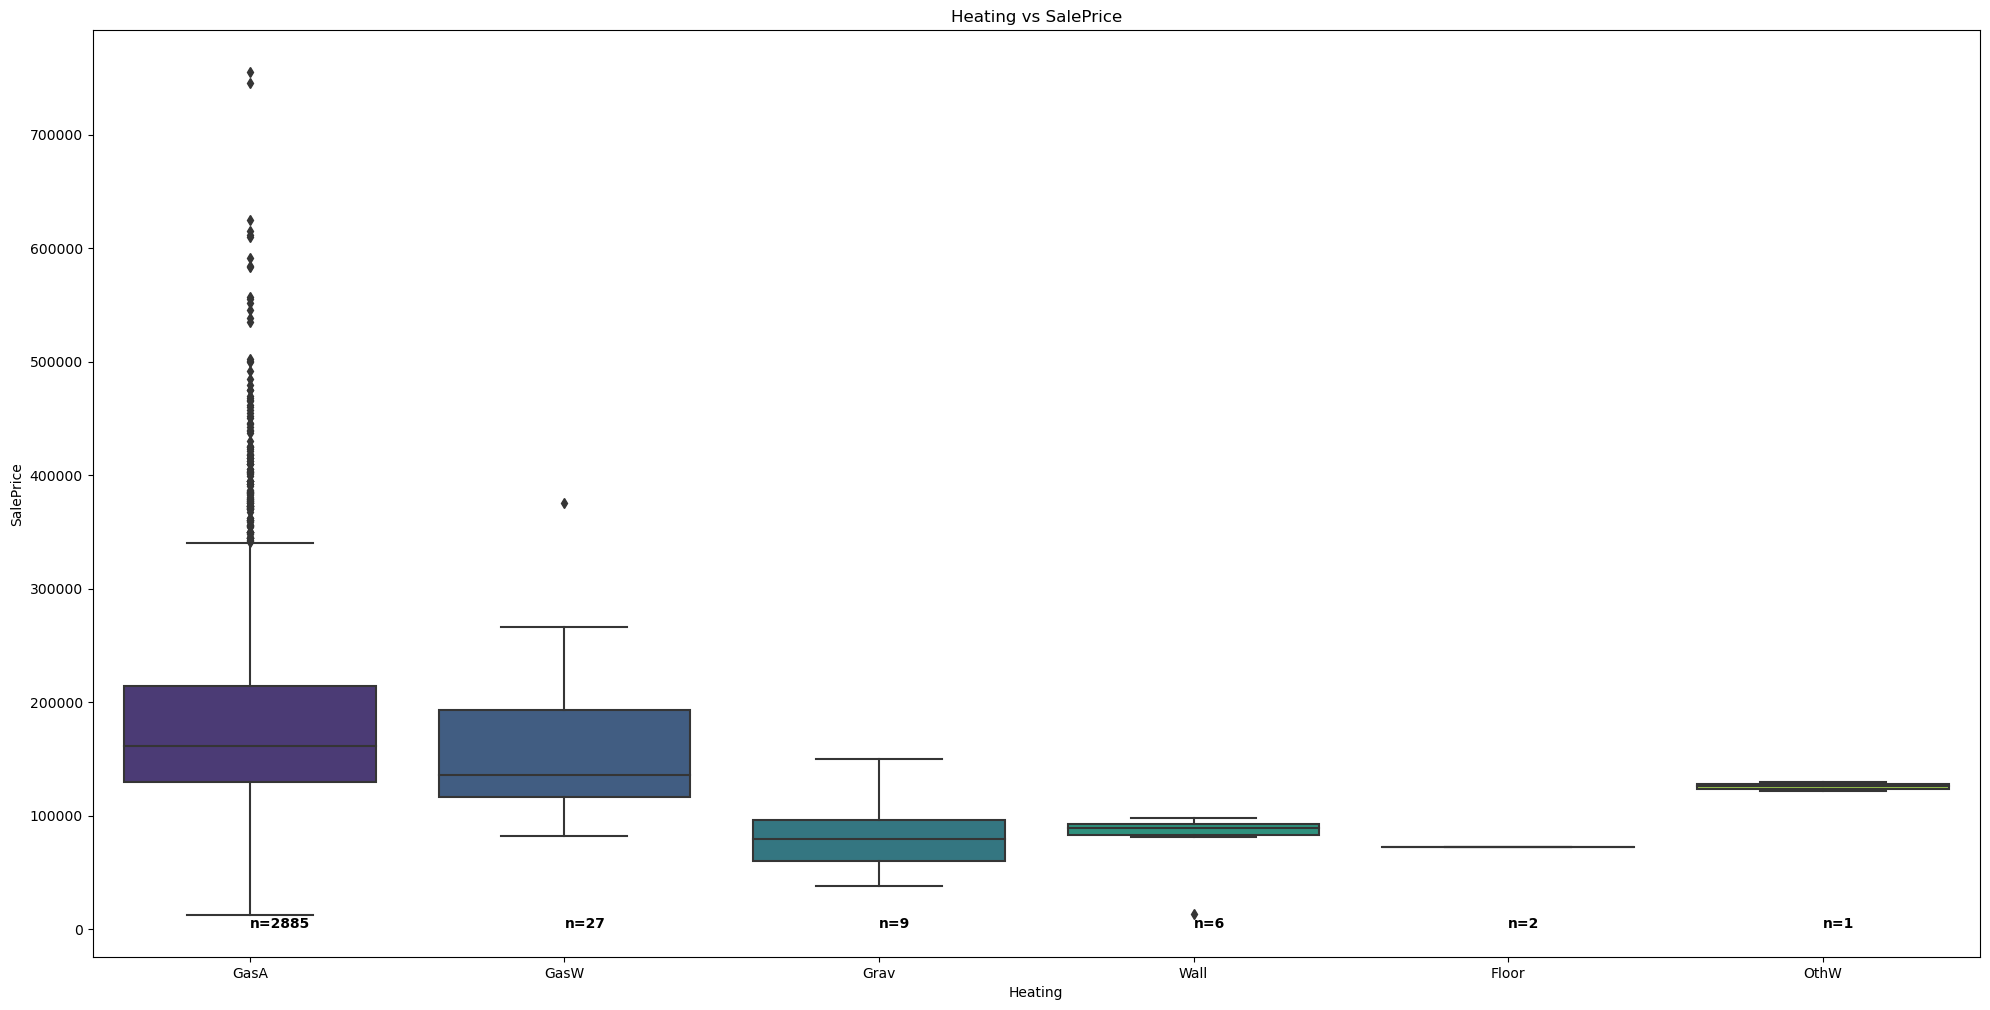

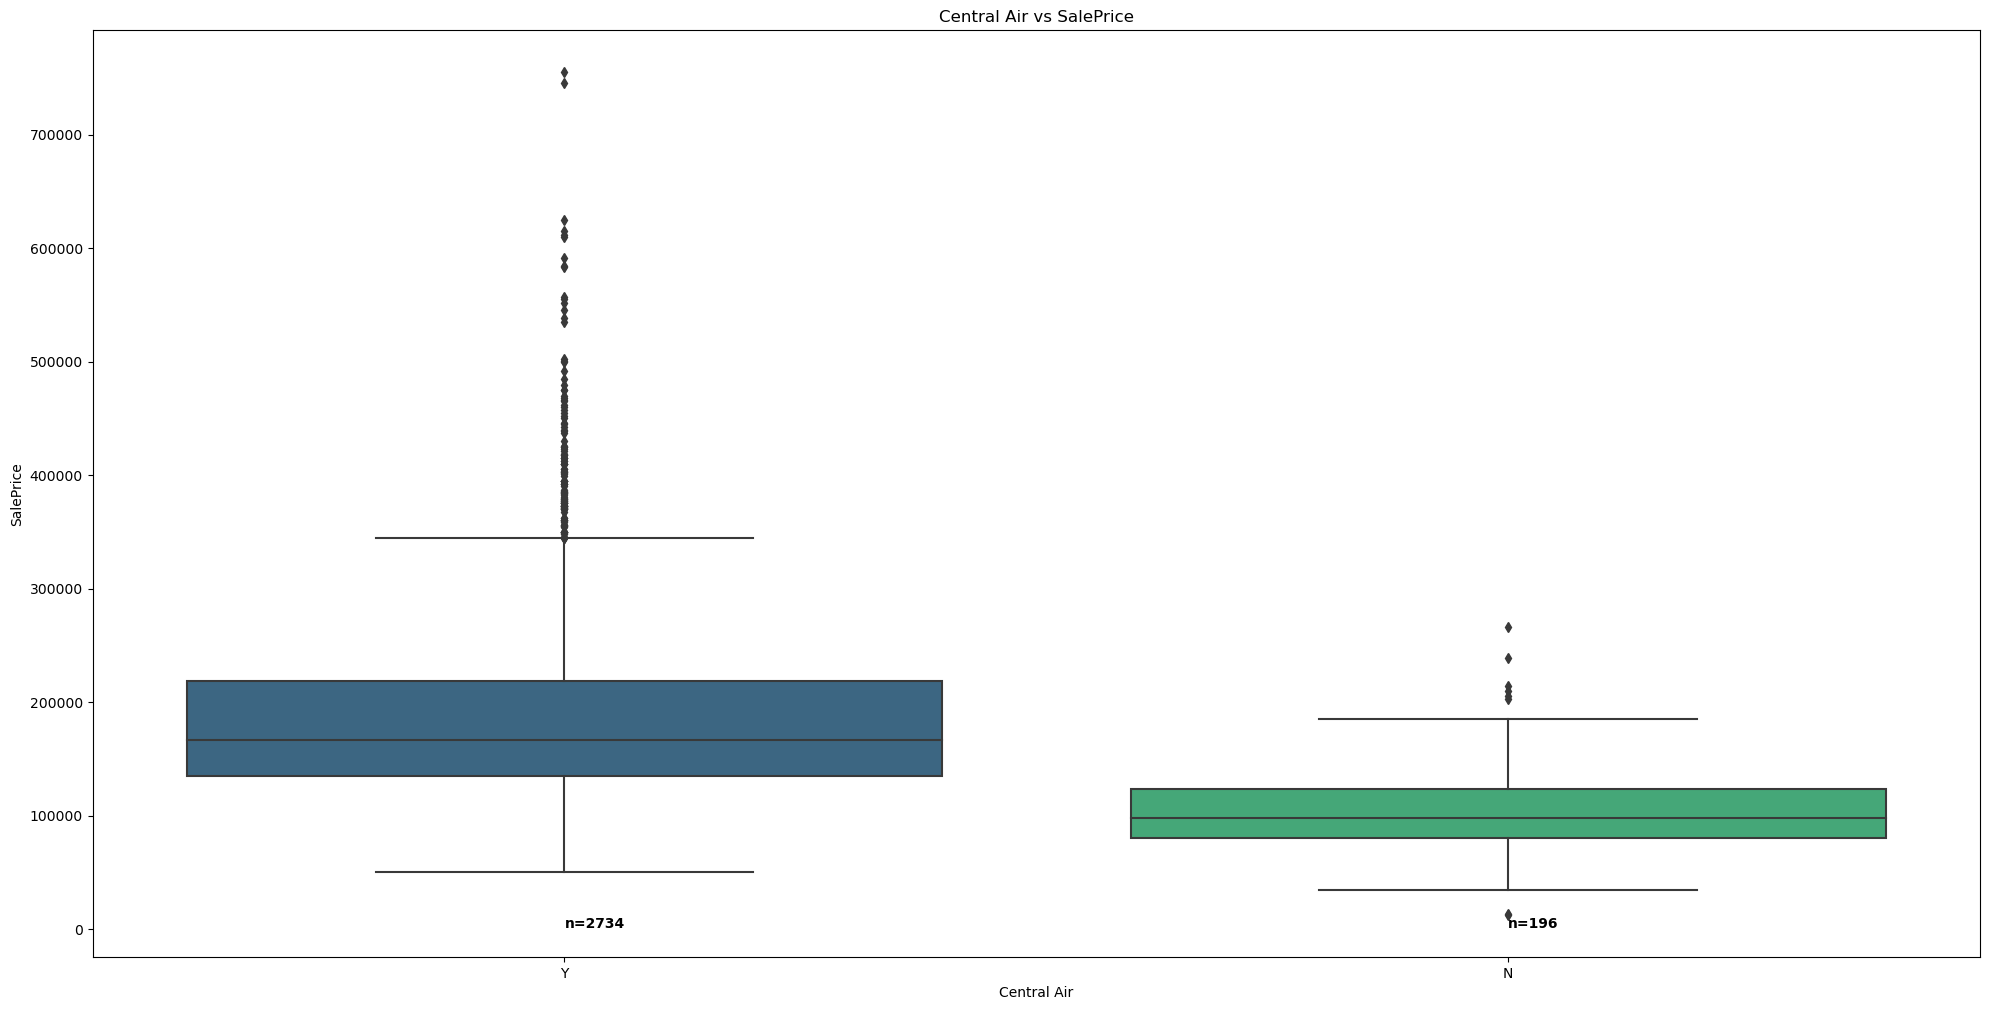

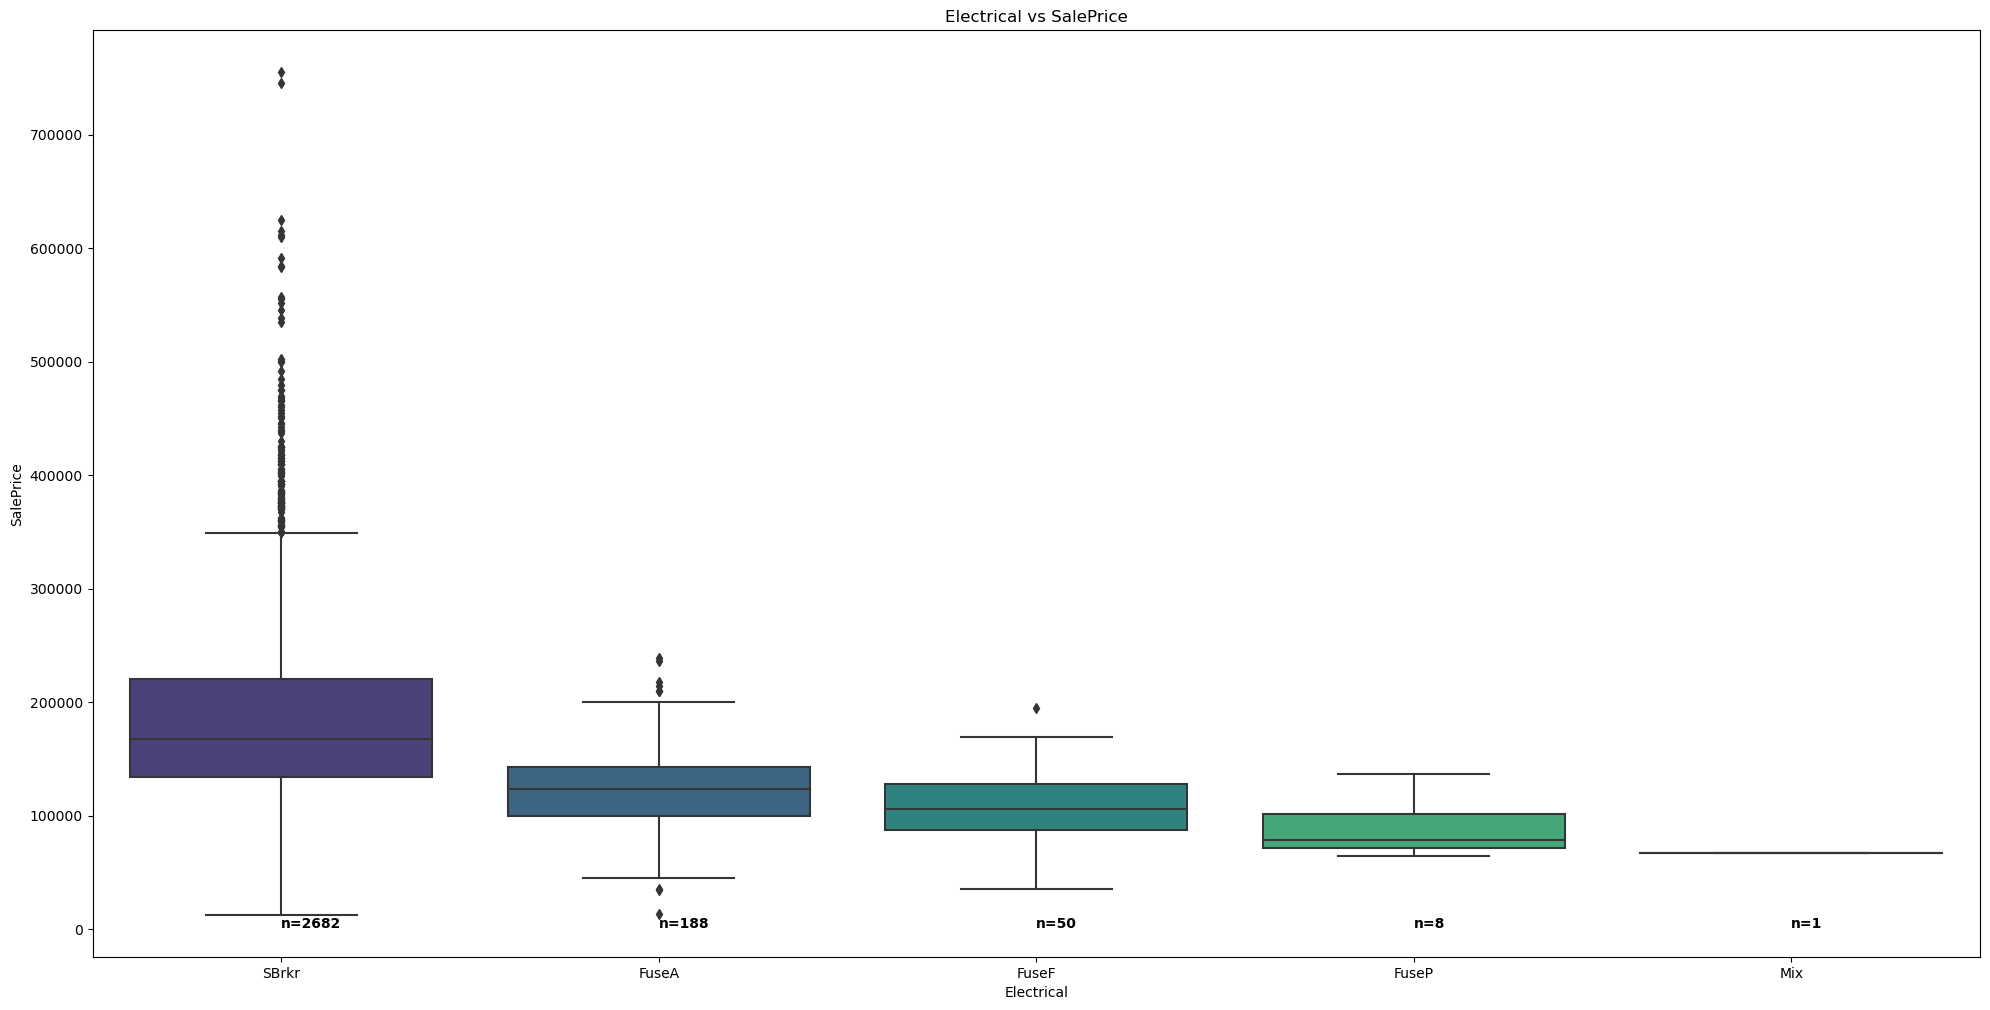

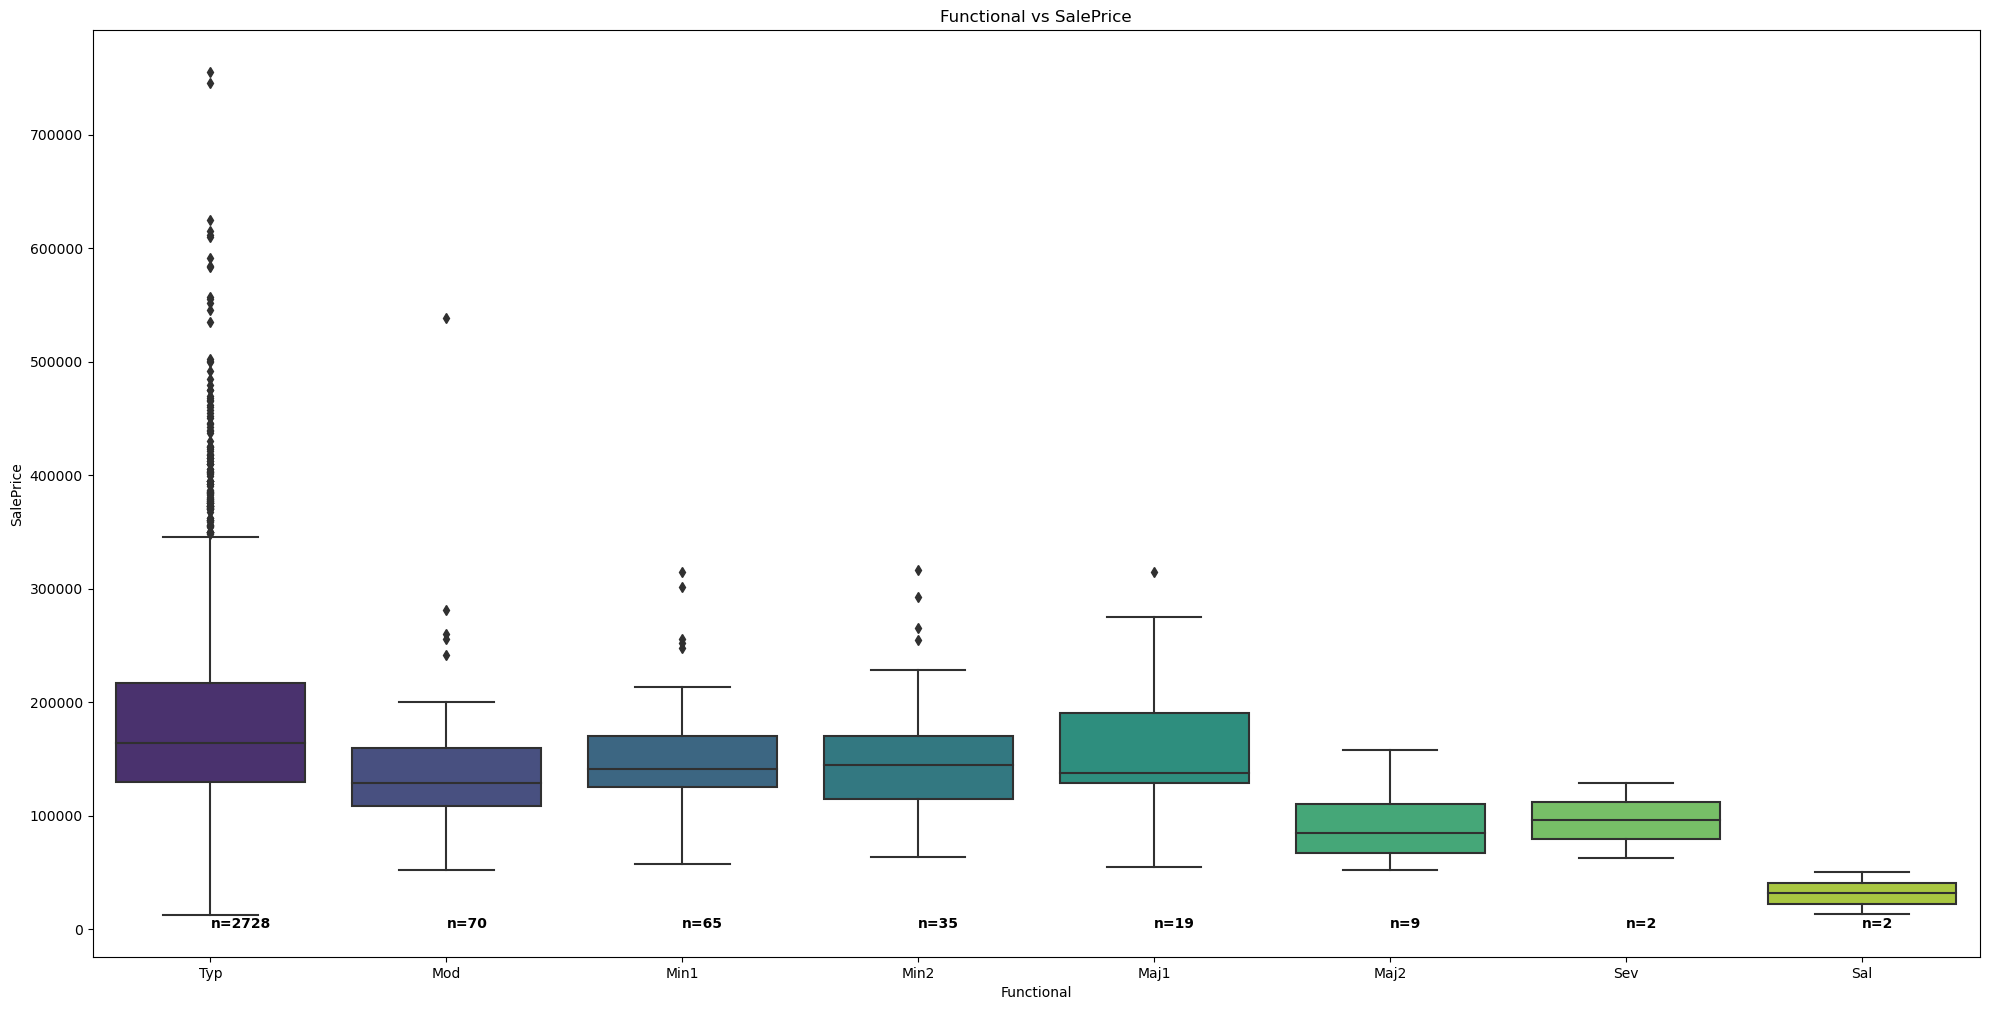

Korrelation nach Pearson


SalePrice                 1.000000
Overall Qual              0.799262
Gr Liv Area               0.706780
Exter Qual                0.693896
Kitchen Qual              0.680862
Garage Cars               0.647562
Garage Area               0.640138
TotalBathrooms            0.633678
1st Flr SF                0.621676
Bsmt Qual                 0.595675
Year Built                0.558426
Garage Finish             0.549899
Full Bath                 0.545604
Garage Yr Blt             0.540262
Year Remod/Add            0.532974
Fireplace Qu              0.527043
Foundation_PConc          0.520966
Mas Vnr Area              0.502196
TotRms AbvGrd             0.495474
Fireplaces                0.474558
Heating QC                0.435739
Neighborhood_NridgHt      0.433299
BsmtFin SF 1              0.433147
Bsmt Exposure             0.399770
Sale Type_New             0.354292
Lot Frontage              0.352222
Sale Condition_Partial    0.350122
Garage Type_Attchd        0.345635
BsmtFin Type 1      

Korrelation nach Spearman


SalePrice                 1.000000
Overall Qual              0.808800
Gr Liv Area               0.723342
TotalBathrooms            0.710715
Garage Cars               0.701545
Bsmt Qual                 0.696451
Exter Qual                0.686812
Year Built                0.680822
Kitchen Qual              0.668176
Garage Area               0.660475
Garage Yr Blt             0.648696
Full Bath                 0.634161
Garage Finish             0.625561
Year Remod/Add            0.601454
Foundation_PConc          0.585369
1st Flr SF                0.581536
Fireplace Qu              0.546747
Fireplaces                0.526137
Heating QC                0.514385
TotRms AbvGrd             0.499253
Open Porch SF             0.479578
Garage Type_Attchd        0.450870
Mas Vnr Area              0.434773
Lot Area                  0.429249
Lot Frontage              0.397779
Exterior_VinylSd          0.397363
BsmtFin Type 1            0.392615
Garage Qual               0.364836
Wood Deck SF        

Korrelation nach Kendall


SalePrice                 1.000000
Overall Qual              0.670244
Garage Cars               0.579461
Bsmt Qual                 0.574326
Exter Qual                0.566407
TotalBathrooms            0.555721
Kitchen Qual              0.551261
Gr Liv Area               0.536530
Full Bath                 0.516453
Garage Finish             0.494417
Year Built                0.491963
Garage Area               0.487719
Foundation_PConc          0.478628
Garage Yr Blt             0.464711
Year Remod/Add            0.435079
Fireplace Qu              0.432909
Fireplaces                0.419086
1st Flr SF                0.417284
Heating QC                0.403179
TotRms AbvGrd             0.384285
Garage Type_Attchd        0.368655
Open Porch SF             0.350431
Mas Vnr Area              0.333833
Exterior_VinylSd          0.324904
BsmtFin Type 1            0.299425
Lot Area                  0.296931
Garage Qual               0.295118
Lot Frontage              0.282271
Garage Cond         

Text(0.5, 0.98, 'Rgressions for suburbs > 150 houses')

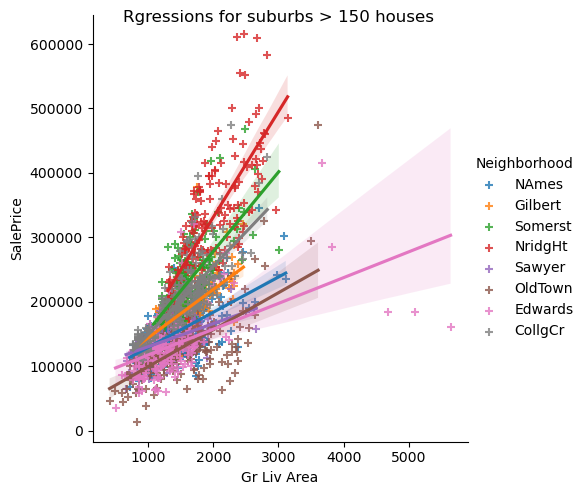

In [30]:
# Zielvariable SalePrice untersuchen
fig = plt.figure()
fig.set_figheight(3) # optional setting the height of the image
fig.set_figwidth(9) # optional setting the width of the image

a = fig.add_subplot(1,3,1)
_ = plt.hist(df['SalePrice'],bins=30)
_ = plt.title('Histogram of Sale Price')
_ = plt.xlabel('Sale Price');
_ = plt.ylabel('Counts');
_ = plt.text(400000,500,"n=" + str (df.shape[0]),color='black')

a = fig.add_subplot(1,3,2)
# create boxplot of SalePrice
_ = plt.boxplot(df['SalePrice'],vert=False)
_ = plt.title('Boxplot of Sale Price');
_ = plt.xlabel('Sale Price');
_ = plt.text(1.8,1.2,"n=" + str (df.shape[0]),color='black')
_ = plt.text(1.8,1.3,"outlier=1,5 IQR",color='black')
_ = plt.gca().set_yticklabels([])

# create Violin plot of SalePrice
a = fig.add_subplot(1,3,3)
_ = plt.title('Violin plot of Sale Price');
_ = plt.text(400000,-0.2,"n=" + str (df.shape[0]),color='black')
_ = sns.violinplot(x=df['SalePrice'])

fig = plt.figure(figsize=(9,3))
a = fig.add_subplot(1,3,1)
# log transform of the sale price and check the histogram 
_ = plt.hist(np.log(df['SalePrice']),bins=30)
_ = plt.xlabel('Sale Price (Log transformed)');
_ = plt.ylabel('Counts');
_ = plt.text(9.5,400,"n=" + str (df.shape[0]),color='black')
# create boxplot of the log transformed SalePrice
a = fig.add_subplot(1,3,2)
_ = plt.boxplot(np.log(df['SalePrice']),vert=False)
_ = plt.xlabel('Sale Price (Log transformed)');
_ = plt.text(9.7,1.2,"n=" + str (df.shape[0]),color='black')
_ = plt.text(9.7,1.3,"outlier=1,5 IQR",color='black')
_ = plt.gca().set_yticklabels([])

# create Violin plot of he log transformed SalePrice
a = fig.add_subplot(1,3,3)
_ = sns.violinplot(x=np.log(df['SalePrice']))
_ = plt.xlabel('Sale Price (Log transformed)');
_ = plt.text(10,-0.2,"n=" + str (df.shape[0]),color='black')

# Mittelwert nach Transformation ist verschieden:
#print (np.mean(df['SalePrice']))
#print (np.exp(np.log(df['SalePrice']).mean()))

def my_boxplot(columnname):
    _ = plt.figure(figsize=(20,10))
    _ = sns.boxplot(x = columnname,y = 'SalePrice',data=df,palette='viridis')
    _ = plt.tight_layout()
    _ = plt.title(columnname + ' vs SalePrice');
    # Calculate counts per group 
    nobs = df[columnname].value_counts().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n=" + i for i in nobs]
     # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,plt.gca().get_xticklabels()):
        _ = plt.text(pos[tick],1000,nobs[tick],color='black',weight='semibold')
    plt.show()

for i in ['Sale Condition', 'Sale Type', 
         'Land Contour', 'Lot Config', 'Land Slope', 'MS SubClass', 'MS Zoning', 'Street', 
         'Neighborhood', 'Roof Matl','Roof Style', 'Bldg Type', 'Bldg Type',
         'Kitchen Qual', 'Exterior 1st', 'Exterior 2nd', 'Foundation',
         'Utilities', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
         'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 
         'Heating', 'Central Air', 'Electrical', 'Functional']:
    my_boxplot(i)

# Ist ein lineares Modell angebracht? Zeigen Merkmale eine proportionale Steigerung in Bezug auf den Verkaufspreis?
#
# Liste der Pearson Korrelationskoeffzienten aller Variablen mit SalePrice (statt Heatmap)
# nach https://medium.com/@hjhuney/quantitative-data-exploration-for-regression-in-python-ames-housing-part-1-25879dd4cc4a
#PearsonCorr_list = df_num.corr(method='pearson', numeric_only=False).to_dict()['SalePrice'].items(), key=lambda x: x[1], reverse=True)
print ("Korrelation nach Pearson")
df_num[df_num.columns].corr(method='pearson', numeric_only=True)['SalePrice'].sort_values(ascending=False)
print ("Korrelation nach Spearman")
df_num[df_num.columns].corr(method='spearman', numeric_only=True)['SalePrice'].sort_values(ascending=False)
print ("Korrelation nach Kendall")
df_num[df_num.columns].corr(method='kendall', numeric_only=True)['SalePrice'].sort_values(ascending=False)

df_neighbor = df[['SalePrice', "Gr Liv Area", "Neighborhood"]]
counts = df_neighbor['Neighborhood'].value_counts()
res = df_neighbor[~df_neighbor['Neighborhood'].isin(counts[counts < 150].index)]
#print(res)
splot = sns.lmplot(x="Gr Liv Area", 
               y="SalePrice", 
               hue="Neighborhood", 
               markers='+', 
               data=res) 
splot.fig.suptitle('Rgressions for suburbs > 150 houses')

Street_Pave             Street_Grvl              -1.000000
HouseAge                Year Built               -0.999055
Garage Yr Blt           GarageAge                -0.998815
RemodelAge              Year Remod/Add           -0.998008
Garage Type_None        Garage Cond              -0.971392
                        Garage Qual              -0.968636
Roof Style_Hip          Roof Style_Gable         -0.939523
HouseAge                Garage Yr Blt            -0.852485
GarageAge               Year Built               -0.852016
MS SubClass             Bldg Type_1Fam           -0.815225
MS Zoning_RM            MS Zoning_RL             -0.804758
House Style_1Story      2nd Flr SF               -0.790506
Foundation_CBlock       Foundation_PConc         -0.772431
Heating_GasA            Heating_GasW             -0.772191
Lot Config_Inside       Lot Config_Corner        -0.756460
Sale Type_New           Sale Type_WD             -0.756082
Sale Condition_Partial  Sale Type_WD             -0.7519

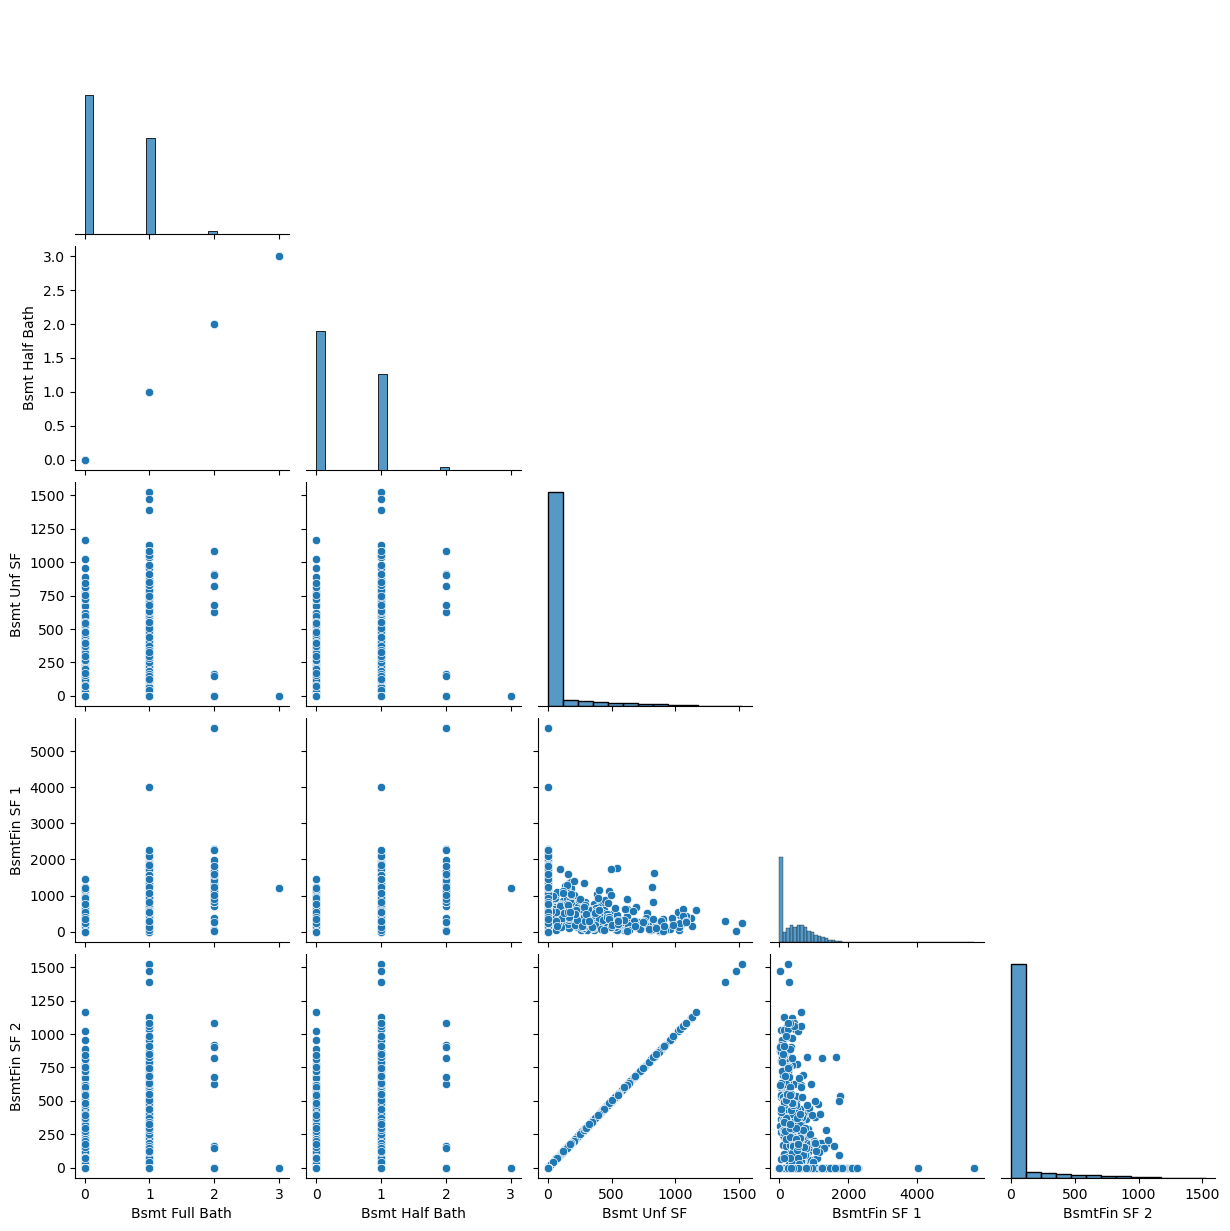

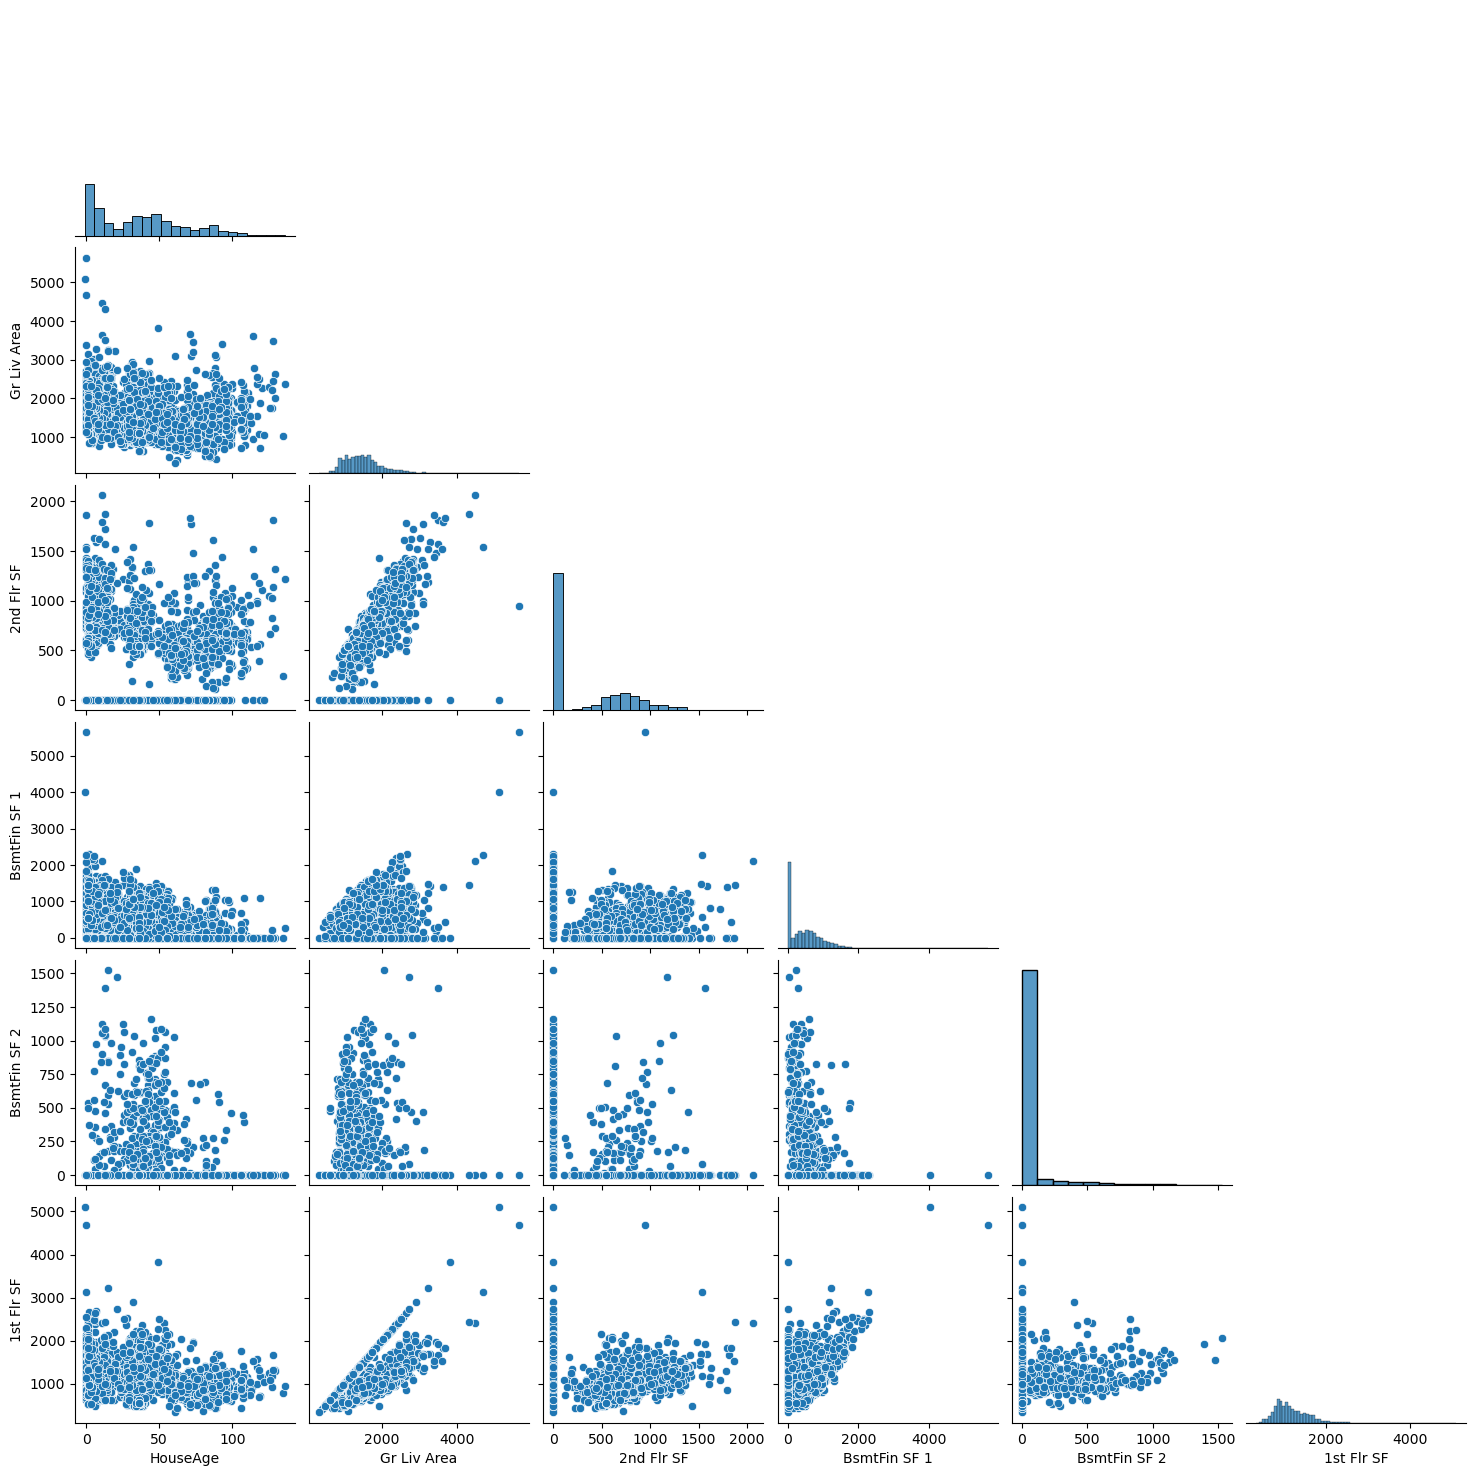

In [34]:
# Multikollinearität
# Welche Spalten sind untereinander start korreliert?

def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr(numeric_only = True)
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened


def corrMatrix (dfc, method):
    # method='pearson' oder 'spearman'
    # Korrelationsmatrix der numerischen Variablen

    corr = dfc.corr(method=method)
    # mask and melt correlation matrix
    mask = np.tril(np.ones_like(corr, dtype=bool)) | corr.abs().le(0.1); # trim lower matrix triangle
    melt = corr.mask(mask).melt(ignore_index=False).reset_index();
    melt["size"] = melt["value"].abs();

    sns.set_theme(style="white")
    fig, ax = plt.subplots(figsize=(12, 12));
    # normalize colorbar
    cmap = plt.cm.RdBu;
    norm = plt.Normalize(-1, 1);
    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap);
    cbar = plt.colorbar(sm, ax=ax);
    cbar.ax.tick_params(labelsize="x-small");
    # plot lower triangle (scatter plot with normalized hue and square markers)
    sns.scatterplot(ax=ax, data=melt, x="index", y="variable", size="size",
                    hue="value", hue_norm=norm, palette=cmap,
                    style=0, markers=["s"], legend=False);
    # format grid
    xmin, xmax = (-0.5, corr.shape[0] - 0.5);
    ymin, ymax = (-0.5, corr.shape[1] - 0.5);
    _ = ax.vlines(np.arange(xmin, xmax + 1), ymin, ymax, lw=1, color="silver");
    _ = ax.hlines(np.arange(ymin, ymax + 1), xmin, xmax, lw=1, color="silver");
    _ = ax.set(aspect=1, xlim=(xmin, xmax), ylim=(ymax, ymin), xlabel="", ylabel="")
    _ = ax.tick_params(labelbottom=False, labeltop=True);
    _ = plt.xticks(rotation=90);
    # annotate upper triangle
    for y in range(corr.shape[0]):
        for x in range(corr.shape[1]):
            value = corr.mask(mask).to_numpy()[y, x]
            if pd.notna(value):
                _ = plt.text(x, y, f"{value:.2f}", size="x-small",
                         # color=sm.to_rgba(value), weight="bold",
                         ha="center", va="center");
    _ = plt.title("Korrelation nach "+method)            
    _ = plt.show()
    #_ = fig.savefig ('Train_'+method+'.png')

corrFilter(df_num, .6)

features = ['Bsmt Full Bath','Bsmt Half Bath', 'Bsmt Unf SF','BsmtFin SF 1','BsmtFin SF 2']    
splot = sns.pairplot(df_num[features], corner = True)
features = ['HouseAge','Gr Liv Area', '2nd Flr SF','BsmtFin SF 1','BsmtFin SF 2','1st Flr SF']    
splot = sns.pairplot(df_num[features], corner = True)


In [ ]:
# Widersprüche der Daten prüfen

# Do null values for pool_qc indicate a lack of a pool? no rows should have pool_area > 0 when pool_qc is None.
df[(df['Pool Area'] > 0) & (df['Pool QC'] == 0)]['SalePrice'].count()
# Likewise for fireplace_qu and fireplaces
df_num[(df['Fireplaces'] > 0) & (df_num['Fireplace Qu'] == 0)]['SalePrice'].count()
# And also misc_val and misc_feature
df[(df['Misc Val'] > 0) & (df['Misc Feature'] == "NA")]['SalePrice'].count()

# Verkauft bevor gebaut oder remodeled?
df.loc[df['Yr Sold']+1 < df['Year Built'] ]['Order'].count() # 1 Jahr vor Ende Bau schon verkauft, ist korrekt.
df.loc[df['Yr Sold']+1 < df['Year Remod/Add']]['Order'].count()
df.loc[df['Year Built'] > df['Year Remod/Add']+1]['Order'].count()
df.loc[df['Yr Sold']+1 < df['Garage Yr Blt']]['Order'].count()

# Falls ein count() > 0, dann entfernen Sie biite das .count() der Zeile, damit die ZeilenNr 
#   und die OrderNo (als Spalte 2!) ausgegeben wird. Dann bitte Fehler ansehen mit der OrderNo
#   und fügen Sie .count() wieder ans Ende des Befehls.
df.loc[df['Order'] ==2181]


In [31]:
# Hilfsanweisung, um eine Liste der Variablen zu bekommen für copy&paste
for col in np.sort(df_num.columns):     print("'" + col +"'," )



'1st Flr SF',
'2nd Flr SF',
'3Ssn Porch',
'Alley_Grvl',
'Alley_Pave',
'Bedroom AbvGr',
'Bldg Type_1Fam',
'Bldg Type_2fmCon',
'Bldg Type_Duplex',
'Bldg Type_Twnhs',
'Bldg Type_TwnhsE',
'Bsmt Cond',
'Bsmt Exposure',
'Bsmt Full Bath',
'Bsmt Half Bath',
'Bsmt Qual',
'Bsmt Unf SF',
'BsmtFin SF 1',
'BsmtFin SF 2',
'BsmtFin Type 1',
'BsmtFin Type 2',
'Central Air',
'Electrical',
'Enclosed Porch',
'Exter Cond',
'Exter Qual',
'Exterior_AsbShng',
'Exterior_BrkComm',
'Exterior_BrkFace',
'Exterior_CBlock',
'Exterior_CemntBd',
'Exterior_HdBoard',
'Exterior_ImStucc',
'Exterior_MetalSd',
'Exterior_Plywood',
'Exterior_PreCast',
'Exterior_Stone',
'Exterior_Stucco',
'Exterior_VinylSd',
'Exterior_Wd Sdng',
'Exterior_WdShing',
'Fence',
'Fireplace Qu',
'Fireplaces',
'Foundation_BrkTil',
'Foundation_CBlock',
'Foundation_PConc',
'Foundation_Slab',
'Foundation_Stone',
'Foundation_Wood',
'Full Bath',
'Functional',
'Garage Area',
'Garage Cars',
'Garage Cond',
'Garage Finish',
'Garage Qual',
'Garage Type_2Types'

In [ ]:
train_features = df_num[
   ['SalePrice',
    'Lot Area', 
    'HouseAge', 
    'Overall Qual',
    'Gr Liv Area',
    'Kitchen Qual',
    'Garage Area',
    'Total Bsmt SF',
    'Bsmt Qual',
    'Misc Val',
    'Pool Area',
    'Bldg Type_1Fam',
    'Bldg Type_2fmCon',
    'Bldg Type_Duplex',
    'Bldg Type_Twnhs',
    'Bldg Type_TwnhsE',
    'Garage Type_2Types',
    'Garage Type_Attchd',
    'Garage Type_Basment',
    'Garage Type_BuiltIn',
    'Garage Type_CarPort',
    'Garage Type_Detchd',
    'Neighborhood_Blmngtn',
    'Neighborhood_Blueste',
    'Neighborhood_BrDale' ,
    'Neighborhood_BrkSide',
    'Neighborhood_ClearCr',
    'Neighborhood_CollgCr',
    'Neighborhood_Crawfor',
    'Neighborhood_Edwards',
    'Neighborhood_Gilbert',
    'Neighborhood_Greens' ,
    'Neighborhood_GrnHill',
    'Neighborhood_IDOTRR' ,
    'Neighborhood_Landmrk',
    'Neighborhood_MeadowV',
    'Neighborhood_Mitchel',
    'Neighborhood_NAmes'  ,
    'Neighborhood_NPkVill',
    'Neighborhood_NWAmes' ,
    'Neighborhood_NoRidge',
    'Neighborhood_NridgHt',
    'Neighborhood_OldTown',
    'Neighborhood_SWISU'  ,
    'Neighborhood_Sawyer' ,
    'Neighborhood_SawyerW',
    'Neighborhood_Somerst',
    'Neighborhood_StoneBr',
    'Neighborhood_Timber' ,
    'Neighborhood_Veenker']
    ]
train_features.to_csv('Ames_Train_1_cleaned.csv', index=False)